# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Открываем файл с данными и изучаем общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/nqzhenya/ya_praktikum_projects/datasets/P1_apartments_costs/real_estate_data.csv')


In [2]:
data.head()

total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  
1  7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
2  10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...                                                                                                                                                                                                                                                                  
3  0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...                                                                                                                                                                                                                                                                  
4  2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...

Разделитель столбцов в данной файле - табуляция.

In [3]:
data = pd.read_csv('/Users/nqzhenya/ya_praktikum_projects/datasets/P1_apartments_costs/real_estate_data.csv', sep='\t')
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1          11.0      2.0   посёлок Шушары           12817.0   
2           8.3      0.0  Санкт-Петербург           21741.0   
3           NaN      0.0  Санкт-Петербург           28098.0   
4          41.0      NaN  Санкт-Петербург           31856.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  

[5 rows x 22 columns]

Проверяем информацию о файле

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition есть пропущенные значения

Построим гистограммы по каждому столбцу

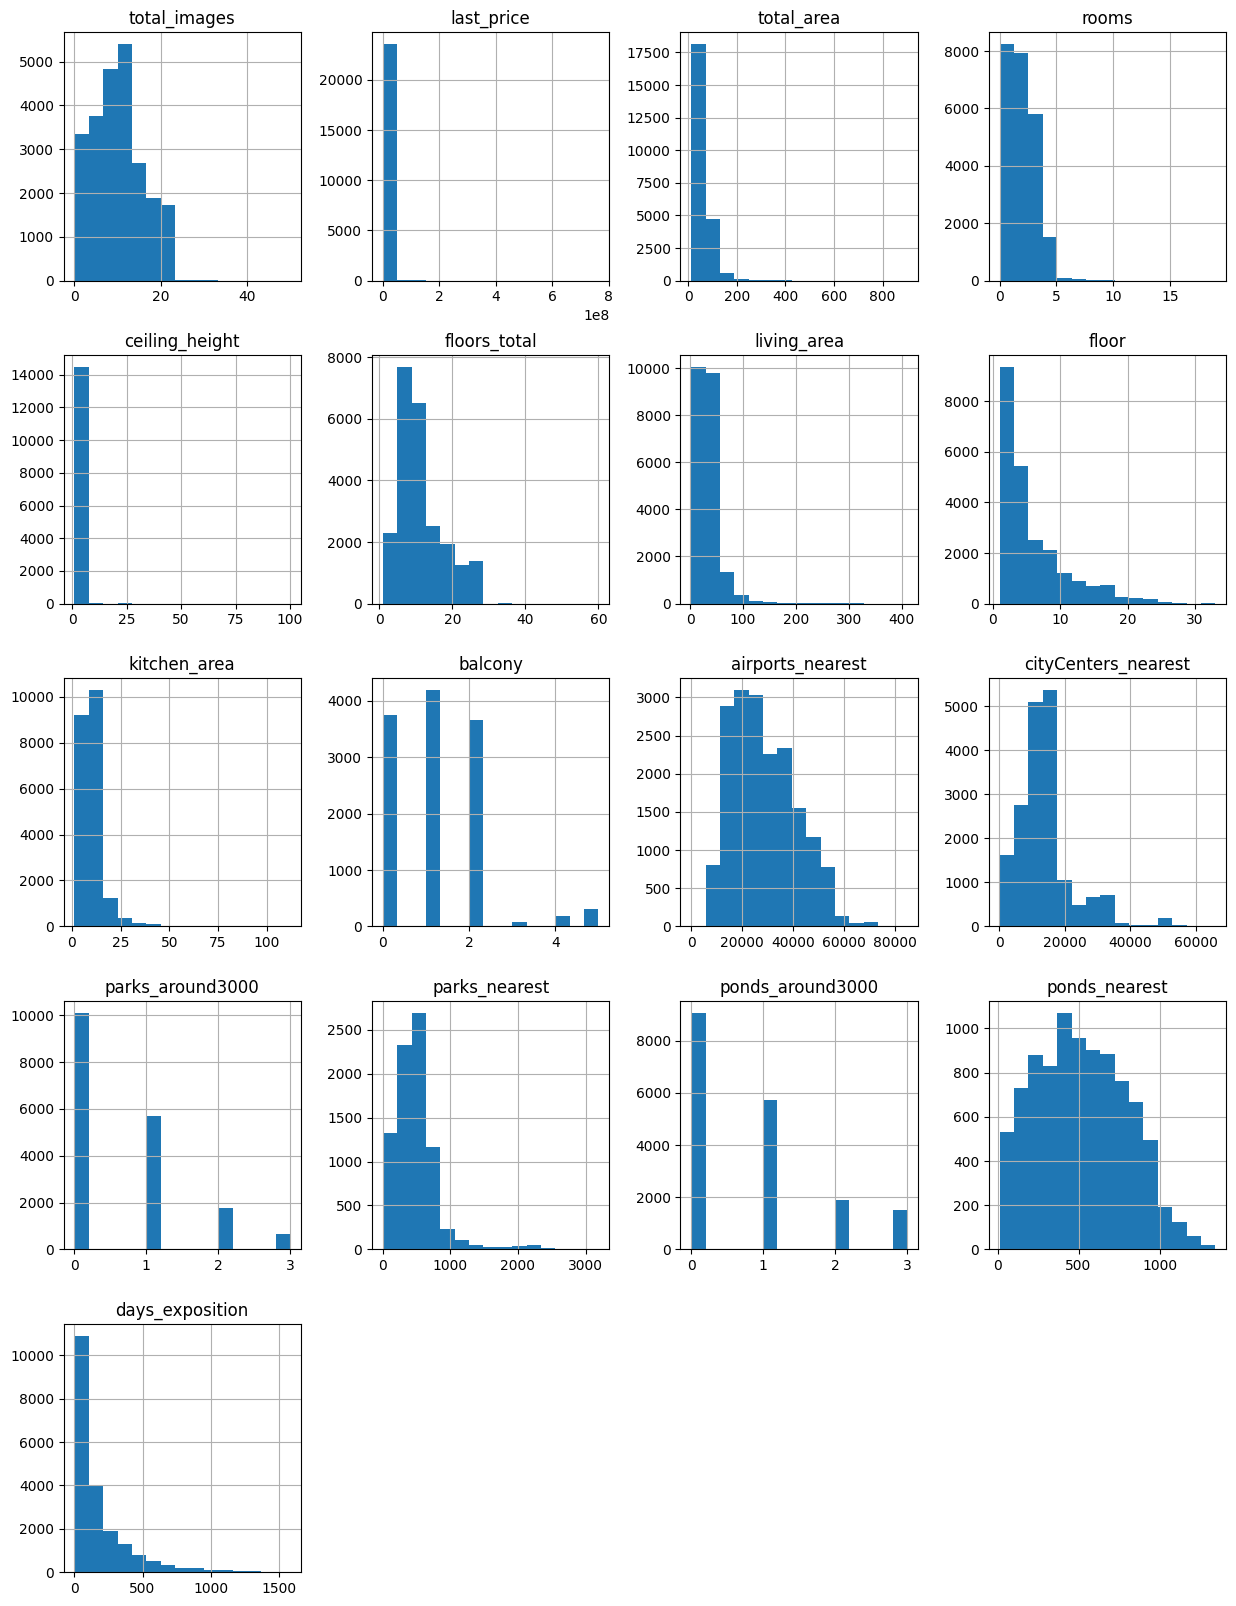

In [5]:
data.hist(bins=15, figsize=(15, 20));

Статистическая информация по каждому столбцу:

In [6]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
data.describe()

total_images   last_price  total_area    rooms  ceiling_height  \
count      23699.00     23699.00    23699.00 23699.00        14504.00   
mean           9.86   6541548.77       60.35     2.07            2.77   
std            5.68  10887013.27       35.65     1.08            1.26   
min            0.00     12190.00       12.00     0.00            1.00   
25%            6.00   3400000.00       40.00     1.00            2.52   
50%            9.00   4650000.00       52.00     2.00            2.65   
75%           14.00   6800000.00       69.90     3.00            2.80   
max           50.00 763000000.00      900.00    19.00          100.00   

       floors_total  living_area    floor  kitchen_area  balcony  \
count      23613.00     21796.00 23699.00      21421.00 12180.00   
mean          10.67        34.46     5.89         10.57     1.15   
std            6.60        22.03     4.89          5.91     1.07   
min            1.00         2.00     1.00          1.30     0.00   
25%            5.00        18.60     2.00          7.00     0.00   
50%            9.00        30.00     4.00          9.10     1.00   
75%           16.00        42.30     8.00         12.00     2.00   
max           60.00       409.70    33.00        112.00     5.00   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
count          18157.00             18180.00          18181.00        8079.00   
mean           28793.67             14191.28              0.61         490.80   
std            12630.88              8608.39              0.80         342.32   
min                0.00               181.00              0.00           1.00   
25%            18585.00              9238.00              0.00         288.00   
50%            26726.00             13098.50              0.00         455.00   
75%            37273.00             16293.00              1.00         612.00   
max            84869.00             65968.00              3.00        3190.00   

       ponds_around3000  ponds_nearest  days_exposition  
count          18181.00        9110.00         20518.00  
mean               0.77         517.98           180.89  
std                0.94         277.72           219.73  
min                0.00          13.00             1.00  
25%                0.00         294.00            45.00  
50%                1.00         502.00            95.00  
75%                1.00         729.00           232.00  
max                3.00        1344.00          1580.00

Судя по полученной информации о файле найдены следующие неточности, которые предстоит исследовать и обработать:
1. В следующих столбцах присутсвуют пропуски данных: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, days_exposition
2. В столбце first_day_exposition нужно исправить тип данных на datetime; в столбце floors_total нужно исправить тип данных на int; в столбце is_apartment нужно исправить тип данных на bool; в столбце balcony нужно исправить тип данных на int; в столбце days_exposition нужно исправить тип данных на int.
3. В каждом столбце с численными данными нужно проверить минимальные и максимальные значения для поиска выбросов

### Предобработка данных

Выведем названия столбцов

In [7]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Для приведения названий к общему виду необходимо исправить название столбца cityCenters_nearest

In [8]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

Последовательно обработаем каждый столбец: выявим и исправим аномалии, заполним пропущенные значения

#### Столбец total_images

Построим гистограмму

<Axes: >

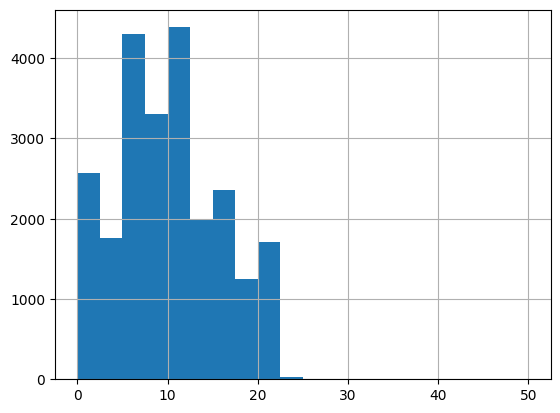

In [9]:
data['total_images'].hist(bins=20)

Судя по гистограмме аномальных значений нет; исходя из инофрмации о файле в столбце заполнены все строки

#### Столбец last_price

Статистические данные столбца

In [10]:
data['last_price'].describe()

count       23699.00
mean      6541548.77
std      10887013.27
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

Отсортируем столбец по цене и изучим максимальные и минимальные значения

In [11]:
data.sort_values('last_price')[['last_price', 'total_area', 'rooms', 'locality_name', 'city_centers_nearest', 'first_day_exposition']].head(10)

last_price  total_area  rooms               locality_name  \
8793     12190.00      109.00      2             Санкт-Петербург   
17456   430000.00       30.40      1                      Сланцы   
14911   430000.00       54.00      2       посёлок станции Свирь   
16274   440000.00       40.00      1          деревня Старополье   
17676   450000.00       36.50      1           деревня Ям-Тесово   
16219   450000.00       38.50      2        деревня Вахнова Кара   
9581    450000.00       43.40      2          деревня Старополье   
5698    450000.00       42.00      2  городской посёлок Будогощь   
21912   470000.00       37.00      1           поселок Совхозный   
18867   470000.00       41.00      1            деревня Выскатка   

       city_centers_nearest first_day_exposition  
8793                9176.00  2019-03-20T00:00:00  
17456                   NaN  2019-04-22T00:00:00  
14911                   NaN  2018-06-26T00:00:00  
16274                   NaN  2018-07-10T00:00:00  
17676                   NaN  2018-02-01T00:00:00  
16219                   NaN  2018-07-11T00:00:00  
9581                    NaN  2018-08-31T00:00:00  
5698                    NaN  2017-07-31T00:00:00  
21912                   NaN  2018-02-18T00:00:00  
18867                   NaN  2018-02-11T00:00:00

In [12]:
data.sort_values('last_price')[['last_price', 'total_area', 'rooms', 'locality_name', 'city_centers_nearest', 'first_day_exposition']].tail(10)

last_price  total_area  rooms    locality_name  city_centers_nearest  \
8900  190870000.00      268.00      3  Санкт-Петербург               5297.00   
5893  230000000.00      500.00      6  Санкт-Петербург               5297.00   
13749 240000000.00      410.00      6  Санкт-Петербург               5297.00   
16461 245000000.00      285.70      6  Санкт-Петербург               6235.00   
22831 289238400.00      187.50      2  Санкт-Петербург               1073.00   
15651 300000000.00      618.00      7  Санкт-Петербург               5297.00   
1436  330000000.00      190.00      3  Санкт-Петербург               1197.00   
14706 401300000.00      401.00      5  Санкт-Петербург               2389.00   
19540 420000000.00      900.00     12  Санкт-Петербург               7877.00   
12971 763000000.00      400.00      7  Санкт-Петербург               3956.00   

      first_day_exposition  
8900   2016-03-25T00:00:00  
5893   2017-05-31T00:00:00  
13749  2017-04-01T00:00:00  
16461  2017-04-10T00:00:00  
22831  2019-03-19T00:00:00  
15651  2017-12-18T00:00:00  
1436   2018-04-04T00:00:00  
14706  2016-02-20T00:00:00  
19540  2017-12-06T00:00:00  
12971  2017-09-30T00:00:00

Для дальнейшего анализа цен и выявления аномалий нужно обработать столбец с названиями населенных пунктов и расстояниями до центра

#### Столбец locality_name

Приводим названия к общему виду: убираем вид населенного пункта, заменяем похожие буквы, убираем прописные буквы

In [13]:
data['locality_name_short'] = data['locality_name'].str.replace('ё', 'е')
locality_list = [
    'поселок ',
    'при железнодорожной станции ',
    'станции ',
    'городского типа ',
    'городской ',
    'деревня ',
    'коттеджный ',
    'садовое товарищество ',
    'село ',
    'садоводческое некоммерческое товарищество '   
]
for locality in locality_list:
    data['locality_name_short'] = data['locality_name_short'].str.replace(locality, '')
data['locality_name_short'] = data['locality_name_short'].str.lower()
data['locality_name_short'].str.lower().sort_values().unique()

array(['агалатово', 'александровская', 'алексеевка', 'аннино', 'аро',
       'барышево', 'батово', 'бегуницы', 'белогорка', 'белоостров',
       'бокситогорск', 'большая вруда', 'большая ижора',
       'большая пустомержа', 'большие колпаны', 'большое рейзино',
       'большой сабск', 'бор', 'борисова грива', 'бугры', 'будогощь',
       'ваганово', 'важины', 'вартемяги', 'вахнова кара', 'вещево',
       'виллози', 'вознесенье', 'возрождение', 'войсковицы', 'войскорово',
       'володарское', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'вырица', 'выскатка', 'высокоключевой', 'высоцк', 'гаврилово',
       'гарболово', 'гатчина', 'гладкое', 'глажево', 'глебычево',
       'глинка', 'гончарово', 'горбунки', 'гостилицы', 'громово',
       'дзержинского', 'дружная горка', 'дружноселье', 'дубровка',
       'елизаветино', 'ефимовский', 'жилгородок', 'жилпоселок', 'житково',
       'заводской', 'заклинье', 'заневка', 'запорожское', 'зеленогорск',
       'зимитицы', 'ивангород', 'извара'

Проверяем ошибки в унификации названий

In [14]:
pd.set_option('display.max_rows', None)
display(
    data.pivot_table(
    index=['locality_name_short', 'locality_name'],
    values='total_area'
    ).reset_index().query('locality_name_short.duplicated(keep=False)')
)
pd.reset_option('display.max_rows')

locality_name_short                                      locality_name  \
3                   аннино                                     поселок Аннино   
4                   аннино                                     посёлок Аннино   
13           большая ижора                    городской поселок Большая Ижора   
14           большая ижора              поселок городского типа Большая Ижора   
21                   бугры                                      поселок Бугры   
22                   бугры                                      посёлок Бугры   
28                  вещево                             поселок станции Вещево   
29                  вещево         посёлок при железнодорожной станции Вещево   
32             возрождение                                поселок Возрождение   
33             возрождение                                посёлок Возрождение   
41                  вырица                     поселок городского типа Вырица   
42                  вырица                     посёлок городского типа Вырица   
46               гаврилово                                  поселок Гаврилово   
47               гаврилово                                  посёлок Гаврилово   
48               гарболово                                  деревня Гарболово   
49               гарболово                                  поселок Гарболово   
58                 громово                                    поселок Громово   
59                 громово                            посёлок станции Громово   
66              жилгородок                                 поселок Жилгородок   
67              жилгородок                                 посёлок Жилгородок   
75                зимитицы                                   деревня Зимитицы   
76                зимитицы                                   поселок Зимитицы   
79                ильичево                                   поселок Ильичёво   
80                ильичево                                   посёлок Ильичёво   
82         имени свердлова            поселок городского типа имени Свердлова   
83         имени свердлова            посёлок городского типа имени Свердлова   
85                калитино                                   деревня Калитино   
86                калитино                                   поселок Калитино   
102              кобралово                                  поселок Кобралово   
103              кобралово                                  посёлок Кобралово   
113             коробицыно                                 поселок Коробицыно   
114             коробицыно                                 посёлок Коробицыно   
120            красный бор                поселок городского типа Красный Бор   
121            красный бор                посёлок городского типа Красный Бор   
124                кудрово                                            Кудрово   
125                кудрово                                    деревня Кудрово   
128          кузьмоловский              поселок городского типа Кузьмоловский   
129          кузьмоловский              посёлок городского типа Кузьмоловский   
136                лебяжье                    поселок городского типа Лебяжье   
137                лебяжье                    посёлок городского типа Лебяжье   
142                 лесное                          коттеджный посёлок Лесное   
143                 лесное                                     поселок Лесное   
144            лесогорский                      городской посёлок Лесогорский   
145            лесогорский                поселок городского типа Лесогорский   
146              лисий нос                                  поселок Лисий Нос   
147              лисий нос                                  посёлок Лисий Нос   
155                 любань                                             Любань   
156                 любань                                     поселок Любань   
162                    мга            

Необходимо раздедить следующие нас. пункты:
<ul>
    <li>поселок Громово и посёлок станции Громово</li>
    <li>коттеджный посёлок Лесное и поселок Лесное</li>
    <li>Никольское и село Никольское</li>
    <li>посёлок городского типа Павлово	и село Павлово</li>
</ul>

In [15]:
data.loc[data['locality_name'] == 'посёлок станции Громово', 'locality_name_short'] = 'поселок станции громово'
data.loc[data['locality_name'] == 'коттеджный посёлок Лесное', 'locality_name_short'] = 'коттеджный поселок лесное'
data.loc[data['locality_name'] == 'село Никольское', 'locality_name_short'] = 'село никольское'
data.loc[data['locality_name'] == 'село Павлово', 'locality_name_short'] = 'село павлово'

#### Столбец city_centers_nearest

Ищем пропущенные значения в расстояниях

Населенные пункты с известным расстоянием до центра:

In [16]:
data[
    data['city_centers_nearest'].isna() == False
].groupby('locality_name_short')['city_centers_nearest'].count().sum()

18139

Записываем средние расстояния до центра выбранных населенных пунктов

In [17]:
mean_center_nearest = data[
    data['city_centers_nearest'].isna() == False
].groupby('locality_name_short')['city_centers_nearest'].mean()

Ищем количество объектов в выбранных населенных пунктах

In [18]:
data.query(
    'locality_name_short in @mean_center_nearest.index'
).groupby('locality_name_short')['locality_name_short'].count().sum()

18821

In [19]:
data.query(
    'locality_name_short in @mean_center_nearest.index and locality_name_short.isna()'
).groupby('locality_name_short')['locality_name_short'].count().sum()

0

Заменяем пропущенные значения расстояний средними

In [20]:
for i in range(len(mean_center_nearest.values)):
    data.loc[data['locality_name_short'] == mean_center_nearest.index[i], 'city_centers_nearest'] = (
    data.loc[data['locality_name_short'] == mean_center_nearest.index[i], 'city_centers_nearest'].fillna(mean_center_nearest.values[i])
    )

In [21]:
mean_center_nearest['санкт-петербург']

11601.291570881225

Проверяем замены

In [22]:
data[
    data['city_centers_nearest'].isna() == False
].groupby('locality_name_short')['city_centers_nearest'].count().sum()

18821

Такие же действия для расстояний до аэропорта

In [23]:
data[
    data['airports_nearest'].isna() == False
].groupby('locality_name_short')['airports_nearest'].count().sum()

18116

In [24]:
mean_airport_nearest = data[
    data['airports_nearest'].isna() == False
].groupby('locality_name_short')['airports_nearest'].mean()

In [25]:
data.query(
    'locality_name_short in @mean_airport_nearest.index'
).groupby('locality_name_short')['locality_name_short'].count().sum()

18821

In [26]:
for i in range(len(mean_airport_nearest.values)):
    data.loc[data['locality_name_short'] == mean_airport_nearest.index[i], 'airports_nearest'] = (
    data.loc[data['locality_name_short'] == mean_airport_nearest.index[i], 'airports_nearest'].fillna(mean_airport_nearest.values[i])
    )

In [27]:
data[
    data['airports_nearest'].isna() == False
].groupby('locality_name_short')['airports_nearest'].count().sum()

18821

Пропущенные значения в названиях:

In [28]:
data['locality_name'].isna().sum()

49

Заменяем пропущенные значения с расстоянием до центра в 11 км - это точно Санкт-Петербург

In [29]:
data.loc[
    (data['locality_name'].isna() == True)&(data['city_centers_nearest'] < 11000),
    ['locality_name', 'locality_name_short']
] = 'Санкт-Петербург' 

In [30]:
data['locality_name'].isna().sum()

23

Осталось 23 пропущенных значения, выведем расстояния до аэропорта и центра

In [31]:
data.query('locality_name.isna()')[['airports_nearest', 'city_centers_nearest']]

airports_nearest  city_centers_nearest
2033                NaN                   NaN
2603           22041.00              17369.00
2632           22041.00              17369.00
5707           21460.00              16788.00
6765           22041.00              17369.00
7600           37123.00              12332.00
8986           19659.00              31813.00
12879          37123.00              12332.00
13223          22041.00              17369.00
13690          20234.00              23659.00
14273          22041.00              17369.00
14342               NaN                   NaN
16499          22041.00              17369.00
17535               NaN                   NaN
19972          22041.00              17369.00
20382               NaN                   NaN
20590               NaN                   NaN
21119          19744.00              31897.00
21276          60195.00              41294.00
21715               NaN                   NaN
21898               NaN                   NaN
22717               NaN                   NaN
22933          22041.00              17369.00

Строки с неизвестными расстояниями до центра и аэропорта удаляем. Местонахождение этих объектов определить невозможно

In [32]:
data = data.query('not (locality_name.isna() == True and city_centers_nearest.isna() == True)')
data.query('locality_name.isna()')[['airports_nearest', 'city_centers_nearest']]

airports_nearest  city_centers_nearest
2603           22041.00              17369.00
2632           22041.00              17369.00
5707           21460.00              16788.00
6765           22041.00              17369.00
7600           37123.00              12332.00
8986           19659.00              31813.00
12879          37123.00              12332.00
13223          22041.00              17369.00
13690          20234.00              23659.00
14273          22041.00              17369.00
16499          22041.00              17369.00
19972          22041.00              17369.00
21119          19744.00              31897.00
21276          60195.00              41294.00
22933          22041.00              17369.00

Ищем по двум расстояниям названия населенных пунктов с такими же расстояниями

In [33]:
data['locality_name'][
    (data['airports_nearest'].isin(data.query('locality_name.isna()')['airports_nearest'].unique()))&
    (data['city_centers_nearest'].isin(data.query('locality_name.isna()')['city_centers_nearest'].unique()))
].unique()

array(['Санкт-Петербург', nan], dtype=object)

Все пропущенные тоже в Санкт-Петербурге. Заменяем

In [34]:
data.loc[
    (data['locality_name'].isna() == True),
    ['locality_name', 'locality_name_short']
] = 'Санкт-Петербург'
data['locality_name'].isna().sum()

0

In [35]:
data['locality_name_short'].isna().sum()

0

In [36]:
data['locality_name_short'] = data['locality_name_short'].str.lower()

#### Создание категорий по географическому признаку

Разобьем данные на категории: Санкт-Петербург, агломерация СПб, районные центры ЛО, остальные населенные пункты ЛО

Список городов СПб

In [37]:
spb_locality = 'Зеленогорск | Колпино | Красное Село | Кронштадт | Ломоносов | Павловск | Петергоф | Пушкин | Сестрорецк | Александровская | Белоостров | Комарово | Левашово | Лисий Нос | Металлострой | Молодёжное | Парголово | Песочный | Петро-Славянка | Понтонный | Репино | Сапёрный | Серово | Смолячково | Солнечное | Стрельна | Тярлево | Усть-Ижора | Ушково | Шушары'

In [38]:
spb_locality = spb_locality.split(' | ')
print(len(spb_locality))
for i in range(len(spb_locality)):
    spb_locality[i] = spb_locality[i].replace('ё', 'е').lower()
spb_locality
len(data.query('locality_name_short in @spb_locality')['locality_name_short'].unique())

30


24

In [39]:
data.query('locality_name_short not in @spb_locality')['locality_name'].unique()


array(['Санкт-Петербург', 'городской посёлок Янино-1', 'посёлок Мурино',
       'Сертолово', 'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
       '

Список городов ЛО

In [40]:
lo_locality = 'Бокситогорск | Волосово | Волхов | Всеволожск | Выборг | Гатчина | Кингисепп | Кириши | Кировск | Лодейное Поле | Луга | Подпорожье | Приозерск | Сланцы | Тихвин | Тосно | Сосновый Бор'
lo_locality = lo_locality.split(' | ')
print(len(lo_locality))
for i in range(len(lo_locality)):
    lo_locality[i] = lo_locality[i].replace('ё', 'е').lower()
spb_locality
len(data.query('locality_name_short in @lo_locality')['locality_name_short'].unique())

17


17

In [41]:
aglomeration_locality = 'агалатово	аннино	аро	большие колпаны	большое рейзино	бор	бугры	вартемяги	виллози	войсковицы	войскорово	всеволожск	гатчина	глинка	горбунки	гостилицы	дубровка	жилгородок	заневка	ильичево	имени свердлова	кальтино	келози	кипень	кировск	кобралово	колтуши	коммунар	коркино	корнево	красный бор	кудрово	кузьмолово	кузьмоловский	куттузи	лаврики	лаголово	ленинское	лесколово	лукаши	лупполово	малая романовка	малое верево	малое карлино	малые колпаны	мистолово	мурино	мыза-ивановка	нижние осельки	нижняя	низино	никольское	новая ропша	новогорелово	новое девяткино	новолисино	новоселье	новый свет	новый учхоз	оржицы	отрадное	павлово	парицы	пеники	петровское	пикколово	приветнинское	пригородный	пудомяги	пудость	пустынка	разбегаево	разметелево	рапполово	романовка	ропша	рощино	русско-высоцкое	семрино	сертолово	синявино	старая	старая пустошь	суоранда	счастье	сяськелево	тайцы	тельмана	терволово	тойворово	токсово	тосно	углово	ульяновка	федоровское	форносово	хапо-ое	хязельки	шлиссельбург	щеглово	юкки	яльгелево	янино-1'
aglomeration_locality = aglomeration_locality.split('\t')
len(data.query('locality_name_short in @aglomeration_locality')['locality_name_short'].unique())

103

Следующие города-районные центры ЛО попадут в категорию "агломерация СПб"

In [42]:
for i in range(len(aglomeration_locality)):
    if aglomeration_locality[i] in lo_locality:
        print(aglomeration_locality[i])

всеволожск
гатчина
кировск
тосно


Разбиваем данные на категории по местоположению объектов

In [43]:
data.loc[data['locality_name_short'] == 'санкт-петербург', 'cat_locality'] = 'СПб'
data.loc[data['locality_name_short'].isin(lo_locality), 'cat_locality'] = 'Райцентр ЛО'
data.loc[data['locality_name_short'].isin(aglomeration_locality), 'cat_locality'] = 'Агломерация'
data.loc[data['locality_name_short'].isin(spb_locality), 'cat_locality'] = 'города в СПб'
data['cat_locality'] = data['cat_locality'].fillna('ЛО')

In [44]:
data['cat_locality'].isna().sum()

0

Создаем столбец с ценой квадратного метра

In [45]:
data['price_m2'] = data['last_price'] / data['total_area']

Чтобы понять изменялись ли цены со временем нужно обработать соответствующий столбец

In [46]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Добавляем столбцы с годом, месяцем и днем недели

In [47]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['day_of_week'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek

<Axes: xlabel='year'>

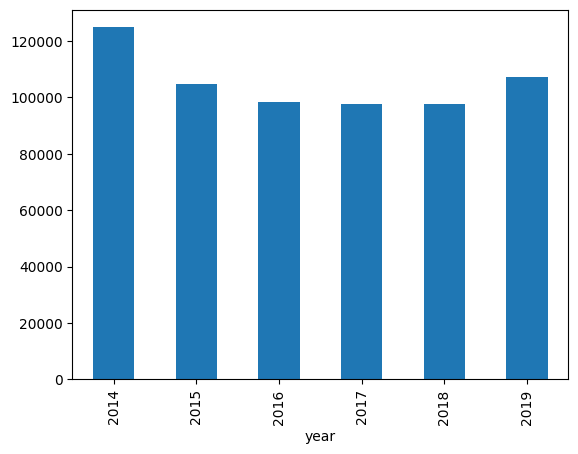

In [48]:
data.groupby(data['year'])['price_m2'].mean().plot(kind='bar')

Судя по графику, цена квадратного метра за эти годы менялась незначительно, можно проводить анализ на весь период

#### Обработка столбцов last_price и total_area

Строим диаграммы размаха цен квадратного метра по каждой категории и обработаем 2 столбца: площади и цены

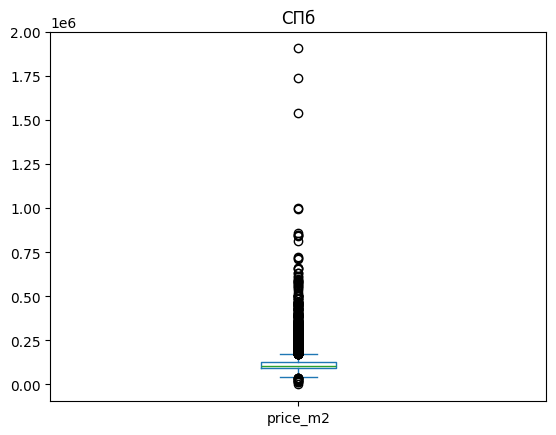

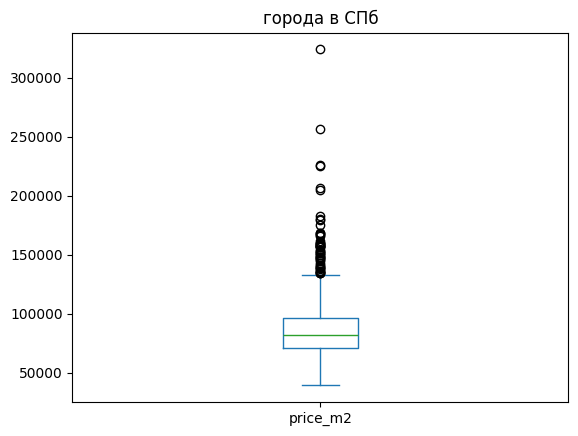

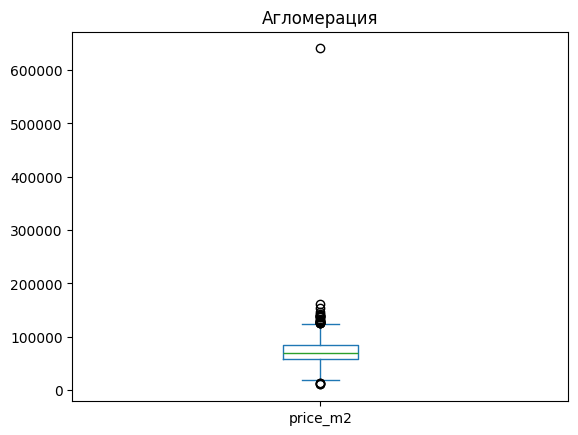

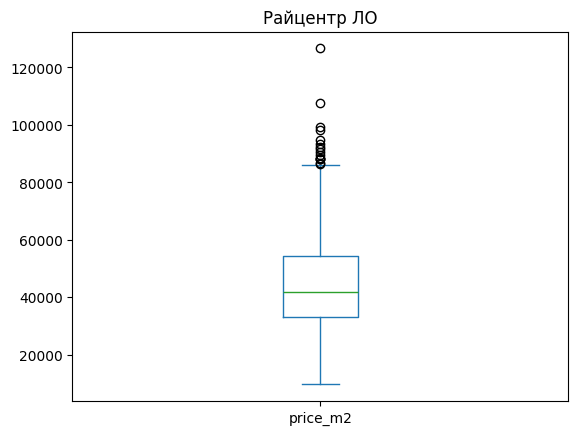

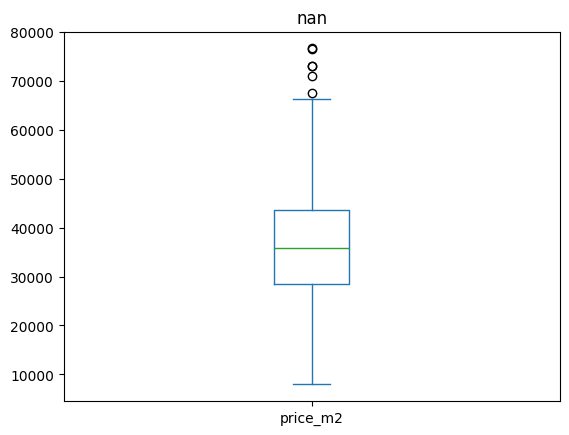

In [49]:
cat_loc_names = data['cat_locality'].unique()
for cat_loc_name in cat_loc_names:
    data[data['cat_locality'] == cat_loc_name].plot(y='price_m2', kind='box', title=cat_loc_name)

Ищем аномальные значния в каждой категории:

##### Санкт-Петербург

In [50]:
data[(data['cat_locality'] == 'СПб')]['price_m2'].describe()

count     15762.00
mean     114810.08
std       52544.83
min         111.83
25%       90909.09
50%      104750.00
75%      124399.98
max     1907500.00
Name: price_m2, dtype: float64

Разобьем категорию "Санкт-Петербург" на две: границу проведем по границам исторического центра с расстоянием до центра в 5 км. Новая категория "Центр СПб":

In [51]:
data.loc[data['city_centers_nearest'] < 5000, 'cat_locality'] = 'Центр СПб'

<Axes: >

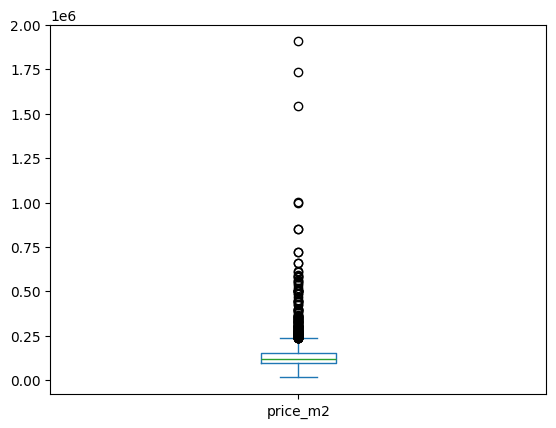

In [52]:
data[data['cat_locality'] == 'Центр СПб']['price_m2'].plot(y='price_m2', kind='box')

In [53]:
data[(data['cat_locality'] == 'Центр СПб')]['price_m2'].describe()

count      2081.00
mean     142051.13
std      100625.12
min       15861.57
25%       97222.22
50%      120000.00
75%      153061.22
max     1907500.00
Name: price_m2, dtype: float64

Ишем максимальные значения цены за квадратный метр

In [54]:
data[data['cat_locality'] == 'Центр СПб'].sort_values(by='price_m2').tail(10)

total_images   last_price  total_area first_day_exposition  rooms  \
2536             16 159984000.00      242.40           2015-08-27      4   
6462              2  82000000.00      114.00           2015-12-17      3   
8322             20  39900000.00       55.30           2017-10-26      1   
17172            14  28000000.00       33.00           2019-04-30      1   
4859             16  28000000.00       33.00           2019-04-29      1   
4996             20 124000000.00      124.50           2017-10-12      4   
14706            15 401300000.00      401.00           2016-02-20      5   
22831            18 289238400.00      187.50           2019-03-19      2   
1436             19 330000000.00      190.00           2018-04-04      3   
12971            19 763000000.00      400.00           2017-09-30      7   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
2536             3.85          9.00       131.00      7          NaN   False   
6462              NaN          5.00        78.50      4          NaN   False   
8322             3.05          6.00        35.00      4          NaN   False   
17172            3.50          5.00          NaN      2          NaN   False   
4859             3.50          5.00          NaN      2          NaN   False   
4996             3.00          4.00        67.20      2        False   False   
14706             NaN          9.00       204.00      9        False   False   
22831            3.37          6.00        63.70      6          NaN   False   
1436             3.50          7.00        95.00      5          NaN   False   
12971             NaN         10.00       250.00     10          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
2536       False         20.00     0.00  Санкт-Петербург          21946.00   
6462       False         20.00     0.00  Санкт-Петербург          22460.00   
8322       False          8.00     4.00  Санкт-Петербург          25685.00   
17172      False           NaN      NaN  Санкт-Петербург          23403.00   
4859       False           NaN      NaN  Санкт-Петербург          23447.00   
4996       False         20.00      NaN  Санкт-Петербург          20399.00   
14706      False         24.00     3.00  Санкт-Петербург          21912.00   
22831      False         30.20      NaN  Санкт-Петербург          22494.00   
1436       False         40.00      NaN  Санкт-Петербург          23011.00   
12971      False           NaN     2.00  Санкт-Петербург          25108.00   

       city_centers_nearest  parks_around3000  parks_nearest  \
2536                2242.00              1.00         679.00   
6462                3400.00              2.00         218.00   
8322                2136.00              1.00          72.00   
17172               1462.00              3.00         342.00   
4859                1376.00              3.00         344.00   
4996                1722.00              3.00         302.00   
14706               2389.00              1.00         545.00   
22831               1073.00              3.00         386.00   
1436                1197.00              3.00         519.00   
12971               3956.00              1.00         530.00   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  \
2536               1.00         227.00           501.00     санкт-петербург   
6462               3.00          69.00           651.00     санкт-петербург   
8322               3.00         202.00              NaN     санкт-петербург   
17172              3.00          27.00              NaN     санкт-петербург   
4859               3.00         119.00              NaN     санкт-петербург   
4996               3.00         172.00            45.00     санкт-петербург   
14706              1.00         478.00           393.00     санкт-петербург   
22831              3.00         188.00              NaN     санкт-петербург   
1436          

Все объекты расположены в центре или имеют большую площадь, скорее всего это элитное жилье и данные записаны верно. Объекты с индексами 17172 и 4859 похожи на дубликаты. Обработаем их позже и попробуем найти похожие дубликаты

Проверим минимальные значения

In [55]:
data[data['cat_locality'] == 'Центр СПб'].sort_values(by='price_m2').head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
19952             7  2200000.00      138.70           2016-06-24      4   
21338            15  3200000.00      190.00           2016-06-16      1   
23394            10  1600000.00       92.00           2018-07-10      3   
7756              1  4390000.00      151.80           2017-04-28      6   
8626              6  5400000.00      100.00           2017-05-24      3   
19964            10 13545000.00      238.26           2019-01-30      3   
22038            10 11940000.00      206.00           2018-12-12      5   
16306            10  4550000.00       76.50           2018-12-19      3   
7728              4  5400000.00       88.70           2017-10-05      4   
9397             10 16073000.00      263.80           2019-01-30      3   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
19952             NaN          7.00        90.70      5        False   False   
21338            3.00          6.00        43.00      4        False   False   
23394            3.00          6.00        13.00      1          NaN   False   
7756             3.50          6.00       106.50      6        False   False   
8626              NaN          4.00        62.00      4          NaN   False   
19964             NaN         19.00          NaN      4          NaN   False   
22038            3.50          6.00       160.00      3          NaN   False   
16306             NaN         25.00        42.00      8          NaN   False   
7728              NaN          5.00        65.00      1          NaN   False   
9397              NaN         19.00          NaN      4          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
19952      False         13.70     0.00  Санкт-Петербург          25221.00   
21338      False         13.00     0.00  Санкт-Петербург          22592.00   
23394      False         10.00      NaN  Санкт-Петербург          20881.00   
7756       False         14.30     1.00  Санкт-Петербург          24576.00   
8626       False         14.00     0.00  Санкт-Петербург          24085.00   
19964      False         10.20      NaN  Санкт-Петербург          18995.00   
22038      False         26.00      NaN  Санкт-Петербург          20123.00   
16306      False          9.40      NaN  Санкт-Петербург          23368.00   
7728       False          9.00      NaN  Санкт-Петербург          20810.00   
9397       False         23.42      NaN  Санкт-Петербург          18805.00   

       city_centers_nearest  parks_around3000  parks_nearest  \
19952               4069.00              0.00            NaN   
21338               4312.00              1.00         350.00   
23394               4465.00              1.00         937.00   
7756                2270.00              0.00            NaN   
8626                4652.00              1.00         242.00   
19964               4579.00              0.00            NaN   
22038               1852.00              3.00         510.00   
16306               4151.00              0.00            NaN   
7728                4755.00              1.00         236.00   
9397                4400.00              0.00            NaN   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  \
19952              2.00         653.00           203.00     санкт-петербург   
21338              0.00            NaN            11.00     санкт-петербург   
23394              3.00         167.00             3.00     санкт-петербург   
7756               0.00            NaN            44.00     санкт-петербург   
8626               0.00            NaN            37.00     санкт-петербург   
19964              0.00            NaN            35.00     санкт-петербург   
22038              3.00         417.00            90.00     санкт-петербург   
16306              0.00            NaN             3.00     санкт-петербург   
7728               3.00  

Чтобы убедиться что значения верные, сравним с объектами с находящимися рядом

Создаем функции, возвращающие границы интервала значений без выбросов

In [56]:
def mini(cat_locality, column):
    return data.query('cat_locality.isin(@cat_locality)')[column].quantile(q=0.25) - 1.5*(
        data.query('cat_locality.isin(@cat_locality)')[column].quantile(q=0.75)-
        data.query('cat_locality.isin(@cat_locality)')[column].quantile(q=0.25)
    )

In [57]:
def maxi(cat_locality, column):
    return data.query('cat_locality.isin(@cat_locality)')[column].quantile(q=0.75) + 1.5*(
        data.query('cat_locality.isin(@cat_locality)')[column].quantile(q=0.75)-
        data.query('cat_locality.isin(@cat_locality)')[column].quantile(q=0.25)
    )

Считаем значение нижней и верхней границ для цен кв.метра в центре СПб

In [58]:
min_price_spbcenter = mini(['Центр СПб'], 'price_m2')
min_price_spbcenter

13463.718820861672

In [59]:
max_price_spbcenter = maxi(['Центр СПб'], 'price_m2')
max_price_spbcenter

236819.72789115645

Все значения попадают в интервал, но из-за большого количества объектов с высокими ценами кв. метра, необходимо проверить объекты с минимальными значенями цен. Возьмем нижнюю границу за 25% квантиль и найдем медианные значения цен находящихся рядом объектов. Для категорий центр СПб и СПб известны расстояния до центра и аэропорта, поэтому искать рядом находящиеся объекты будем по этим параметрам, а также по количеству этажей в здании

In [60]:
min_price_spbcenter = data[(data['cat_locality'] == 'Центр СПб')]['price_m2'].quantile(q=0.25)
min_price_spbcenter

97222.22222222222

Создаем функцию для поиска значений у находящихся рядом объектов (по параметрам: расстояние до центра, расстояние до аэропорта, количество этажей)

In [61]:
def median_near_price(category, mini, maxi):
    med = data.query(
        'cat_locality == @category'
    ).query(
        '@mini < price_m2 < @maxi'
    ).pivot_table(
        index=['airports_nearest', 'city_centers_nearest', 'floors_total'],
        values=['price_m2', 'last_price', 'total_area'], aggfunc=['median', 'count']
    )
    med.columns = ['last_price', 'price_m2', 'total_area', 'count', 1, 0]
    med = med[['last_price', 'price_m2', 'total_area', 'count']]
    return med

In [62]:
med_price_spbcenter = median_near_price('Центр СПб', min_price_spbcenter, max_price_spbcenter)
med_price_spbcenter

last_price  price_m2  \
airports_nearest city_centers_nearest floors_total                         
17863.00         1463.00              7.00         15300000.00 157731.96   
18039.00         4352.00              10.00         7722600.00 125980.42   
                                      14.00         3577388.00 123956.62   
                                      18.00         8520000.00 133125.00   
18065.00         4232.00              12.00        13500000.00 141955.84   
...                                                        ...       ...   
32863.00         4964.00              9.00          8500000.00 135514.02   
32908.00         4686.00              5.00         11200000.00 170992.37   
33157.00         4551.00              5.00         18000000.00 182926.83   
34033.00         4768.00              8.00         10648000.00 152747.10   
                                      10.00        10225000.00 151388.89   

                                                    total_area  count  
airports_nearest city_centers_nearest floors_total                     
17863.00         1463.00              7.00               97.00      1  
18039.00         4352.00              10.00              61.30      1  
                                      14.00              28.86      1  
                                      18.00              64.00      1  
18065.00         4232.00              12.00              95.10      1  
...                                                        ...    ...  
32863.00         4964.00              9.00               66.00      3  
32908.00         4686.00              5.00               65.50      1  
33157.00         4551.00              5.00               98.40      1  
34033.00         4768.00              8.00               69.71      1  
                                      10.00              68.00      3  

[1135 rows x 4 columns]

Создаем таблицу сравнения цен, площади и цены кв. метра с медианными значениями находящихся рядом объектов

In [63]:
compare_price_spbcenter = data.query(
    'price_m2 < 50000 and "Центр СПб" in cat_locality'
).join(
    med_price_spbcenter, on=['airports_nearest', 'city_centers_nearest', 'floors_total'], rsuffix='_median'
)[['last_price', 'last_price_median', 'total_area', 'total_area_median','price_m2', 'price_m2_median', 'count']].sort_values('price_m2')
compare_price_spbcenter

last_price  last_price_median  total_area  total_area_median  price_m2  \
19952  2200000.00         7300000.00      138.70              51.40  15861.57   
21338  3200000.00                NaN      190.00                NaN  16842.11   
23394  1600000.00         4350000.00       92.00              38.00  17391.30   
7756   4390000.00                NaN      151.80                NaN  28919.63   

       price_m2_median  count  
19952        142023.35   1.00  
21338              NaN    NaN  
23394        114473.68   1.00  
7756               NaN    NaN

У объкета 19952 неверно записана цена, так как жилая площадь сопоставима с жилой площадью и площадью кухни, она на порядок меньше. У объекта 23394 неверно указана площадь. Заменяем

In [64]:
data.loc[19952, 'last_price'] = data.loc[19952, 'last_price'] * 10

In [65]:
data.loc[23394, 'total_area'] = compare_price_spbcenter.loc[23394, 'total_area_median']

In [66]:
data.loc[23394, 'total_area']

38.0

Аналогично обрабатываем категорию СПб

<Axes: >

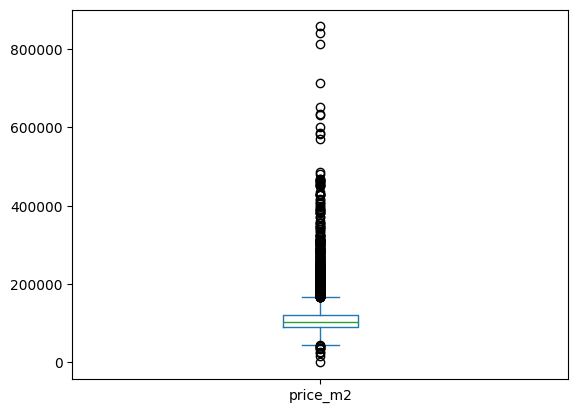

In [67]:
data[data['cat_locality'] == 'СПб']['price_m2'].plot(y='price_m2', kind='box')

In [68]:
data[data['cat_locality'] == 'СПб']['price_m2'].describe()

count    13681.00
mean    110666.47
std      38876.27
min        111.83
25%      90243.90
50%     103274.56
75%     121153.85
max     857542.88
Name: price_m2, dtype: float64

In [69]:
data[data['cat_locality'] == 'СПб'].sort_values(by='price_m2').tail(10)

total_images   last_price  total_area first_day_exposition  rooms  \
11430            20  85000000.00      145.70           2018-08-16      3   
13749             7 240000000.00      410.00           2017-04-01      6   
22869             0  15000000.00       25.00           2018-07-25      1   
16590            10  98000000.00      155.00           2017-12-16      3   
20264            17 119000000.00      187.60           2017-07-10      4   
7857             11 150000000.00      230.00           2017-10-25      8   
8900             13 190870000.00      268.00           2016-03-25      3   
17912            17 135000000.00      166.00           2019-02-07      3   
16647            15 122000000.00      145.00           2017-04-25      3   
16461            17 245000000.00      285.70           2017-04-10      6   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
11430            3.36          5.00        87.23      5          NaN   False   
13749            3.40          7.00       218.00      7          NaN   False   
22869          100.00          5.00        14.00      5         True   False   
16590             NaN          8.00          NaN      6          NaN   False   
20264            6.00          7.00       147.00      7          NaN   False   
7857              NaN          8.00       220.00      8          NaN   False   
8900              NaN          8.00       132.00      7          NaN   False   
17912            3.30          7.00        52.00      1          NaN   False   
16647            3.30          6.00        36.00      2          NaN   False   
16461            3.35          7.00       182.80      4          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
11430      False         20.31     1.00  Санкт-Петербург          28371.00   
13749      False         40.00     0.00  Санкт-Петербург          32440.00   
22869      False         11.00     5.00  Санкт-Петербург          34963.00   
16590      False           NaN      NaN  Санкт-Петербург          32440.00   
20264      False         15.60      NaN  Санкт-Петербург          26902.00   
7857       False           NaN      NaN  Санкт-Петербург          25525.00   
8900       False         40.00      NaN  Санкт-Петербург          32440.00   
17912      False         64.00      NaN  Санкт-Петербург          32863.00   
16647      False         72.00      NaN  Санкт-Петербург          33931.00   
16461      False         29.80      NaN  Санкт-Петербург          33143.00   

       city_centers_nearest  parks_around3000  parks_nearest  \
11430               6917.00              2.00         165.00   
13749               5297.00              0.00            NaN   
22869               8283.00              1.00         223.00   
16590               5297.00              0.00            NaN   
20264               5605.00              3.00         484.00   
7857                5845.00              2.00         116.00   
8900                5297.00              0.00            NaN   
17912               5955.00              2.00         230.00   
16647               7023.00              2.00         478.00   
16461               6235.00              3.00         400.00   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  \
11430              2.00         500.00              NaN     санкт-петербург   
13749              2.00         198.00           199.00     санкт-петербург   
22869              3.00          30.00            19.00     санкт-петербург   
16590              2.00         198.00            90.00     санкт-петербург   
20264              1.00         305.00           259.00     санкт-петербург   
7857               0.00            NaN           135.00     санкт-петербург   
8900               2.00         198.00           901.00     санкт-петербург   
17912              3.00         215.00              NaN     санкт-петербург   
16647         

В этом случае также у объектов большие площади и они расположены близко к центру. Проверим объект 22869

In [70]:
min_price_spb = mini(['СПб'], 'price_m2')
min_price_spb

43878.98686679173

In [71]:
max_price_spb = maxi(['СПб'], 'price_m2')
max_price_spb

167518.7617260788

In [72]:
med_price_spb = median_near_price('СПб', min_price_spb, max_price_spb)
med_price_spb

last_price  price_m2  \
airports_nearest city_centers_nearest floors_total                         
6450.00          17461.00             9.00          3233500.00  69891.07   
6914.00          21486.00             4.00          2750000.00  94827.59   
6949.00          13165.00             24.00         6490000.00 103840.00   
6989.00          13205.00             14.00         6200000.00 113207.55   
                                      24.00         6420000.00  95820.90   
...                                                        ...       ...   
54535.00         19028.00             7.00          7285000.00 122231.54   
                                      8.00          4300000.00 122857.14   
54723.00         19216.00             7.00          4217233.00 107695.01   
54784.00         19277.00             25.00         5350000.00 119606.74   
60195.00         41294.00             3.00         17122148.00  96029.99   

                                                    total_area  count  
airports_nearest city_centers_nearest floors_total                     
6450.00          17461.00             9.00               45.50      2  
6914.00          21486.00             4.00               29.00      1  
6949.00          13165.00             24.00              62.50      1  
6989.00          13205.00             14.00              54.90      3  
                                      24.00              67.00      1  
...                                                        ...    ...  
54535.00         19028.00             7.00               59.60      1  
                                      8.00               35.00      1  
54723.00         19216.00             7.00               43.42      5  
54784.00         19277.00             25.00              44.75      2  
60195.00         41294.00             3.00              178.30      1  

[7646 rows x 4 columns]

In [73]:
compare_price_spb_max = data.query(
    'price_m2 > @max_price_spb and cat_locality == "СПб"'
).join(
    med_price_spb, on=['airports_nearest', 'city_centers_nearest', 'floors_total'], rsuffix='_median'
)[['last_price', 'last_price_median', 'total_area', 'total_area_median','price_m2', 'price_m2_median', 'count']].sort_values('price_m2')
compare_price_spb_max.sort_values('price_m2', ascending=False).head(10)

last_price  last_price_median  total_area  total_area_median  \
16461 245000000.00                NaN      285.70                NaN   
16647 122000000.00                NaN      145.00                NaN   
17912 135000000.00                NaN      166.00                NaN   
8900  190870000.00                NaN      268.00                NaN   
7857  150000000.00                NaN      230.00                NaN   
20264 119000000.00        23600000.00      187.60             181.30   
16590  98000000.00                NaN      155.00                NaN   
22869  15000000.00                NaN       25.00                NaN   
13749 240000000.00                NaN      410.00                NaN   
11430  85000000.00                NaN      145.70                NaN   

       price_m2  price_m2_median  count  
16461 857542.88              NaN    NaN  
16647 841379.31              NaN    NaN  
17912 813253.01              NaN    NaN  
8900  712201.49              NaN    NaN  
7857  652173.91              NaN    NaN  
20264 634328.36        130170.99   3.00  
16590 632258.06              NaN    NaN  
22869 600000.00              NaN    NaN  
13749 585365.85              NaN    NaN  
11430 583390.53              NaN    NaN

Находящиеся рядом объекты отсутсвуют, значения ошибочны. Удаляем объект

In [74]:
data = data.drop(22869)

Проверяем минимальные значения

In [75]:
data[data['cat_locality'] == 'СПб'].sort_values(by='price_m2').head(15)

total_images  last_price  total_area first_day_exposition  rooms  \
8793              7    12190.00      109.00           2019-03-20      2   
17753            12  1800000.00      117.30           2016-02-18      5   
4248              8  1200000.00       49.10           2018-10-21      4   
13739            19  2100000.00       80.00           2016-07-01      4   
2520              0  2300000.00       65.00           2017-01-24      3   
4903              0  3500000.00       94.00           2018-07-24      3   
3325              0  3500000.00       94.00           2018-07-23      3   
8646              0  3500000.00       94.00           2018-07-27      3   
19755            11  2080000.00       50.70           2017-07-20      2   
23606             0  2850000.00       68.00           2018-07-29      1   
15181             9  3000000.00       70.00           2016-03-10      3   
20273            12 20000000.00      460.80           2019-03-20      6   
14862             6  1704062.00       37.87           2017-10-13      1   
22403             5  1961100.00       43.58           2017-09-07      1   
16136             0  1900000.00       41.00           2018-02-01      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
8793             2.75         25.00        32.00     25          NaN   False   
17753             NaN          4.00        23.60      2        False   False   
4248             2.50          5.00        36.90      1          NaN   False   
13739             NaN          6.00        23.00      3          NaN   False   
2520              NaN          5.00        35.00      1          NaN   False   
4903             2.80         23.00        64.00     10          NaN   False   
3325             3.00         23.00        64.00     10          NaN   False   
8646             2.70         23.00        64.00     10          NaN   False   
19755            2.56         14.00        30.60      8          NaN   False   
23606            3.00          5.00        41.00      3          NaN   False   
15181            2.60          5.00        40.00      1        False   False   
20273            3.10          3.00       279.60      1          NaN   False   
14862             NaN          3.00        30.55      1          NaN   False   
22403             NaN          3.00        11.99      3          NaN   False   
16136            2.50          5.00          NaN      5          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
8793       False         40.50      NaN  Санкт-Петербург          36421.00   
17753      False         12.90     0.00  Санкт-Петербург          24670.00   
4248       False          5.20      NaN  Санкт-Петербург          17539.00   
13739      False         14.00     0.00  Санкт-Петербург          23953.00   
2520       False         30.00     0.00  Санкт-Петербург          25060.00   
4903       False         12.00      NaN  Санкт-Петербург          11596.00   
3325       False         12.00      NaN  Санкт-Петербург          39236.00   
8646       False         12.00      NaN  Санкт-Петербург          28801.00   
19755      False          7.50     2.00  Санкт-Петербург          21190.00   
23606      False         10.00      NaN  Санкт-Петербург          38473.00   
15181      False         10.80     0.00  Санкт-Петербург          39800.00   
20273      False         55.50      NaN  Санкт-Петербург          43756.00   
14862      False           NaN     0.00  Санкт-Петербург          39446.00   
22403      False          6.16     0.00  Санкт-Петербург          39446.00   
16136      False           NaN      NaN  Санкт-Петербург          42774.00   

       city_centers_nearest  parks_around3000  parks_nearest  \
8793                9176.00              1.00         805.00   
17753               5238.00              0.00            NaN   
4248               12313.00              0.00            NaN   
13739               

In [76]:
compare_price_spb_min = data.query(
    'price_m2 < @min_price_spb and cat_locality == "СПб"'
).join(
    med_price_spb, on=['airports_nearest', 'city_centers_nearest', 'floors_total'], rsuffix='_median'
)[['last_price', 'last_price_median', 'total_area', 'total_area_median','price_m2', 'price_m2_median', 'count']].sort_values('price_m2')
compare_price_spb_min.sort_values('price_m2', ascending=False)

last_price  last_price_median  total_area  total_area_median  price_m2  \
20273 20000000.00        34000000.00      460.80             470.30  43402.78   
15181  3000000.00                NaN       70.00                NaN  42857.14   
23606  2850000.00        11300000.00       68.00              90.00  41911.76   
19755  2080000.00                NaN       50.70                NaN  41025.64   
3325   3500000.00                NaN       94.00                NaN  37234.04   
4903   3500000.00                NaN       94.00                NaN  37234.04   
8646   3500000.00                NaN       94.00                NaN  37234.04   
2520   2300000.00         5150000.00       65.00              61.00  35384.62   
13739  2100000.00                NaN       80.00                NaN  26250.00   
4248   1200000.00         4325000.00       49.10              49.00  24439.92   
17753  1800000.00                NaN      117.30                NaN  15345.27   
8793     12190.00         8600000.00      109.00              67.30    111.83   

       price_m2_median  count  
20273         72294.28   1.00  
15181              NaN    NaN  
23606        125555.56   1.00  
19755              NaN    NaN  
3325               NaN    NaN  
4903               NaN    NaN  
8646               NaN    NaN  
2520          84426.23   1.00  
13739              NaN    NaN  
4248          88265.31   2.00  
17753              NaN    NaN  
8793         130851.06   7.00

У объекты 8793 ошибочно записана цена, она на 3 порядка меньше. Объекты 17753 и 13739 также имеют ошибочные знечения цен или площади, удалим их. У объектов 2520 и 4248 цена занижена в два раза так как они расположены на 1 этаже. Объекты 3325, 4903, и 8646 дубликаты, при этом географические параметры объектов разные, удалим их. Объект 19755 удаляем. У объекта 23606 увеличим цену в три раза. Объекты 15181 и 20273 расположены на 1 этаже, из-за этого имеют низкую стоимость

In [77]:
data.loc[8793, 'last_price'] = data.loc[8793, 'last_price'] * 1000

In [78]:
data.loc[8793, 'last_price']

12190000.0

In [79]:
data.loc[23606, 'last_price'] = data.loc[23606, 'last_price'] * 3

In [80]:
data.loc[23606, 'last_price']

8550000.0

In [81]:
data = data.drop([17753, 13739, 8646, 4903, 3325, 19755])

##### Категория "города в СПб"

<Axes: >

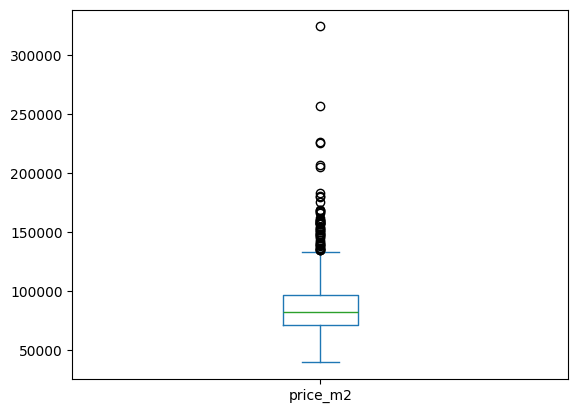

In [82]:
data[data['cat_locality'] == 'города в СПб']['price_m2'].plot(y='price_m2', kind='box')

In [83]:
data[data['cat_locality'] == 'города в СПб']['price_m2'].describe()

count     2486.00
mean     85246.38
std      20649.80
min      39205.96
25%      71254.24
50%      82078.21
75%      96099.66
max     323943.66
Name: price_m2, dtype: float64

In [84]:
data[data['cat_locality'] == 'города в СПб'].sort_values(by='price_m2').tail(10)

total_images  last_price  total_area first_day_exposition  rooms  \
2454             12 28000000.00      160.00           2016-10-24      3   
15975            20 21700000.00      121.00           2018-03-15      3   
777              16 18000000.00      100.00           2015-12-09      3   
15582            20 16990000.00       93.00           2017-11-08      3   
19852            13 24800000.00      121.30           2017-06-16      2   
14900            20 25900000.00      125.60           2018-08-14      2   
14185            10 17212500.00       76.50           2015-09-03      2   
543              11 12790000.00       56.60           2018-11-06      2   
2414             20 29500000.00      115.00           2017-07-21      3   
15037             9 23000000.00       71.00           2017-05-15      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
2454             3.00          2.00        92.00      2          NaN   False   
15975            2.75          7.00          NaN      6          NaN   False   
777              3.00          3.00        50.80      2          NaN   False   
15582            3.10          4.00        49.00      3          NaN   False   
19852            3.95          4.00        75.00      4          NaN   False   
14900            4.00          4.00        42.70      4          NaN   False   
14185             NaN          4.00        30.20      2          NaN   False   
543              3.50          3.00        29.40      1         True   False   
2414             3.00          2.00        69.75      2          NaN   False   
15037            3.30          4.00        31.00      2        False   False   

       open_plan  kitchen_area  balcony   locality_name  airports_nearest  \
2454       False         30.00     4.00  посёлок Репино          61484.00   
15975      False           NaN      NaN      Сестрорецк          57413.00   
777        False         14.00     0.00      Сестрорецк          57815.00   
15582      False         14.00     2.00      Сестрорецк          58290.00   
19852      False         23.00      NaN          Пушкин          13520.00   
14900      False         62.50     2.00          Пушкин          13426.00   
14185      False         23.90      NaN     Зеленогорск          70016.00   
543        False           NaN      NaN        Петергоф          35248.00   
2414       False         19.20     4.00          Пушкин          14456.00   
15037      False         24.50     2.00     Зеленогорск          70016.00   

       city_centers_nearest  parks_around3000  parks_nearest  \
2454               42583.00              0.00            NaN   
15975              34342.00              3.00         170.00   
777                34745.00              2.00         265.00   
15582              35219.00              2.00         633.00   
19852              25674.00              0.00            NaN   
14900              25580.00              0.00            NaN   
14185              51115.00              0.00            NaN   
543                30437.00              3.00          53.00   
2414               26609.00              3.00         229.00   
15037              51115.00              0.00            NaN   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  \
2454               0.00            NaN              NaN              репино   
15975              3.00         342.00            90.00          сестрорецк   
777                1.00         651.00           215.00          сестрорецк   
15582              1.00         320.00            30.00          сестрорецк   
19852              0.00            NaN           467.00              пушкин   
14900              0.00            NaN           194.00              пушкин   
14185              0.00            NaN              NaN         зеленогорск   
543                3.00          22.00              NaN            петергоф   
2414               3.00         172.

В этом случае также выбросы имеют большую площадь и судя по локациям также являются элитным жильем

In [85]:
data[data['cat_locality'] == 'города в СПб'].sort_values(by='price_m2').head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
2462             18  7900000.00      201.50           2018-08-17      7   
13181             8  4250000.00      100.00           2016-04-14      3   
11185             5  2800000.00       65.00           2019-02-13      3   
11087             3 14000000.00      320.00           2017-09-27      6   
19530             9  3500000.00       77.30           2016-10-20      4   
12637             6  4000000.00       87.00           2018-08-09      3   
22071            13  2500000.00       53.60           2017-11-10      2   
14428             7  1799000.00       37.90           2018-02-01      1   
947               1  3439200.00       72.10           2019-02-28      3   
18366             1  2870000.00       60.00           2018-02-01      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
2462              NaN          2.00          NaN      2          NaN   False   
13181            2.80          3.00        37.00      2          NaN   False   
11185             NaN          5.00        45.00      2          NaN   False   
11087             NaN          3.00       190.00      3          NaN   False   
19530             NaN          5.00        50.80      2          NaN   False   
12637            3.50          3.00        42.00      1          NaN   False   
22071             NaN          9.00        33.90      8          NaN   False   
14428            2.70          3.00        20.30      2          NaN   False   
947              2.60          5.00        40.30      1          NaN   False   
18366             NaN         26.00        32.00      7          NaN   False   

       open_plan  kitchen_area  balcony         locality_name  \
2462       False           NaN      NaN     посёлок Парголово   
13181      False         17.00     0.00          Красное Село   
11185      False          7.00     1.00          Красное Село   
11087      False         28.00     0.00          Красное Село   
19530      False          5.10     0.00          Красное Село   
12637      False          9.00      NaN  посёлок Металлострой   
22071      False           NaN      NaN             Кронштадт   
14428      False          5.50     1.00          Красное Село   
947        False           NaN      NaN        посёлок Шушары   
18366      False         10.00      NaN        посёлок Шушары   

       airports_nearest  city_centers_nearest  parks_around3000  \
2462           54990.00              20665.00              0.00   
13181          26016.00              29440.00              0.00   
11185          29062.00              32487.00              0.00   
11087          26020.00              29445.00              1.00   
19530          28986.00              32411.00              0.00   
12637          25928.00              27640.00              0.00   
22071          65546.00              47272.00              0.00   
14428          38010.00              41435.00              0.00   
947            18207.00              30899.00              0.00   
18366          12430.00              18217.00              0.00   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
2462             NaN              0.00            NaN            35.00   
13181            NaN              0.00            NaN           203.00   
11185            NaN              0.00            NaN              NaN   
11087         569.00              0.00            NaN             8.00   
19530            NaN              0.00            NaN           284.00   
12637            NaN              0.00            NaN             7.00   
22071            NaN              0.00            NaN            74.00   
14428            NaN              0.00            NaN           135.00   
947              NaN              0.00            NaN              NaN   
18366            NaN              0.00            NaN           100.00   

      locality_name_short  cat_

Здесь минимальную границу для проверки определяем также как и в случае категории "Центр СПб", как 25% квантиль:

In [86]:
min_price_spb_cities = data[(data['cat_locality'] == 'города в СПб')]['price_m2'].quantile(q=0.25)
min_price_spb_cities

71254.24208144797

In [87]:
max_price_spb_cities = maxi(['города в СПб'], 'price_m2')
max_price_spb_cities

133367.7898987202

In [88]:
med_price_spb_cities = median_near_price('города в СПб', min_price_spb_cities, max_price_spb_cities)
med_price_spb_cities

last_price  price_m2  \
airports_nearest city_centers_nearest floors_total                         
9294.00          24148.00             4.00          2830000.00  74083.77   
9393.00          24247.00             4.00          3550000.00  91025.64   
9847.00          24701.00             4.00          4319000.00  97759.17   
9914.00          24768.00             5.00          6990000.00 104797.60   
9921.00          24775.00             5.00          4342000.00 100976.74   
...                                                        ...       ...   
73827.00         54926.00             3.00          8400000.00 100000.00   
75646.00         56745.00             3.00          3015000.00  96634.62   
78527.00         59626.00             3.00          2300000.00  74193.55   
84006.00         65105.00             4.00          3300000.00  75862.07   
84869.00         65968.00             5.00          4200000.00  81712.06   

                                                    total_area  count  
airports_nearest city_centers_nearest floors_total                     
9294.00          24148.00             4.00               38.20      1  
9393.00          24247.00             4.00               39.00      1  
9847.00          24701.00             4.00               44.18      1  
9914.00          24768.00             5.00               66.70      1  
9921.00          24775.00             5.00               43.00      1  
...                                                        ...    ...  
73827.00         54926.00             3.00               84.00      1  
75646.00         56745.00             3.00               31.20      1  
78527.00         59626.00             3.00               31.00      1  
84006.00         65105.00             4.00               43.50      1  
84869.00         65968.00             5.00               51.40      1  

[1247 rows x 4 columns]

In [89]:
compare_price_spb_cities_max = data.query(
    'price_m2 < @min_price_spb_cities and cat_locality == "города в СПб"'
).join(
    med_price_spb_cities, on=['airports_nearest', 'city_centers_nearest', 'floors_total'], rsuffix='_median'
)[['last_price', 'last_price_median', 'total_area', 'total_area_median','price_m2', 'price_m2_median', 'count']].sort_values('price_m2')
compare_price_spb_cities_max.sort_values('price_m2', ascending=False).head(10)

last_price  last_price_median  total_area  total_area_median  price_m2  \
14509  5700000.00         3990000.00       80.00              41.00  71250.00   
8819   5700000.00         5200000.00       80.00              61.00  71250.00   
933    5500000.00                NaN       77.20                NaN  71243.52   
23186  2350000.00                NaN       33.00                NaN  71212.12   
19318  2250000.00                NaN       31.60                NaN  71202.53   
10189  4450000.00                NaN       62.50                NaN  71200.00   
5220   5500000.00                NaN       77.30                NaN  71151.36   
5340   3600000.00                NaN       50.60                NaN  71146.25   
57     3200000.00         3900000.00       45.00              51.60  71111.11   
22786  3200000.00         4025000.00       45.00              45.00  71111.11   

       price_m2_median  count  
14509         97317.07   1.00  
8819          80000.00   3.00  
933                NaN    NaN  
23186              NaN    NaN  
19318              NaN    NaN  
10189              NaN    NaN  
5220               NaN    NaN  
5340               NaN    NaN  
57            75581.40   1.00  
22786         89444.44   2.00

Здесь цены объектов близки к ценам объектов расположенных рядом

##### Категория "Агломерация"

<Axes: >

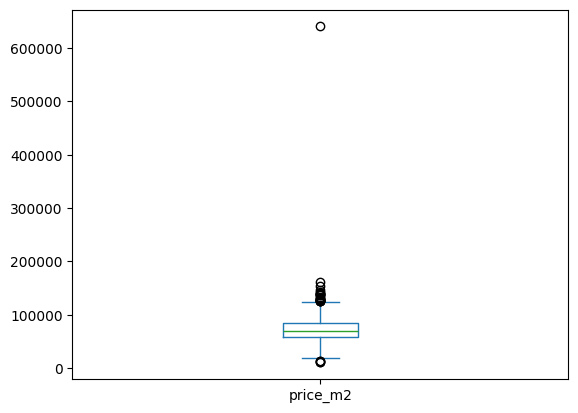

In [90]:
data[data['cat_locality'] == 'Агломерация']['price_m2'].plot(y='price_m2', kind='box')

In [91]:
data[data['cat_locality'] == 'Агломерация'].sort_values(by='price_m2').tail(10)

total_images  last_price  total_area first_day_exposition  rooms  \
12640            20 10300000.00       75.50           2019-03-21      2   
8202              5  4700000.00       34.00           2018-10-25      1   
5019             19  4490000.00       32.40           2018-09-19      1   
10604            20 10898000.00       78.30           2019-04-20      3   
20030             6  5500000.00       39.00           2015-05-20      1   
10151            26 10000000.00       70.00           2017-11-09      2   
6641             20 13900000.00       95.00           2019-03-11      4   
14881            13  7500000.00       49.00           2018-02-01      2   
21646            20 12800000.00       79.80           2019-03-23      3   
21238             1 24412900.00       38.12           2018-06-27      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
12640            3.00          2.00        42.50      2          NaN   False   
8202             2.80         18.00        16.00      6          NaN   False   
5019             2.85         23.00        10.00     20          NaN   False   
10604            2.75         18.00        53.00     15          NaN   False   
20030             NaN         24.00        18.00      4          NaN   False   
10151             NaN         20.00        47.00     12          NaN   False   
6641             2.65          3.00        68.00      2          NaN   False   
14881             NaN          4.00          NaN      4          NaN   False   
21646            2.80         14.00        43.00      2          NaN   False   
21238             NaN         10.00        16.83      4        False   False   

       open_plan  kitchen_area  balcony      locality_name  airports_nearest  \
12640      False         13.20      NaN         Всеволожск               NaN   
8202       False         11.00     2.00            Кудрово               NaN   
5019       False         12.00     2.00     посёлок Мурино          51553.00   
10604      False          5.50     3.00            Кудрово               NaN   
20030      False         12.00     0.00    деревня Кудрово               NaN   
10151      False         12.00     2.00    деревня Кудрово               NaN   
6641       False         14.50      NaN            Гатчина               NaN   
14881      False           NaN      NaN  деревня Мистолово               NaN   
21646      False         12.00     2.00            Кудрово               NaN   
21238      False         10.70     1.00         Всеволожск               NaN   

       city_centers_nearest  parks_around3000  parks_nearest  \
12640                   NaN               NaN            NaN   
8202                    NaN               NaN            NaN   
5019               21888.00               NaN            NaN   
10604                   NaN               NaN            NaN   
20030                   NaN               NaN            NaN   
10151                   NaN               NaN            NaN   
6641                    NaN               NaN            NaN   
14881                   NaN               NaN            NaN   
21646                   NaN               NaN            NaN   
21238                   NaN               NaN            NaN   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  \
12640               NaN            NaN              NaN          всеволожск   
8202                NaN            NaN            13.00             кудрово   
5019                NaN            NaN            12.00              мурино   
10604               NaN            NaN              NaN             кудрово   
20030               NaN            NaN           565.00             кудрово   
10151               NaN            NaN            36.00             кудрово   
6641                NaN            NaN              NaN             гатчина   
14881               NaN            NaN            60.00           мистолово   
216

В дальнейшем понадобится использовать другой метод поиска рядом находящихся объектов, так как в других категориях отсутсвуют данные о расстояниях. Используем следующие столбцы: название локации, количество этажей в здании и количество комнат

In [92]:
def median_near_price2(category, mini, maxi):
    med_table2 = data.query(
        'cat_locality == @category'
    ).query(
        '@mini < price_m2 < @maxi'
    ).pivot_table(
        index=['locality_name_short', 'rooms', 'floors_total'],
        values=['price_m2', 'last_price', 'total_area'], aggfunc=['median', 'count']
    )
    med_table2.columns = ['last_price', 'price_m2', 'total_area', 'count', 1, 0]
    med_table2 = med_table2[['last_price', 'price_m2', 'total_area', 'count']]
    return med_table2

In [93]:
min_price_agglomeration = mini(['Агломерация'], 'price_m2')
min_price_agglomeration

18021.902300658134

In [94]:
max_price_agglomeration = maxi(['Агломерация'], 'price_m2')
max_price_agglomeration

124399.23089245793

In [95]:
med_price_agglomeration = median_near_price2('Агломерация', min_price_agglomeration, max_price_agglomeration)
med_price_agglomeration

last_price  price_m2  total_area  \
locality_name_short rooms floors_total                                     
агалатово           1     4.00          1830000.00  57187.50       32.00   
                          5.00          2400000.00  75709.78       31.70   
                    2     5.00          4740000.00  80338.98       59.00   
                    3     4.00          5300000.00  71621.62       74.00   
аннино              1     4.00          2537830.00  70495.28       36.00   
...                                            ...       ...         ...   
янино-1             3     6.00          4500000.00  61559.51       73.10   
                          7.00          6088000.00  73023.87       83.37   
                          8.00          4550000.00  51296.51       88.70   
                          10.00         5954000.00  75472.18       78.89   
                          12.00         6036000.00  73393.33       78.89   

                                        count  
locality_name_short rooms floors_total         
агалатово           1     4.00              1  
                          5.00              1  
                    2     5.00              1  
                    3     4.00              1  
аннино              1     4.00              1  
...                                       ...  
янино-1             3     6.00              1  
                          7.00              1  
                          8.00              1  
                          10.00             1  
                          12.00             3  

[881 rows x 4 columns]

Проверяем максимальные значения:

In [96]:
compare_price_agglomeration_max = data.query(
    'price_m2 > @max_price_agglomeration and cat_locality == "Агломерация"'
).join(
    med_price_agglomeration, on=['locality_name_short', 'rooms', 'floors_total'], rsuffix='_median'
)[['last_price', 'last_price_median', 'total_area', 'total_area_median','price_m2', 'price_m2_median', 'count']].sort_values('price_m2')
compare_price_agglomeration_max.sort_values('price_m2', ascending=False).head(10)

last_price  last_price_median  total_area  total_area_median  price_m2  \
21238 24412900.00         2590000.00       38.12              40.20 640422.35   
21646 12800000.00         7750000.00       79.80              84.10 160401.00   
14881  7500000.00         4374205.00       49.00              51.35 153061.22   
6641  13900000.00                NaN       95.00                NaN 146315.79   
10151 10000000.00         5400000.00       70.00              55.50 142857.14   
20030  5500000.00         3300000.00       39.00              35.50 141025.64   
10604 10898000.00         7675000.00       78.30              87.80 139182.63   
5019   4490000.00         3400000.00       32.40              37.50 138580.25   
8202   4700000.00         3950000.00       34.00              36.90 138235.29   
12640 10300000.00         2450000.00       75.50              44.20 136423.84   

       price_m2_median  count  
21238         63207.55  19.00  
21646         92152.20   7.00  
14881         85811.95   2.00  
6641               NaN    NaN  
10151        100900.90   9.00  
20030         92976.19   8.00  
10604         87380.31   8.00  
5019          96969.70  15.00  
8202         103750.00  19.00  
12640         54444.44   9.00

У объекта 21238 при верно записанной площади, цена отличается от нормальной на порядок, исправляем. Остальные объекты не являются выбросами из находящихся рядом объектов.

In [97]:
data.loc[21238, 'last_price'] = data.loc[21238, 'last_price'] / 10
data.loc[21238, 'last_price']

2441290.0

Проверяем минимальные значения:

In [98]:
data[data['cat_locality'] == 'Агломерация'].sort_values(by='price_m2').head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
23477             3  1450000.00      138.00           2018-07-06      3   
9471              4   850000.00       78.00           2017-05-04      3   
22176             9   850000.00       66.80           2018-11-13      3   
14904             3   500000.00       38.00           2018-02-08      1   
13060            16  1050000.00       58.00           2017-11-28      2   
23067             8   600000.00       31.80           2019-04-24      1   
606               5   790000.00       38.60           2018-04-03      2   
2216             13   700000.00       30.50           2019-01-03      1   
17595             6  1300000.00       54.33           2017-09-13      2   
21174             4   900000.00       36.60           2019-04-02      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
23477             NaN          2.00        58.00      2          NaN   False   
9471              NaN          9.00        12.50      7          NaN   False   
22176             NaN          5.00        57.40      2          NaN   False   
14904             NaN          3.00          NaN      3          NaN   False   
13060            2.60          9.00        34.00      5          NaN   False   
23067             NaN          2.00        20.00      1          NaN   False   
606              3.00          2.00        24.00      1          NaN   False   
2216             2.55          2.00        18.10      1          NaN   False   
17595             NaN          6.00        28.00      6          NaN   False   
21174             NaN          2.00        23.30      1          NaN   False   

       open_plan  kitchen_area  balcony                      locality_name  \
23477      False         12.00      NaN                            Гатчина   
9471       False          8.50     0.00                            Гатчина   
22176      False          9.00     2.00            деревня Малая Романовка   
14904      False           NaN      NaN                        деревня Бор   
13060      False         10.00     2.00                            Гатчина   
23067      False          7.00      NaN                    деревня Коркино   
606        False          6.00      NaN   поселок городского типа Синявино   
2216       False          5.10      NaN                    деревня Коркино   
17595      False         10.40     0.00                    посёлок Щеглово   
21174      False          5.40      NaN  посёлок городского типа Форносово   

       airports_nearest  city_centers_nearest  parks_around3000  \
23477               NaN                   NaN               NaN   
9471                NaN                   NaN               NaN   
22176               NaN                   NaN               NaN   
14904               NaN                   NaN               NaN   
13060               NaN                   NaN               NaN   
23067               NaN                   NaN               NaN   
606                 NaN                   NaN               NaN   
2216                NaN                   NaN               NaN   
17595          61908.00              34085.00               NaN   
21174               NaN                   NaN               NaN   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
23477            NaN               NaN            NaN            52.00   
9471             NaN               NaN            NaN           169.00   
22176            NaN               NaN            NaN             9.00   
14904            NaN               NaN            NaN            44.00   
13060            NaN               NaN            NaN            23.00   
23067            NaN               NaN            NaN              NaN   
606              NaN               NaN            NaN           374.00   
2216             NaN               NaN            NaN              NaN   
17595            NaN               Na

In [99]:
compare_price_agglomeration_min = data.query(
    'price_m2 < @min_price_agglomeration and cat_locality == "Агломерация"'
).join(
    med_price_agglomeration, on=['locality_name_short', 'rooms', 'floors_total'], rsuffix='_median'
)[['last_price', 'last_price_median', 'total_area', 'total_area_median','price_m2', 'price_m2_median', 'count']].sort_values('price_m2')
compare_price_agglomeration_min.sort_values('price_m2', ascending=False).head(10)

last_price  last_price_median  total_area  total_area_median  price_m2  \
14904   500000.00                NaN       38.00                NaN  13157.89   
22176   850000.00                NaN       66.80                NaN  12724.55   
9471    850000.00         4500000.00       78.00              73.00  10897.44   
23477  1450000.00         4600000.00      138.00              72.00  10507.25   

       price_m2_median  count  
14904              NaN    NaN  
22176              NaN    NaN  
9471          61224.49   9.00  
23477         63888.89   1.00

У объекта 23477 неверно записана площадь, так как жилая площадь и площадь кухни не соответствуют общей. У объекта 9471 выброс и цены и площади, удаляем его. По двум другим объектам проверим рядом находящиеся объекты по геолокации

In [100]:
data.loc[23477, 'total_area'] = compare_price_agglomeration_min.loc[23477, 'total_area_median']
data.loc[23477, 'total_area']

72.0

In [101]:
data = data.drop(9471)

In [102]:
data[data['locality_name_short'] == 'малая романовка']

total_images  last_price  total_area first_day_exposition  rooms  \
22176             9   850000.00       66.80           2018-11-13      3   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
22176             NaN          5.00        57.40      2          NaN   False   

       open_plan  kitchen_area  balcony            locality_name  \
22176      False          9.00     2.00  деревня Малая Романовка   

       airports_nearest  city_centers_nearest  parks_around3000  \
22176               NaN                   NaN               NaN   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
22176            NaN               NaN            NaN             9.00   

      locality_name_short cat_locality  price_m2  year  month  day_of_week  
22176     малая романовка  Агломерация  12724.55  2018     11            1

In [103]:
data[data['locality_name_short'] == 'бор']

total_images  last_price  total_area first_day_exposition  rooms  \
11800             1 20295200.00      192.30           2018-02-13      6   
14904             3   500000.00       38.00           2018-02-08      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
11800            2.95          2.00       147.20      1        False   False   
14904             NaN          3.00          NaN      3          NaN   False   

       open_plan  kitchen_area  balcony locality_name  airports_nearest  \
11800      False         17.80      NaN   деревня Бор               NaN   
14904      False           NaN      NaN   деревня Бор               NaN   

       city_centers_nearest  parks_around3000  parks_nearest  \
11800                   NaN               NaN            NaN   
14904                   NaN               NaN            NaN   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  \
11800               NaN            NaN           162.00                 бор   
14904               NaN            NaN            44.00                 бор   

      cat_locality  price_m2  year  month  day_of_week  
11800  Агломерация 105539.26  2018      2            1  
14904  Агломерация  13157.89  2018      2            3

Оставляем оба объекта так как в первой локации нет объектов для сравнения, остальные данные заполнены и актуальны, во втором случае объект в той же локации имеет большую площадь и цену, сравнение с ним не актуально

##### Категория Райцентр ЛО

<Axes: >

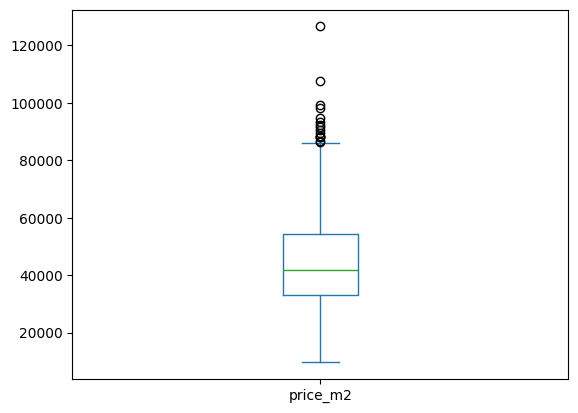

In [104]:
data[data['cat_locality'] == 'Райцентр ЛО']['price_m2'].plot(y='price_m2', kind='box')

In [105]:
data[data['cat_locality'] == 'Райцентр ЛО'].sort_values(by='price_m2').tail(10)

total_images  last_price  total_area first_day_exposition  rooms  \
10268            20  3200000.00       35.70           2019-01-25      1   
409               5  6600000.00       73.00           2017-08-15      3   
6942             15  3300000.00       36.00           2019-03-26      1   
15591            20  4300000.00       46.60           2018-12-29      2   
19561             6  2050000.00       22.00           2017-07-11      1   
18733            11  3650000.00       38.50           2018-05-22      1   
6496             19  3600000.00       36.60           2018-02-20      1   
2145             20  3800000.00       38.30           2018-11-13      1   
3894             11 19990000.00      186.00           2018-02-27      4   
12040             5  1900000.00       15.00           2018-06-27      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
10268            2.70         18.00        16.00      6          NaN   False   
409               NaN         18.00        45.00      5          NaN   False   
6942             2.50          9.00        18.00      6          NaN   False   
15591             NaN         12.00          NaN     10          NaN   False   
19561             NaN          7.00          NaN      1          NaN   False   
18733            3.50          6.00        19.00      2          NaN   False   
6496             2.66         16.00        18.10      8          NaN   False   
2145              NaN          5.00        18.00      3          NaN   False   
3894             2.80          9.00       111.00      7          NaN   False   
12040            2.50          5.00          NaN      1          NaN   False   

       open_plan  kitchen_area  balcony locality_name  airports_nearest  \
10268      False         11.50      NaN  Сосновый Бор               NaN   
409        False         12.00     5.00  Сосновый Бор               NaN   
6942       False         10.00     2.00  Сосновый Бор               NaN   
15591      False           NaN      NaN  Сосновый Бор               NaN   
19561      False           NaN     0.00        Выборг               NaN   
18733      False          9.00      NaN        Выборг               NaN   
6496       False         11.00     2.00  Сосновый Бор               NaN   
2145       False         11.00      NaN  Сосновый Бор               NaN   
3894       False         32.00      NaN        Выборг               NaN   
12040      False           NaN      NaN  Сосновый Бор               NaN   

       city_centers_nearest  parks_around3000  parks_nearest  \
10268                   NaN               NaN            NaN   
409                     NaN               NaN            NaN   
6942                    NaN               NaN            NaN   
15591                   NaN               NaN            NaN   
19561                   NaN               NaN            NaN   
18733                   NaN               NaN            NaN   
6496                    NaN               NaN            NaN   
2145                    NaN               NaN            NaN   
3894                    NaN               NaN            NaN   
12040                   NaN               NaN            NaN   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  \
10268               NaN            NaN            80.00        сосновый бор   
409                 NaN            NaN            10.00        сосновый бор   
6942                NaN            NaN              NaN        сосновый бор   
15591               NaN            NaN            34.00        сосновый бор   
19561               NaN            NaN            45.00              выборг   
18733               NaN            NaN              NaN              выборг   
6496                NaN            NaN            45.00        сосновый бор   
2145                NaN            NaN           113.00        сосновый бор   
3894                NaN            NaN              NaN   

In [106]:
min_price_raicenter = mini(['Райцентр ЛО'], 'price_m2')
min_price_raicenter

1042.9331306990825

За минимум принимаем 25% квантиль

In [107]:
min_price_raicenter = data[(data['cat_locality'] == 'Райцентр ЛО')]['price_m2'].quantile(q=0.25)
min_price_raicenter

32984.04255319149

In [108]:
max_price_raicenter = maxi(['Райцентр ЛО'], 'price_m2')
max_price_raicenter

86219.22492401216

In [109]:
med_price_raicenter = median_near_price2('Райцентр ЛО', min_price_raicenter, max_price_raicenter)
med_price_raicenter

last_price  price_m2  total_area  \
locality_name_short rooms floors_total                                     
волосово            1     4.00          1440000.00  44405.39       32.25   
                          5.00          1650000.00  45833.33       36.00   
                    2     3.00          2250000.00  38527.40       58.40   
                          4.00          1950000.00  40309.65       48.30   
                          5.00          2000000.00  44198.90       53.00   
...                                            ...       ...         ...   
тихвин              2     9.00          1950000.00  39959.71       48.05   
                          10.00         2550000.00  42749.37       59.65   
                    3     5.00          2650000.00  44374.01       63.10   
                          9.00          2400000.00  36261.98       65.00   
                          10.00         2700000.00  40059.35       67.40   

                                        count  
locality_name_short rooms floors_total         
волосово            1     4.00              2  
                          5.00              9  
                    2     3.00              1  
                          4.00              4  
                          5.00              9  
...                                       ...  
тихвин              2     9.00             12  
                          10.00             1  
                    3     5.00              5  
                          9.00              7  
                          10.00             1  

[154 rows x 4 columns]

Проверяем максимальные значения

In [110]:
compare_price_raicenter_max = data.query(
    'price_m2 > @max_price_raicenter and cat_locality == "Райцентр ЛО"'
).join(
    med_price_raicenter, on=['locality_name_short', 'rooms', 'floors_total'], rsuffix='_median'
)[['last_price', 'last_price_median', 'total_area', 'total_area_median','price_m2', 'price_m2_median', 'count']].sort_values('price_m2')
compare_price_raicenter_max.sort_values('price_m2', ascending=False).head(10)

last_price  last_price_median  total_area  total_area_median  price_m2  \
12040  1900000.00         2625000.00       15.00              32.25 126666.67   
3894  19990000.00         4299500.00      186.00              80.95 107473.12   
2145   3800000.00         2625000.00       38.30              32.25  99216.71   
6496   3600000.00                NaN       36.60                NaN  98360.66   
18733  3650000.00         2625000.00       38.50              39.25  94805.19   
19561  2050000.00         2500000.00       22.00              34.00  93181.82   
15591  4300000.00         3295000.00       46.60              47.80  92274.68   
6942   3300000.00         2550000.00       36.00              35.50  91666.67   
409    6600000.00                NaN       73.00                NaN  90410.96   
10268  3200000.00                NaN       35.70                NaN  89635.85   

       price_m2_median  count  
12040         81534.09   6.00  
3894          53312.64   4.00  
2145          81534.09   6.00  
6496               NaN    NaN  
18733         60332.98   4.00  
19561         74913.63   2.00  
15591         68805.19   2.00  
6942          73785.16  12.00  
409                NaN    NaN  
10268              NaN    NaN

У объекта 12040 большое отклонение и по цене и по площади, при этом не все другие данные актуализированы, удаляем его. Остальные объекты не имеют больших выбросов относительно рядом находящихся объектов

In [111]:
data = data.drop(12040)

Проверяем минимальные значения

In [112]:
compare_price_raicenter_min = data.query(
    'price_m2 < @min_price_raicenter and cat_locality == "Райцентр ЛО"'
).join(
    med_price_raicenter, on=['locality_name_short', 'rooms', 'floors_total'], rsuffix='_median'
)[['last_price', 'last_price_median', 'total_area', 'total_area_median','price_m2', 'price_m2_median', 'count']].sort_values('price_m2')
compare_price_raicenter_min.sort_values('price_m2', ascending=False).head(10)

last_price  last_price_median  total_area  total_area_median  price_m2  \
7785   1550000.00         1835000.00       47.00              47.00  32978.72   
16073  1450000.00         2075000.00       44.00              49.95  32954.55   
23073  1450000.00         1824950.00       44.00              51.70  32954.55   
16286  1400000.00         1900000.00       42.50              54.00  32941.18   
16864  1050000.00         1250000.00       31.90              32.00  32915.36   
16639  1570000.00         1835000.00       47.70              47.00  32914.05   
6306   1870000.00         2650000.00       57.00              62.00  32807.02   
7967   1900000.00         2650000.00       58.00              62.00  32758.62   
14261  1400000.00                NaN       42.80                NaN  32710.28   
12641  1350000.00         1835000.00       41.30              47.00  32687.65   

       price_m2_median  count  
7785          38860.40  24.00  
16073         40157.93  20.00  
23073         35368.14   4.00  
16286         35828.03   5.00  
16864         37500.00  19.00  
16639         38860.40  24.00  
6306          40410.96  17.00  
7967          40410.96  17.00  
14261              NaN    NaN  
12641         38860.40  24.00

Выбросов не наблюдается

##### Категория Ленинградская область

<Axes: >

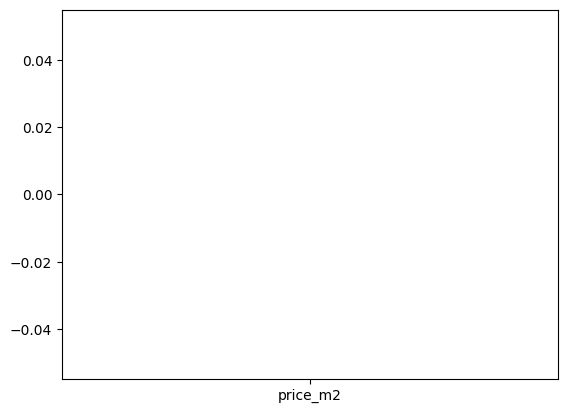

In [113]:
data[data['cat_locality'] == 'ЛО']['price_m2'].plot(y='price_m2', kind='box')

В этой категории сильных выбросов не наблюдается

#### Обработка столбца rooms

Статистические данные столбца

In [114]:
data['rooms'].describe()

count   23682.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

Сгруппируем по количеству комнат, и посчитаем количество объектов с каждым значением

In [115]:
data.groupby('rooms')['rooms'].count()

rooms
0      197
1     8043
2     7936
3     5807
4     1179
5      325
6      105
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

Необходимо проверить объекты с нулевым количеством комнат. Также можно проверить правильность данных используя среднюю площадь комнат на каждом объекте

In [116]:
data[data['rooms'] == 0]

total_images  last_price  total_area first_day_exposition  rooms  \
144               1  2450000.00       27.00           2017-03-30      0   
349               4  2320000.00       25.00           2017-09-27      0   
440               8  2480000.00       27.11           2018-03-12      0   
508               0  3375000.00       34.40           2017-03-28      0   
608               2  1850000.00       25.00           2019-02-20      0   
...             ...         ...         ...                  ...    ...   
23210             7  3200000.00       26.00           2017-09-01      0   
23442             0  2500000.00       27.70           2017-09-28      0   
23554            15  3350000.00       26.00           2018-09-07      0   
23592            10  1450000.00       29.00           2017-11-11      0   
23637             8  2350000.00       26.00           2018-06-26      0   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
144               NaN         24.00        15.50      2          NaN    True   
349               NaN         14.00        17.00      1          NaN   False   
440               NaN         17.00        24.75      4          NaN    True   
508               NaN         26.00        24.30     19          NaN   False   
608               NaN         10.00          NaN      7          NaN    True   
...               ...           ...          ...    ...          ...     ...   
23210             NaN         25.00        18.00     16          NaN    True   
23442             NaN         24.00        18.00      4          NaN   False   
23554             NaN         19.00          NaN      8          NaN    True   
23592             NaN          9.00        18.00      8          NaN   False   
23637             NaN         25.00        17.00      4          NaN    True   

       open_plan  kitchen_area  balcony      locality_name  airports_nearest  \
144        False           NaN     2.00     посёлок Мурино          51553.00   
349         True           NaN     0.00    деревня Кудрово               NaN   
440        False           NaN     2.00    Санкт-Петербург          38171.00   
508         True           NaN     1.00  посёлок Парголово          53115.00   
608        False           NaN      NaN     посёлок Шушары          16061.46   
...          ...           ...      ...                ...               ...   
23210      False           NaN     0.00    Санкт-Петербург          11405.00   
23442       True           NaN     2.00     посёлок Мурино          51553.00   
23554      False           NaN      NaN    Санкт-Петербург          18090.00   
23592       True           NaN     2.00         Никольское               NaN   
23637      False           NaN     2.00      посёлок Бугры               NaN   

       city_centers_nearest  parks_around3000  parks_nearest  \
144                21888.00               NaN            NaN   
349                     NaN               NaN            NaN   
440                15015.00              0.00            NaN   
508                19292.00              0.00            NaN   
608                24243.39               NaN            NaN   
...                     ...               ...            ...   
23210              13222.00              0.00            NaN   
23442              21888.00               NaN            NaN   
23554              17092.00              0.00            NaN   
23592                   NaN               NaN            NaN   
23637                   NaN               NaN            NaN   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  \
144                 NaN            NaN           181.00              мурино   
349                 NaN            NaN            45.00             кудрово   
440                2.00         982.00            64.00     санкт-петербург   
508                1.00         593.00           430.00           парголово   
608                 

У объектов с нулевым количеством комнат либо свободная планировка, либо они являются студиями. Проверяем:

In [117]:
data[data['studio']|data['open_plan']]['rooms'].count()

216

In [118]:
data[(data['rooms'] == 0)&(data['studio']|data['open_plan'])]['rooms'].count()

197

Предположение верно, но есть объекты-студии или со свободной планировкой у которых количество комнат ненулевое. Проверим эти объекты:

In [119]:
data[(data['rooms'] != 0)&(data['studio'])]

total_images  last_price  total_area first_day_exposition  rooms  \
2389              5  2250000.00       25.41           2016-06-07      1   
3187             13  3800000.00       27.00           2016-05-17      1   
4180              4  4500000.00       34.00           2016-04-25      1   
8683             10  3500000.00       32.50           2016-05-05      1   
11026             1  2800000.00       28.00           2016-05-04      1   
12935            10  2200000.00       31.00           2016-05-15      1   
15142             2  2700000.00       30.00           2016-05-10      1   
18732             4  2400000.00       22.00           2016-05-06      1   
20086             0  1550000.00       22.00           2016-05-11      1   
21702             9  2349000.00       23.40           2016-05-19      1   
22652             5  2650000.00       26.00           2015-06-24      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
2389              NaN         12.00        17.08      8        False    True   
3187              NaN         14.00        18.00      8        False    True   
4180             2.80         10.00        21.00     10        False    True   
8683             3.00         23.00        29.90     11        False    True   
11026             NaN         26.00        19.00      6        False    True   
12935            2.50          8.00        22.30      5        False    True   
15142             NaN         21.00        26.00      6        False    True   
18732             NaN         10.00        15.00      6          NaN    True   
20086            2.70         15.00        10.94     14        False    True   
21702            2.70         20.00        16.00      8        False    True   
22652             NaN         14.00        15.00     11        False    True   

       open_plan  kitchen_area  balcony            locality_name  \
2389       False           NaN     2.00          Санкт-Петербург   
3187       False           NaN     2.00          Санкт-Петербург   
4180       False           NaN     2.00          Санкт-Петербург   
8683       False           NaN     2.00          Санкт-Петербург   
11026      False           NaN     2.00        посёлок Парголово   
12935      False           NaN     1.00               Никольское   
15142      False           NaN     0.00          деревня Кудрово   
18732      False           NaN     0.00          деревня Кудрово   
20086      False           NaN     2.00               Никольское   
21702      False           NaN     1.00  деревня Новое Девяткино   
22652      False           NaN     0.00           поселок Мурино   

       airports_nearest  city_centers_nearest  parks_around3000  \
2389           14125.00              12921.00              2.00   
3187           50348.00              16053.00              0.00   
4180           23609.00               5299.00              0.00   
8683           34967.00              14640.00              0.00   
11026          53511.00              19687.00              0.00   
12935               NaN                   NaN               NaN   
15142               NaN                   NaN               NaN   
18732               NaN                   NaN               NaN   
20086               NaN                   NaN               NaN   
21702               NaN                   NaN               NaN   
22652          51553.00              21888.00               NaN   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
2389          328.00              2.00         485.00            26.00   
3187             NaN              0.00            NaN            45.00   
4180             NaN              1.00         433.00            62.00   
8683             NaN              1.00         564.00            45.00   
11026            NaN              0.00            NaN            45.00   
12935            NaN               NaN            NaN            44.00   
15142

Для унификации поменяем у этих объектов количество комнат на 0

In [120]:
data.loc[(data['rooms'] != 0)&(data['studio']),['rooms']] = 0

In [121]:
data[(data['rooms'] != 0)&(data['open_plan'])]

total_images  last_price  total_area first_day_exposition  rooms  \
1379              3  6000000.00       44.20           2015-11-10      1   
5668              9  3550000.00       36.70           2016-04-25      1   
8861             13  5500000.00       64.50           2015-11-13      3   
9063              6  3800000.00       39.00           2016-05-19      1   
12760             0  3350000.00       51.00           2015-01-22      2   
14017            13  3990000.00       59.00           2016-03-29      3   
17783             3 48763000.00      157.00           2016-04-01      5   
19796             1 12000000.00       97.20           2016-04-05      4   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
1379              NaN         25.00        17.40     23        False   False   
5668             2.75         16.00        17.80      2        False   False   
8861             3.00          5.00        48.00      2        False   False   
9063              NaN         17.00        30.00      1        False   False   
12760            2.50         12.00        30.00     10          NaN   False   
14017            2.50          9.00        37.60      3        False   False   
17783             NaN         11.00          NaN      5          NaN   False   
19796            3.35          5.00        71.30      2        False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
1379        True           NaN     1.00  Санкт-Петербург          10663.00   
5668        True           NaN     2.00  деревня Кудрово               NaN   
8861        True           NaN     0.00  Санкт-Петербург          20040.00   
9063        True           NaN     0.00  Санкт-Петербург          36721.00   
12760       True           NaN     2.00         Коммунар               NaN   
14017       True           NaN     1.00          Колпино          27820.00   
17783       True           NaN     0.00  Санкт-Петербург          28399.00   
19796       True           NaN     0.00  Санкт-Петербург          24559.00   

       city_centers_nearest  parks_around3000  parks_nearest  \
1379               12738.00              0.00            NaN   
5668                    NaN               NaN            NaN   
8861                2621.00              2.00         205.00   
9063               13635.00              0.00            NaN   
12760                   NaN               NaN            NaN   
14017              33606.00              0.00            NaN   
17783               7101.00              2.00         290.00   
19796               4811.00              0.00            NaN   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  \
1379               0.00            NaN           231.00     санкт-петербург   
5668                NaN            NaN            61.00             кудрово   
8861               2.00         204.00           229.00     санкт-петербург   
9063               0.00            NaN            45.00     санкт-петербург   
12760               NaN            NaN           521.00            коммунар   
14017              1.00         705.00            81.00             колпино   
17783              3.00         221.00            90.00     санкт-петербург   
19796              0.00            NaN            89.00     санкт-петербург   

       cat_locality  price_m2  year  month  day_of_week  
1379            СПб 135746.61  2015     11            1  
5668    Агломерация  96730.25  2016      4            0  
8861      Центр СПб  85271.32  2015     11            4  
9063            СПб  97435.90  2016      5            3  
12760   Агломерация  65686.27  2015      1            3  
14017  города в СПб  67627.12  2016      3            1  
17783           СПб 310592.36  2016      4            4  
19796     Центр СПб 123456.79  2016      4            1

В этом случае оставляем данные в исходном виде

Проверяем средние площади комнат для каждого объекта:

<Axes: >

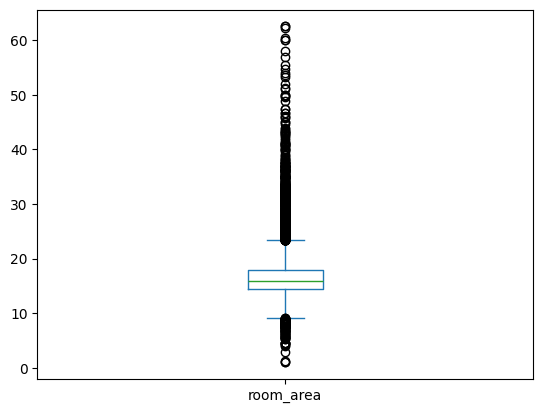

In [122]:
rooms_check = data[data['rooms'] != 0][['rooms', 'living_area']].copy()
rooms_check['room_area'] = rooms_check['living_area'] / rooms_check['rooms']
rooms_check = rooms_check.dropna()
rooms_check.plot(y='room_area', kind='box')

In [123]:
rooms_check['room_area'].sort_values().tail(10)

22494   54.80
13023   55.50
7521    56.93
10253   58.00
20389   60.00
17520   60.00
8018    60.30
6221    62.17
793     62.50
15701   62.50
Name: room_area, dtype: float64

Проверяем объекты с макимальными значениями площади комнат

In [124]:
data.loc[rooms_check['room_area'].sort_values().tail(10).index]

total_images   last_price  total_area first_day_exposition  rooms  \
22494             7  91075000.00      491.00           2017-05-27      5   
13023             8  11000000.00      127.30           2018-09-09      1   
7521             16  43500000.00      245.80           2015-12-17      3   
10253             8  13800000.00      103.40           2017-07-10      1   
20389            12   8500000.00       80.00           2016-06-07      1   
17520            12  11500000.00       95.00           2017-02-14      1   
8018             20  84000000.00      507.00           2015-12-17      5   
6221              8  34000000.00      470.30           2018-01-14      4   
793              20 135000000.00      310.00           2018-05-22      4   
15701            12  83000000.00      293.60           2017-11-10      4   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
22494            4.20          9.00       274.00      9          NaN   False   
13023            3.10          5.00        55.50      4          NaN   False   
7521             4.45          7.00       170.80      7         True   False   
10253            3.70          2.00        58.00      1          NaN   False   
20389            3.10          4.00        60.00      4        False   False   
17520            2.75         16.00        60.00     13          NaN   False   
8018             4.45          7.00       301.50      7         True   False   
6221              NaN          3.00       248.70      3          NaN   False   
793              3.30          5.00       250.00      2          NaN   False   
15701             NaN          9.00       250.00      7          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
22494      False         45.00     0.00  Санкт-Петербург          25525.00   
13023      False         14.80      NaN  Санкт-Петербург          20750.00   
7521       False         25.00     1.00  Санкт-Петербург          28046.19   
10253      False         14.00     0.00  Санкт-Петербург          24653.00   
20389      False         17.00     0.00  Санкт-Петербург          25300.00   
17520      False         12.00     5.00  Санкт-Петербург          36525.00   
8018       False         45.50     1.00  Санкт-Петербург          28046.19   
6221       False         40.00      NaN  Санкт-Петербург          43756.00   
793        False         50.00      NaN  Санкт-Петербург          34159.00   
15701      False         35.00      NaN  Санкт-Петербург          25593.00   

       city_centers_nearest  parks_around3000  parks_nearest  \
22494               5845.00              2.00         116.00   
13023               2045.00              2.00         284.00   
7521                5735.00              2.00         110.00   
10253               1501.00              0.00            NaN   
20389               5718.00              2.00         381.00   
17520              12107.00              2.00         561.00   
8018                5735.00              2.00         110.00   
6221               15459.00              1.00         852.00   
793                 7251.00              2.00         295.00   
15701               5913.00              2.00         164.00   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  \
22494              0.00            NaN           115.00     санкт-петербург   
13023              3.00         175.00             4.00     санкт-петербург   
7521               0.00            NaN          1067.00     санкт-петербург   
10253              3.00         192.00            91.00     санкт-петербург   
20389              0.00            NaN           414.00     санкт-петербург   
17520              2.00         612.00            47.00     санкт-петербург   
8018               0.00            NaN          1078.00     санкт-петербург   
6221               3.00         122.00           179.00     санкт-петербург   
793           

Большие площади комнат у больших квартир. Данные верные

In [125]:
rooms_check['room_area'].sort_values().head(10)

13915   1.00
23574   1.00
21943   1.35
3242    3.00
20994   4.00
2309    4.20
23394   4.33
8325    4.50
1326    4.50
7312    4.50
Name: room_area, dtype: float64

Проверяем объекты с минимальными значенями площадей комнат

In [126]:
data.loc[rooms_check['room_area'].sort_values().head(10).index]

total_images  last_price  total_area first_day_exposition  rooms  \
13915            20  6350000.00       52.00           2018-02-06      2   
23574            14 64990000.00      139.00           2015-11-24      3   
21943            15  6100000.00       77.60           2019-02-28      4   
3242              7  4440000.00       41.00           2017-07-02      1   
20994             7  8900000.00       50.60           2018-10-22      2   
2309             10  4200000.00       62.40           2017-06-15      2   
23394            10  1600000.00       38.00           2018-07-10      3   
8325              9  4800000.00       52.00           2017-10-25      2   
1326              8  8100000.00       52.00           2017-01-29      2   
7312              8  3400000.00       27.00           2018-02-21      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
13915            3.00          6.00         2.00      2          NaN   False   
23574            3.00          8.00         3.00      8          NaN   False   
21943            2.50          9.00         5.40      1          NaN   False   
3242              NaN         17.00         3.00     17          NaN   False   
20994            2.50          7.00         8.00      3          NaN   False   
2309             2.60          9.00         8.40      6          NaN   False   
23394            3.00          6.00        13.00      1          NaN   False   
8325              NaN          5.00         9.00      2          NaN   False   
1326             2.70         25.00         9.00     15          NaN   False   
7312             2.50         15.00         9.00      4          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
13915      False          9.00      NaN  Санкт-Петербург          32453.00   
23574      False         16.00     1.00  Санкт-Петербург          33255.00   
21943      False          9.80      NaN  Санкт-Петербург          29338.00   
3242       False         11.00      NaN  Санкт-Петербург          19272.00   
20994      False         31.00      NaN  Санкт-Петербург          12771.00   
2309       False         41.00     2.00   посёлок Шушары          23662.00   
23394      False         10.00      NaN  Санкт-Петербург          20881.00   
8325       False          6.00     1.00  Санкт-Петербург          33358.00   
1326       False         32.00     2.00  Санкт-Петербург          35555.00   
7312       False         16.00      NaN  Санкт-Петербург          50246.00   

       city_centers_nearest  parks_around3000  parks_nearest  \
13915               6521.00              0.00            NaN   
23574               5975.00              1.00         630.00   
21943              11270.00              1.00         584.00   
3242               13073.00              0.00            NaN   
20994               8301.00              1.00         173.00   
2309               29448.00              0.00            NaN   
23394               4465.00              1.00         937.00   
8325               13171.00              0.00            NaN   
1326               15561.00              0.00            NaN   
7312               16444.00              1.00         617.00   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  \
13915              1.00        1012.00            91.00     санкт-петербург   
23574              3.00         100.00           280.00     санкт-петербург   
21943              0.00            NaN            33.00     санкт-петербург   
3242               0.00            NaN           216.00     санкт-петербург   
20994              3.00         126.00              NaN     санкт-петербург   
2309               0.00            NaN           111.00              шушары   
23394              3.00         167.00             3.00     санкт-петербург   
8325               2.00         118.00           119.00     санкт-петербург   
1326               1.00  

У данных объектов неверно записаны жилые площади, устраним эти ошибки при обработке данного столбца

#### Обработка столбца ceiling_height

<Axes: >

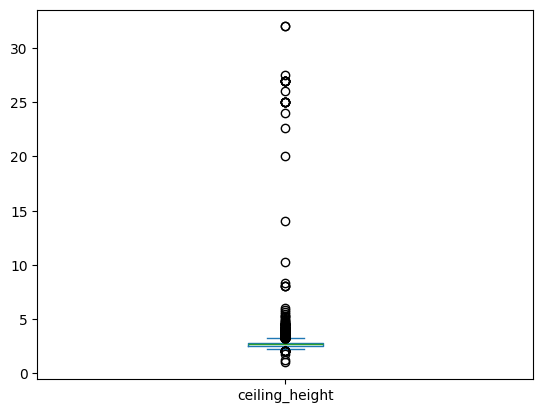

In [127]:
data.plot(y='ceiling_height', kind='box')

Проверим объекты с высотой потолков больше 5

In [128]:
data[data['ceiling_height'] > 5]

total_images   last_price  total_area first_day_exposition  rooms  \
355              17   3600000.00       55.20           2018-07-12      2   
464              15  66571000.00      280.30           2015-06-11      6   
1026             20 155000000.00      310.00           2018-10-12      5   
1388             20  59800000.00      399.00           2015-01-21      5   
3148             14   2900000.00       75.00           2018-11-12      3   
3474              3   1400000.00       30.00           2018-03-16      1   
4643              0   4300000.00       45.00           2018-02-01      2   
4876              7   3000000.00       25.00           2017-09-27      0   
5076              0   3850000.00       30.50           2018-10-03      1   
5246              0   2500000.00       54.00           2017-10-13      2   
5669              4   4400000.00       50.00           2017-08-08      2   
5807             17   8150000.00       80.00           2019-01-09      2   
5863             20   5650000.00       45.00           2018-08-15      1   
6246              6   3300000.00       44.40           2019-03-25      2   
7578             17  38000000.00      143.00           2017-11-02      3   
9379              5   3950000.00       42.00           2017-03-26      3   
10773             8   3800000.00       58.00           2017-10-13      2   
11285             0   1950000.00       37.00           2019-03-20      1   
12628            14   3900000.00       50.00           2018-03-29      1   
14382             9   1700000.00       35.00           2015-12-04      1   
15061            19   5600000.00       56.40           2018-05-11      2   
15743            14   5600000.00       67.00           2016-11-11      3   
17442             0   5350000.00       54.00           2015-06-16      2   
17496            15   6700000.00       92.90           2019-02-19      3   
17857             1   3900000.00       56.00           2017-12-22      3   
18545             6   3750000.00       43.00           2019-03-18      2   
20264            17 119000000.00      187.60           2017-07-10      4   
20478            11   8000000.00       45.00           2017-07-18      1   
20507            12   5950000.00       60.00           2018-02-19      2   
21227             0   8200000.00       71.00           2017-07-21      0   
21377            19   4900000.00       42.00           2017-04-18      1   
21824            20   2450000.00       44.00           2019-02-12      2   
22309            20   5300000.00       45.00           2017-09-30      1   
22336            19   9999000.00       92.40           2019-04-05      2   
22938            14   4000000.00       98.00           2018-03-15      4   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
355             25.00          5.00        32.00      2        False   False   
464              5.20          8.00       159.50      7          NaN   False   
1026             5.30          3.00       190.00      3          NaN   False   
1388             5.60          6.00          NaN      6          NaN   False   
3148            32.00          3.00        53.00      2          NaN   False   
3474             8.00          5.00        15.30      2        False   False   
4643            25.00          9.00        30.00      2          NaN   False   
4876            27.00         25.00        17.00     17          NaN   False   
5076            24.00          5.00        19.50      1         True   False   
5246            27.00          5.00        30.00      3          NaN   False   
5669            26.00          9.00        21.30      3          NaN   False   
5807            27.00         36.00        41.00     13          NaN   False   
5863             8.30         16.00        19.30     14          NaN   False   
6246            25.00          5.00        31.30      5          NaN   False   
7578             5.50          5.00        83.00      5          NaN  

Находим средние значения высоты потолка в зависимости от расположения объекта

In [129]:
data.pivot_table(index='cat_locality', values='ceiling_height', aggfunc='median')

ceiling_height
cat_locality                
nan                     2.55
Агломерация             2.60
Райцентр ЛО             2.50
СПб                     2.65
Центр СПб               3.10
города в СПб            2.60

В этом случае отдельно проанализируем группу Центр СПб и остальные

Отдельно будем искать рядом стоящие объекты для групп "СПб", "города в СПб", так как в этом случае нам известны расстояния до центра и аэропорта

In [130]:
def median_near_height(category, mini, maxi):
    med_height = data.query(
        'cat_locality.isin(@category)'
    ).query(
        '@mini < ceiling_height < @maxi'
    ).pivot_table(
        index=['airports_nearest', 'city_centers_nearest', 'floors_total'],
        values=['ceiling_height'], aggfunc=['median', 'count']
    )
    med_height.columns = ['ceiling_height', 'count']
    return med_height

In [131]:
min_height_spb = mini(['СПб', 'города в СПб'], 'ceiling_height')
min_height_spb

2.0949999999999998

In [132]:
max_height_spb = maxi(['СПб', 'города в СПб'], 'ceiling_height')
max_height_spb

3.175

In [133]:
med_height_spb = median_near_height(['СПб', 'города в СПб'], min_height_spb, max_height_spb)
med_height_spb

ceiling_height  count
airports_nearest city_centers_nearest floors_total                       
0.00             22801.00             9.00                    2.70      1
6914.00          21486.00             4.00                    2.50      1
6989.00          13205.00             14.00                   2.50      3
                                      25.00                   2.58      2
6992.00          17168.00             5.00                    2.50      1
...                                                            ...    ...
83758.00         64857.00             4.00                    2.50      1
84006.00         65105.00             4.00                    2.55      1
84665.00         65764.00             5.00                    2.50      1
84853.00         65952.00             5.00                    2.50      1
84869.00         65968.00             5.00                    2.55      1

[6536 rows x 2 columns]

In [134]:
compare_height_spb_max = data.query(
    'ceiling_height > @max_height_spb and cat_locality.isin(["СПб", "города в СПб"])'
).join(
    med_height_spb, on=['airports_nearest', 'city_centers_nearest', 'floors_total'], rsuffix='_median'
)[['ceiling_height', 'ceiling_height_median', 'count']].sort_values('ceiling_height')
compare_height_spb_max.query('count.isna() == False').sort_values('ceiling_height', ascending=False).head(10)

ceiling_height  ceiling_height_median  count
21377           27.50                   2.75   1.00
5807            27.00                   2.70   1.00
17496           20.00                   2.83   2.00
22309           10.30                   2.79   4.00
17442            8.00                   2.75   1.00
19142            4.70                   2.80   3.00
11128            4.20                   2.88   2.00
17979            4.00                   3.00  11.00
21857            4.00                   3.00   1.00
3773             4.00                   3.00   1.00

Объекты с высотой потолков больше 20 записаны ошибочно на один порядок. Такие значения исправляем во всех категориях

In [135]:
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] = data.loc[data['ceiling_height'] > 20, 'ceiling_height'] / 10

In [136]:
data[data['ceiling_height'] > 5].sort_values('ceiling_height')

total_images   last_price  total_area first_day_exposition  rooms  \
464              15  66571000.00      280.30           2015-06-11      6   
1026             20 155000000.00      310.00           2018-10-12      5   
12628            14   3900000.00       50.00           2018-03-29      1   
7578             17  38000000.00      143.00           2017-11-02      3   
1388             20  59800000.00      399.00           2015-01-21      5   
21227             0   8200000.00       71.00           2017-07-21      0   
20264            17 119000000.00      187.60           2017-07-10      4   
3474              3   1400000.00       30.00           2018-03-16      1   
15743            14   5600000.00       67.00           2016-11-11      3   
17442             0   5350000.00       54.00           2015-06-16      2   
5863             20   5650000.00       45.00           2018-08-15      1   
22309            20   5300000.00       45.00           2017-09-30      1   
15061            19   5600000.00       56.40           2018-05-11      2   
17496            15   6700000.00       92.90           2019-02-19      3   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
464              5.20          8.00       159.50      7          NaN   False   
1026             5.30          3.00       190.00      3          NaN   False   
12628            5.30          5.00          NaN      5          NaN   False   
7578             5.50          5.00        83.00      5          NaN   False   
1388             5.60          6.00          NaN      6          NaN   False   
21227            5.80          5.00        68.00      5          NaN    True   
20264            6.00          7.00       147.00      7          NaN   False   
3474             8.00          5.00        15.30      2        False   False   
15743            8.00         16.00        41.00      1          NaN   False   
17442            8.00          5.00        29.00      2          NaN   False   
5863             8.30         16.00        19.30     14          NaN   False   
22309           10.30         16.00        15.50     15          NaN   False   
15061           14.00         14.00        32.40      5          NaN   False   
17496           20.00         17.00        53.20     14          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
464        False         21.10     0.00  Санкт-Петербург          26316.00   
1026       False         63.00     2.00  Санкт-Петербург          24899.00   
12628      False           NaN      NaN  Санкт-Петербург          19644.00   
7578       False         29.00     1.00  Санкт-Петербург          26333.00   
1388       False           NaN     0.00  Санкт-Петербург          26204.00   
21227      False           NaN     0.00  Санкт-Петербург          20170.00   
20264      False         15.60      NaN  Санкт-Петербург          26902.00   
3474       False          7.30      NaN    деревня Нурма               NaN   
15743      False          8.00      NaN  Санкт-Петербург          32691.00   
17442      False           NaN     1.00     Красное Село          24638.00   
5863       False          8.30     1.00  Санкт-Петербург          13069.00   
22309      False           NaN      NaN  Санкт-Петербург          36353.00   
15061      False          9.10     2.00  Санкт-Петербург          14814.00   
17496      False         12.00     5.00  Санкт-Петербург          16295.00   

       city_centers_nearest  parks_around3000  parks_nearest  \
464                 6655.00              3.00         187.00   
1026                4785.00              0.00            NaN   
12628               3918.00              1.00         505.00   
7578                6448.00              3.00         479.00   
1388                6934.00              2.00         149.00   
21227               1261.00              2.00         295.00   
20264               5605.00              3.00 

Продолжаем обработку

Поместим также в таблицу данные об этажах

In [137]:
compare_height_spb_max = data.query(
    'ceiling_height > @max_height_spb and cat_locality.isin(["СПб", "города в СПб"])'
).join(
    med_height_spb, on=['airports_nearest', 'city_centers_nearest', 'floors_total'], rsuffix='_median'
)[['ceiling_height', 'ceiling_height_median', 'count', 'floor', 'floors_total']].sort_values('ceiling_height')
compare_height_spb_max.sort_values('ceiling_height', ascending=False).head(10)

ceiling_height  ceiling_height_median  count  floor  floors_total
17496           20.00                   2.83   2.00     14         17.00
15061           14.00                    NaN    NaN      5         14.00
22309           10.30                   2.79   4.00     15         16.00
5863             8.30                    NaN    NaN     14         16.00
17442            8.00                   2.75   1.00      2          5.00
15743            8.00                    NaN    NaN      1         16.00
20264            6.00                    NaN    NaN      7          7.00
1388             5.60                    NaN    NaN      6          6.00
7578             5.50                    NaN    NaN      5          5.00
464              5.20                    NaN    NaN      7          8.00

При значении высоты потолков больше 6, заменяем на медианный показатель рядом стоящих объектов, если их нет, то заменяем на медианный показатель по категории

In [138]:
data.loc[17496, 'ceiling_height'] = compare_height_spb_max.loc[17496, 'ceiling_height_median']
data.loc[17496, 'ceiling_height']

2.825

In [139]:
data.loc[22309, 'ceiling_height'] = compare_height_spb_max.loc[22309, 'ceiling_height_median']
data.loc[22309, 'ceiling_height']

2.785

In [140]:
data.loc[17442, 'ceiling_height'] = compare_height_spb_max.loc[17442, 'ceiling_height_median']
data.loc[17442, 'ceiling_height']

2.75

In [141]:
data.loc[
    (data['ceiling_height'] > 6)&
    ((data['cat_locality'] == "СПб")|
    (data['cat_locality'] == "города в СПб")),
    ['ceiling_height']
] = data.query(
    'cat_locality.isin(["СПб", "города в СПб"])'
)['ceiling_height'].median()

In [142]:
compare_height_spb_max = data.query(
    'ceiling_height > @max_height_spb and cat_locality.isin(["СПб", "города в СПб"])'
).join(
    med_height_spb, on=['airports_nearest', 'city_centers_nearest', 'floors_total'], rsuffix='_median'
)[['ceiling_height', 'ceiling_height_median', 'count', 'floor', 'floors_total']].sort_values('ceiling_height')
compare_height_spb_max.sort_values('ceiling_height', ascending=False).head(15)

ceiling_height  ceiling_height_median  count  floor  floors_total
20264            6.00                    NaN    NaN      7          7.00
1388             5.60                    NaN    NaN      6          6.00
7578             5.50                    NaN    NaN      5          5.00
464              5.20                    NaN    NaN      7          8.00
19142            4.70                   2.80   3.00     26         26.00
12401            4.65                    NaN    NaN      7          7.00
6802             4.50                    NaN    NaN      3          3.00
10159            4.50                    NaN    NaN      3          3.00
13224            4.50                    NaN    NaN      4          4.00
8018             4.45                    NaN    NaN      7          7.00
7521             4.45                    NaN    NaN      7          7.00
7274             4.40                    NaN    NaN      4          5.00
11128            4.20                   2.88   2.00      5          5.00
22494            4.20                    NaN    NaN      9          9.00
2639             4.19                    NaN    NaN      4          5.00

Оастальные объекты с выбивающимеся значениями расположены на верхних этажах зданий, где высота потолка может измениться по сравнению с высотой на других этажах

Объекты в центре СПб с высотой потолка больше 5 м:

In [143]:
data[(data['ceiling_height'] > 5)&(data['cat_locality'] == 'Центр СПб')]

total_images   last_price  total_area first_day_exposition  rooms  \
1026             20 155000000.00      310.00           2018-10-12      5   
12628            14   3900000.00       50.00           2018-03-29      1   
21227             0   8200000.00       71.00           2017-07-21      0   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
1026             5.30          3.00       190.00      3          NaN   False   
12628            5.30          5.00          NaN      5          NaN   False   
21227            5.80          5.00        68.00      5          NaN    True   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
1026       False         63.00     2.00  Санкт-Петербург          24899.00   
12628      False           NaN      NaN  Санкт-Петербург          19644.00   
21227      False           NaN     0.00  Санкт-Петербург          20170.00   

       city_centers_nearest  parks_around3000  parks_nearest  \
1026                4785.00              0.00            NaN   
12628               3918.00              1.00         505.00   
21227               1261.00              2.00         295.00   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  \
1026               1.00         603.00              NaN     санкт-петербург   
12628              1.00          92.00             8.00     санкт-петербург   
21227              3.00         366.00            30.00     санкт-петербург   

      cat_locality  price_m2  year  month  day_of_week  
1026     Центр СПб 500000.00  2018     10            4  
12628    Центр СПб  78000.00  2018      3            3  
21227    Центр СПб 115492.96  2017      7            4

Здесь также объекты расположены на последних этажах зданий

Остается проверить 1 объект в Ленинградской области

In [144]:
data[data['locality_name_short'] == 'нурма']

total_images  last_price  total_area first_day_exposition  rooms  \
596              10  2700000.00       65.00           2018-03-27      3   
1570              6  1950000.00       50.00           2015-04-03      3   
2328              7  1500000.00       45.00           2017-10-13      2   
3474              3  1400000.00       30.00           2018-03-16      1   
3917             20  1850000.00       44.40           2018-10-15      2   
4532              8  1700000.00       45.20           2018-02-27      2   
4599              8  1100000.00       29.70           2018-07-16      1   
8786              0  2200000.00       56.00           2017-08-15      2   
11842            11  1450000.00       30.00           2017-05-18      1   
18916             4  2500000.00       70.00           2015-11-22      3   
21376            11  2100000.00       59.00           2017-04-28      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
596              2.50          5.00        47.00      3          NaN   False   
1570             2.50          5.00        34.00      5          NaN   False   
2328              NaN          5.00        29.00      1          NaN   False   
3474             8.00          5.00        15.30      2        False   False   
3917             2.50          5.00          NaN      5        False   False   
4532              NaN          5.00        27.20      5        False   False   
4599             2.50          5.00        15.30      5          NaN   False   
8786              NaN          2.00        42.00      2          NaN   False   
11842            2.50          5.00        16.00      5          NaN   False   
18916            2.60          5.00          NaN      1        False   False   
21376            2.50          5.00        30.00      4        False   False   

       open_plan  kitchen_area  balcony  locality_name  airports_nearest  \
596        False          7.00      NaN  деревня Нурма               NaN   
1570       False          6.50      NaN  деревня Нурма               NaN   
2328       False          6.00      NaN  деревня Нурма               NaN   
3474       False          7.30      NaN  деревня Нурма               NaN   
3917       False           NaN     2.00  деревня Нурма               NaN   
4532       False          7.00     1.00  деревня Нурма               NaN   
4599       False          6.50      NaN  деревня Нурма               NaN   
8786       False          7.00     0.00  деревня Нурма               NaN   
11842      False          7.00     1.00  деревня Нурма               NaN   
18916      False          6.00     2.00  деревня Нурма               NaN   
21376      False          9.00     2.00  деревня Нурма               NaN   

       city_centers_nearest  parks_around3000  parks_nearest  \
596                     NaN               NaN            NaN   
1570                    NaN               NaN            NaN   
2328                    NaN               NaN            NaN   
3474                    NaN               NaN            NaN   
3917                    NaN               NaN            NaN   
4532                    NaN               NaN            NaN   
4599                    NaN               NaN            NaN   
8786                    NaN               NaN            NaN   
11842                   NaN               NaN            NaN   
18916                   NaN               NaN            NaN   
21376                   NaN               NaN            NaN   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  \
596                 NaN            NaN           111.00               нурма   
1570                NaN            NaN          1283.00               нурма   
2328                NaN            NaN           137.00               нурма   
3474                NaN            NaN           125.00               нурма   
3917                NaN            NaN            82.00             

Заменяем высоту на медианную рядом находящихся объектов

In [145]:
data.loc[
    data['locality_name_short'] == 'нурма',['ceiling_height']
] = data.query(
    'locality_name_short == "нурма"'
)['ceiling_height'].median()

Проверим минимальные значения

In [146]:
data.sort_values('ceiling_height').head(15)

total_images  last_price  total_area first_day_exposition  rooms  \
22590            16  6000000.00       55.00           2018-10-31      2   
5712              5  1500000.00       42.80           2017-08-14      2   
16934             5  4100000.00       40.00           2017-10-17      1   
16446             6 12300000.00       88.30           2019-03-12      3   
2572              4  2400000.00       62.00           2018-12-27      3   
11352             4  3300000.00       36.00           2017-06-18      1   
22960            17  2300000.00       53.60           2018-10-18      2   
5850              9  1650000.00       35.50           2018-05-29      1   
20520             9  3600000.00       38.00           2018-07-05      1   
19329             5  1700000.00       40.00           2018-07-15      2   
16884             0  1500000.00       33.00           2018-10-03      1   
4212              1  2120000.00       35.43           2017-12-18      1   
19098             7  2700000.00       56.00           2018-02-04      3   
552              11  2999000.00       33.50           2017-03-30      1   
12755             2  1400000.00       22.50           2017-09-21      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
22590            1.00         12.00        32.40      7          NaN   False   
5712             1.20          2.00        27.50      1          NaN   False   
16934            1.75         37.00        17.40      5          NaN   False   
16446            2.00          5.00        63.90      2          NaN   False   
2572             2.00          5.00        40.00      4          NaN   False   
11352            2.00         17.00        15.20     12          NaN   False   
22960            2.00          2.00        19.00      1          NaN   False   
5850             2.00          5.00          NaN      5          NaN   False   
20520            2.00         12.00        15.00      9          NaN   False   
19329            2.00          9.00          NaN      8          NaN   False   
16884            2.00          5.00        20.00      5        False   False   
4212             2.00         18.00        16.60      9          NaN   False   
19098            2.00          5.00        46.00      1          NaN   False   
552              2.00         15.00        17.50      6          NaN   False   
12755            2.20          2.00        18.00      2          NaN   False   

       open_plan  kitchen_area  balcony          locality_name  \
22590      False         10.00      NaN        Санкт-Петербург   
5712       False          5.20      NaN  городской посёлок Мга   
16934      False          8.34      NaN        Санкт-Петербург   
16446      False         12.00      NaN        Санкт-Петербург   
2572       False          6.00     1.00                   Луга   
11352      False         10.10     0.00   посёлок Металлострой   
22960      False         10.00      NaN             Всеволожск   
5850       False           NaN      NaN                   Луга   
20520      False         11.80     1.00                Кудрово   
19329      False           NaN      NaN           Сосновый Бор   
16884      False          6.00      NaN                 Выборг   
4212       False          8.80     2.00                  Тосно   
19098      False          6.00      NaN                 Выборг   
552        False          6.50      NaN        Санкт-Петербург   
12755      False          4.50     1.00           село Копорье   

       airports_nearest  city_centers_nearest  parks_around3000  \
22590          33053.00              14217.00              2.00   
5712                NaN                   NaN               NaN   
16934          18732.00              20444.00              0.00   
16446          38415.00               7675.00              1.00   
2572                NaN                   NaN               NaN   
11352          25268.00              26980.00              0.00   

In [147]:
data.query(
    'ceiling_height < @min_height_spb and cat_locality.isin(["СПб", "города в СПб"])'
)

total_images  last_price  total_area first_day_exposition  rooms  \
552              11  2999000.00       33.50           2017-03-30      1   
11352             4  3300000.00       36.00           2017-06-18      1   
16446             6 12300000.00       88.30           2019-03-12      3   
16934             5  4100000.00       40.00           2017-10-17      1   
22590            16  6000000.00       55.00           2018-10-31      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
552              2.00         15.00        17.50      6          NaN   False   
11352            2.00         17.00        15.20     12          NaN   False   
16446            2.00          5.00        63.90      2          NaN   False   
16934            1.75         37.00        17.40      5          NaN   False   
22590            1.00         12.00        32.40      7          NaN   False   

       open_plan  kitchen_area  balcony         locality_name  \
552        False          6.50      NaN       Санкт-Петербург   
11352      False         10.10     0.00  посёлок Металлострой   
16446      False         12.00      NaN       Санкт-Петербург   
16934      False          8.34      NaN       Санкт-Петербург   
22590      False         10.00      NaN       Санкт-Петербург   

       airports_nearest  city_centers_nearest  parks_around3000  \
552            33972.00              11746.00              1.00   
11352          25268.00              26980.00              0.00   
16446          38415.00               7675.00              1.00   
16934          18732.00              20444.00              0.00   
22590          33053.00              14217.00              2.00   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
552           520.00              1.00         949.00           270.00   
11352            NaN              0.00            NaN            53.00   
16446         568.00              1.00         154.00              NaN   
16934            NaN              3.00          80.00            71.00   
22590         293.00              2.00         289.00            13.00   

      locality_name_short  cat_locality  price_m2  year  month  day_of_week  
552       санкт-петербург           СПб  89522.39  2017      3            3  
11352        металлострой  города в СПб  91666.67  2017      6            6  
16446     санкт-петербург           СПб 139297.85  2019      3            1  
16934     санкт-петербург           СПб 102500.00  2017     10            1  
22590     санкт-петербург           СПб 109090.91  2018     10            2

In [148]:
compare_height_spb_min = data.query(
    'ceiling_height < @min_height_spb and cat_locality.isin(["СПб", "города в СПб"])'
).join(
    med_height_spb, on=['airports_nearest', 'city_centers_nearest', 'floors_total'], rsuffix='_median'
)[['ceiling_height', 'ceiling_height_median', 'count', 'floor', 'floors_total']].sort_values('ceiling_height')
compare_height_spb_min.sort_values('ceiling_height', ascending=False)

ceiling_height  ceiling_height_median  count  floor  floors_total
552              2.00                    NaN    NaN      6         15.00
11352            2.00                   2.60   1.00     12         17.00
16446            2.00                   3.00   1.00      2          5.00
16934            1.75                    NaN    NaN      5         37.00
22590            1.00                   2.70   1.00      7         12.00

При известных медианных значениях находящихся рядом объектов, заменяем. В другом случае заменяем медианным значением по категории

In [149]:
for i in compare_height_spb_min.index:
    data.loc[i, 'ceiling_height'] = compare_height_spb_min.loc[i, 'ceiling_height_median']

Остается проверить значения в категориях где не известны расстояния до центра и аэропорта

In [150]:
min_height_other = mini(['Агломерация', 'Райцентр ЛО', 'ЛО'], 'ceiling_height')
min_height_other

2.1999999999999997

In [151]:
max_height_other = maxi(['Агломерация', 'Райцентр ЛО', 'ЛО'], 'ceiling_height')
max_height_other

3.0000000000000004

In [152]:
def median_near_height_other(category, mini, maxi):
    med_height = data.query(
        'cat_locality.isin(@category)'
    ).query(
        '@mini < ceiling_height < @maxi'
    ).pivot_table(
        index=['locality_name_short', 'rooms', 'floors_total'],
        values=['ceiling_height'], aggfunc=['median', 'count']
    )
    med_height.columns = ['ceiling_height', 'count']
    return med_height

In [153]:
med_height_other = median_near_height_other(['Агломерация', 'Райцентр ЛО', 'ЛО'], min_height_other, max_height_other)
med_height_other

ceiling_height  count
locality_name_short rooms floors_total                       
агалатово           1     4.00                    2.70      1
                    3     4.00                    2.50      1
аннино              1     5.00                    2.55      1
                    2     4.00                    2.60      3
                          5.00                    2.50      4
...                                                ...    ...
янино-1             3     6.00                    2.50      1
                          7.00                    2.70      1
                          8.00                    2.55      1
                          10.00                   2.70      1
                          12.00                   2.70      1

[770 rows x 2 columns]

In [154]:
compare_height_other_min = data.query(
    'ceiling_height < @min_height_other and cat_locality.isin(["Агломерация", "Райцентр ЛО", "ЛО"])'
).join(
    med_height_other, on=['locality_name_short', 'rooms', 'floors_total'], rsuffix='_median'
)[['ceiling_height', 'ceiling_height_median', 'count', 'floor', 'floors_total']].sort_values('ceiling_height')
compare_height_other_min.sort_values('ceiling_height', ascending=False)

ceiling_height  ceiling_height_median  count  floor  floors_total
2572             2.00                   2.50   6.00      4          5.00
4212             2.00                    NaN    NaN      9         18.00
5850             2.00                   2.55   6.00      5          5.00
16884            2.00                   2.50  12.00      5          5.00
19098            2.00                   2.50  14.00      1          5.00
19329            2.00                   2.50   7.00      8          9.00
20520            2.00                   2.70   9.00      9         12.00
22960            2.00                   2.67   6.00      1          2.00

Заменяем значения

In [155]:
for i in compare_height_other_min.index:
    data.loc[i, 'ceiling_height'] = compare_height_other_min.loc[i, 'ceiling_height_median']

Заполняем пропущенные значения. Сначала пользуемся созданными таблицами с медианными значениями находящихся рядом объектов. Если там пустое значение - заполняем медианныим по категории

In [156]:
data['ceiling_height'].isna().sum()

9186

In [157]:
compare_height_spb = data[data['ceiling_height'].isna()].query(
    'cat_locality.isin(["СПб", "города в СПб", "Центр СПб"])'
).join(
    med_height_spb, on=['airports_nearest', 'city_centers_nearest', 'floors_total'], rsuffix='_median'
)[['ceiling_height', 'ceiling_height_median', 'count', 'floor', 'floors_total']].sort_values('ceiling_height')
compare_height_spb.sort_values('ceiling_height', ascending=False)

ceiling_height  ceiling_height_median  count  floor  floors_total
1                 NaN                    NaN    NaN      1         11.00
2                 NaN                    NaN    NaN      4          5.00
3                 NaN                   3.00   1.00      9         14.00
6                 NaN                   2.60   1.00      6         26.00
7                 NaN                    NaN    NaN     22         24.00
...               ...                    ...    ...    ...           ...
23674             NaN                   2.55   1.00      3          8.00
23675             NaN                   3.00   3.00     13         16.00
23676             NaN                   2.85   2.00     13         16.00
23687             NaN                   2.56   1.00      6          9.00
23690             NaN                    NaN    NaN      2          5.00

[6652 rows x 5 columns]

In [158]:
for i in compare_height_spb.index:
    data.loc[i, 'ceiling_height'] = compare_height_spb.loc[i, 'ceiling_height_median']

In [159]:
compare_height_other = data[data['ceiling_height'].isna()].query(
    'cat_locality.isin(["Агломерация", "Райцентр ЛО", "ЛО"])'
).join(
    med_height_other, on=['locality_name_short', 'rooms', 'floors_total'], rsuffix='_median'
)[['ceiling_height', 'ceiling_height_median', 'count', 'floor', 'floors_total']].sort_values('ceiling_height')
compare_height_other.sort_values('ceiling_height', ascending=False)

ceiling_height  ceiling_height_median  count  floor  floors_total
5                 NaN                   2.62   8.00      5         12.00
8                 NaN                   2.65  16.00     26         27.00
12                NaN                   2.55   6.00      5          5.00
30                NaN                   2.52   6.00      2          9.00
47                NaN                    NaN    NaN      3          4.00
...               ...                    ...    ...    ...           ...
23651             NaN                   2.55   2.00      1          6.00
23666             NaN                   2.75   3.00     12         17.00
23679             NaN                   2.50  10.00      4          9.00
23692             NaN                   2.70   1.00      4          5.00
23695             NaN                   2.50  10.00      4          5.00

[2188 rows x 5 columns]

In [160]:
for i in compare_height_other.index:
    data.loc[i, 'ceiling_height'] = compare_height_other.loc[i, 'ceiling_height_median']

In [161]:
for i in data['cat_locality'].unique():
    data.loc[data['cat_locality'] == i, 'ceiling_height'] = \
    data.loc[data['cat_locality'] == i, 'ceiling_height'].fillna(
        data.loc[data['cat_locality'] == i, 'ceiling_height'].median())

#### Обработка столбца floors_total

Находим уникальные значения столбца и строим диаграмму размаха

In [162]:
data['floor'] = data['floor'].astype('float')

In [163]:
data['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

<Axes: >

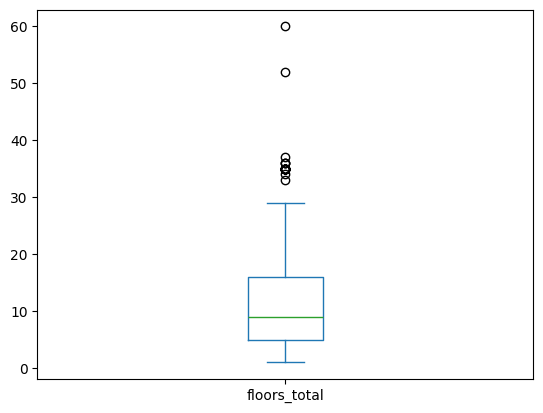

In [164]:
data.plot(y='floors_total', kind='box')

Проверяем категории, где есть пропуски данных

In [165]:
data.loc[data['floors_total'].isna(), 'cat_locality'].unique()

array(['СПб', 'Центр СПб', 'Агломерация', 'города в СПб'], dtype=object)

Создаем функцию поиска находящихся рядом объектов

In [166]:
def near_floors(category):
    med_floors = data.query(
        'cat_locality.isin(@category)'
    ).pivot_table(
        index=['airports_nearest', 'city_centers_nearest'],
        values=['floors_total'], aggfunc=['max', 'count']
    )
    med_floors.columns = ['floors_total', 'count']
    return med_floors

In [167]:
near_floors_spb = near_floors(['СПб', 'Центр СПб', 'города в СПб'])
near_floors_spb

floors_total  count
airports_nearest city_centers_nearest                     
0.00             22801.00                      9.00      1
6450.00          17461.00                      9.00      2
6914.00          21486.00                      4.00      1
6949.00          13165.00                     24.00      1
6989.00          13205.00                     25.00      6
...                                             ...    ...
19533.00         18535.00                       NaN      0
19659.00         31813.00                       NaN      0
20160.00         3252.00                        NaN      0
25382.00         28806.00                       NaN      0
35234.00         14674.00                       NaN      0

[9284 rows x 2 columns]

Проверяем объекты где этаж записан больший, чем этажей в здании

In [168]:
data[data['floor'] > data['floors_total']]

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, locality_name_short, cat_locality, price_m2, year, month, day_of_week]
Index: []

Создаем сравнительную таблицу, заменяем отсутсвующие значения

In [169]:
compare_floors_spb = data[data['floors_total'].isna()].query(
    'cat_locality.isin(["СПб", "города в СПб", "Центр СПб"])'
).join(
    near_floors_spb, on=['airports_nearest', 'city_centers_nearest'], rsuffix='_near'
)[['airports_nearest', 'city_centers_nearest', 'floors_total', 'floors_total_near', 'count']].sort_values('floors_total')
compare_floors_spb.query('count.isna() == False').sort_values('floors_total', ascending=False)

airports_nearest  city_centers_nearest  floors_total  \
186            39197.00              12373.00           NaN   
237            22041.00              17369.00           NaN   
457            37364.00               8322.00           NaN   
671            22041.00              17369.00           NaN   
1757           22735.00              11618.00           NaN   
...                 ...                   ...           ...   
22542          51340.00              15363.00           NaN   
22656          22041.00              17369.00           NaN   
22808          19095.00               4529.00           NaN   
23590          19095.00               4529.00           NaN   
23658           8426.00              12082.00           NaN   

       floors_total_near  count  
186                17.00      3  
237                24.00      8  
457                23.00      7  
671                24.00      8  
1757               25.00      9  
...                  ...    ...  
22542              25.00     10  
22656              24.00      8  
22808                NaN      0  
23590                NaN      0  
23658              25.00      7  

[75 rows x 5 columns]

In [170]:
for i in compare_floors_spb.index:
    if data.loc[i, 'floor'] < compare_floors_spb.loc[i, 'floors_total_near']:
        data.loc[i, 'floors_total'] = compare_floors_spb.loc[i, 'floors_total_near']

In [171]:
data[data['floor'] > data['floors_total']]

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, locality_name_short, cat_locality, price_m2, year, month, day_of_week]
Index: []

Проверяем оставшиеся значения

In [172]:
data['floors_total'].isna().sum()

37

Заменяем оставшиеся значения медианными по категориям

In [173]:
for i in data['cat_locality'].unique():
    data.loc[data['cat_locality'] == i, 'floors_total'] = \
    data.loc[data['cat_locality'] == i, 'floors_total'].fillna(
        data.loc[data['cat_locality'] == i, 'floors_total'].median())

In [174]:
data['floors_total'].isna().sum()

0

Проверяем наличие объектов со значением этажа большим, чем в здании

In [175]:
data[data['floor'] > data['floors_total']]

total_images  last_price  total_area first_day_exposition  rooms  \
3031              9  6400000.00       56.70           2018-03-27      2   
3438             10  4100000.00       38.00           2018-04-14      1   
5146             10  3085024.00       33.33           2018-10-06      1   
5187              5  3300000.00       25.40           2018-11-02      0   
6030              3 10900000.00      116.23           2017-05-05      4   
7922              3  5426412.00       50.11           2016-06-08      2   
9023              5  2900000.00       35.10           2018-07-18      1   
10531             3  6595420.00       61.80           2016-05-21      2   
11129            10  3128418.00       34.53           2018-10-01      1   
13622             3  7650000.00       88.84           2016-05-21      3   
14094             5  3290000.00       33.00           2018-02-01      1   
18832             0 40348248.00      284.00           2016-11-24      4   
20146            16  3850000.00       36.00           2018-10-12      1   
20738             5  4480000.00       54.22           2018-02-01      2   
21273             3  6300000.00       70.02           2015-03-28      2   
22808             0 14569263.00      110.40           2016-11-20      3   
23590             0 21187872.00      123.30           2017-04-25      3   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
3031             2.65          9.00        32.00  12.00          NaN   False   
3438             2.65          9.00        19.00  12.00          NaN   False   
5146             2.65         10.00        11.00  12.00          NaN   False   
5187             2.65          9.00          NaN  15.00          NaN    True   
6030             2.65         10.00          NaN  24.00          NaN   False   
7922             2.65         10.00        26.94  24.00          NaN   False   
9023             2.65          9.00          NaN  11.00          NaN   False   
10531            2.65         10.00        30.01  12.00          NaN   False   
11129            2.65         10.00        11.00  13.00          NaN   False   
13622            2.65         10.00        49.87  21.00          NaN   False   
14094            2.65          9.00          NaN  17.00          NaN   False   
18832            3.10          5.00       104.76   6.00          NaN   False   
20146            2.60          6.00        19.00  15.00          NaN   False   
20738            2.65          9.00          NaN  10.00          NaN   False   
21273            2.65         10.00        34.87  19.00          NaN   False   
22808            3.10          5.00        45.38   6.00          NaN   False   
23590            3.10          5.00        50.40  18.00          NaN   False   

       open_plan  kitchen_area  balcony                locality_name  \
3031       False         12.00      NaN                      Кудрово   
3438       False         10.30      NaN                      Кудрово   
5146       False           NaN      NaN              Санкт-Петербург   
5187       False           NaN      NaN               посёлок Мурино   
6030       False           NaN     0.00              Санкт-Петербург   
7922       False         11.13     0.00              Санкт-Петербург   
9023       False           NaN      NaN  городской посёлок Новоселье   
10531      False         10.08     0.00              Санкт-Петербург   
11129      False           NaN      NaN              Санкт-Петербург   
13622      False          9.76     0.00              Санкт-Петербург   
14094      False           NaN      NaN      деревня Новое Девяткино   
18832      False         14.77     0.00              Санкт-Петербург   
20146      False          8.50      NaN             посёлок Стрельна   
20738      False           NaN      NaN               посёлок Мурино   
21273      False         10.13     0.00              Санкт-Петербург   
22808      False         23.42     0.00              Санкт-Пете

Заменяем в таком случае общее значение этажей на значение этажа, на котором находится объект

In [176]:
data.loc[
    data['floor'] > data['floors_total'], 'floors_total'
] = data.loc[
    data['floor'] > data['floors_total'], 'floor'
]

Создаем таблицу с количеством объектов на этажах

In [177]:
data.pivot_table(index='floors_total', values='total_area', aggfunc='count')

total_area
floors_total            
1.00                  25
2.00                 383
3.00                 668
4.00                1196
5.00                5786
6.00                 917
7.00                 593
8.00                 391
9.00                3764
10.00               1187
11.00                204
12.00               1366
13.00                230
14.00                554
15.00                368
16.00               1375
17.00                838
18.00                507
19.00                341
20.00                272
21.00                159
22.00                288
23.00                352
24.00                486
25.00               1089
26.00                125
27.00                164
28.00                 21
29.00                  1
33.00                  1
34.00                  1
35.00                 24
36.00                  3
37.00                  1
52.00                  1
60.00                  1

Проверим максимальные значения

In [178]:
data[data['floors_total'] > 30].sort_values('floors_total')

total_images  last_price  total_area first_day_exposition  rooms  \
11575             9  9900000.00      101.00           2016-04-28      3   
1697             11  3550000.00       28.00           2018-02-08      1   
9579              9  3450000.00       24.80           2019-02-01      0   
21599            12  6200000.00       51.00           2017-08-27      2   
20938            18  9900000.00      100.90           2019-04-08      3   
18629            20  5700000.00       54.00           2017-12-08      1   
18617             8  7350000.00       68.50           2017-10-09      2   
18218             4  9900000.00      101.00           2018-09-27      3   
15982             1  5900000.00       62.00           2015-03-01      2   
14347            14  8595000.00       69.70           2018-09-26      2   
13975            19  6990000.00       65.00           2018-10-06      2   
12960            20  6140000.00       54.00           2018-10-09      2   
12888             7  7600000.00       70.00           2016-11-18      3   
21809            20 10600000.00       77.00           2019-04-16      2   
22946            14  7690000.00       75.00           2018-03-27      2   
9186              7  6500000.00       49.10           2019-04-12      1   
871              14  7777777.00       75.00           2017-11-16      2   
8496             20  7500000.00       73.30           2017-05-18      3   
7236             10  4599000.00       42.00           2019-01-10      1   
5808             12  4590000.00       43.00           2018-10-19      1   
1060             10  5200000.00       50.00           2015-11-06      2   
5749             20  3590000.00       25.00           2017-08-30      0   
4855             12  5500000.00       50.00           2017-06-22      1   
9370             12  7390000.00       70.00           2017-02-21      2   
1917             13 10150000.00       74.00           2017-11-17      2   
2966              9  4300000.00       37.00           2017-08-08      1   
397              15  5990000.00       54.00           2018-03-22      2   
5807             17  8150000.00       80.00           2019-01-09      2   
11079            16  9200000.00       75.00           2019-02-22      2   
16934             5  4100000.00       40.00           2017-10-17      1   
16731             9  3978000.00       40.00           2018-09-24      1   
2253             12  3800000.00       45.50           2018-06-28      2   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
11575            2.65         33.00        53.00  32.00        False   False   
1697             2.65         34.00        18.00  23.00          NaN   False   
9579             2.68         35.00        16.00  17.00          NaN    True   
21599            2.70         35.00        27.00  13.00          NaN   False   
20938            2.70         35.00        53.40  22.00          NaN   False   
18629            2.70         35.00        21.00  31.00          NaN   False   
18617            2.80         35.00        27.00   3.00          NaN   False   
18218            2.65         35.00        53.40  33.00          NaN   False   
15982            2.70         35.00        34.00   9.00        False   False   
14347            2.70         35.00        27.40  26.00          NaN   False   
13975            2.70         35.00        32.10  23.00          NaN   False   
12960            2.70         35.00        26.60  13.00          NaN   False   
12888            2.70         35.00        36.50  27.00          NaN   False   
21809            2.70         35.00        39.00  11.00          NaN   False   
22946            2.70         35.00        40.00   8.00          NaN   False   
9186             2.50         35.00        31.00   3.00          NaN   False   
871              2.70         35.00        40.50  23.00          NaN   False   
8496             2.70         35.00        28.00  27.00          NaN   False   
7236       

Здесь у одного и того же местоположения объектов указана разная этажность здания, исправим на медианное значение - 35. У двух последних объектов в таблице неверно записана этажность. Проверим по расстоянию до центра похожие объекты

In [179]:
data[data['city_centers_nearest'] == 12978.00]

total_images  last_price  total_area first_day_exposition  rooms  \
16731             9  3978000.00       40.00           2018-09-24      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
16731            2.65         52.00        10.50  18.00          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
16731      False         14.00      NaN  Санкт-Петербург          20728.00   

       city_centers_nearest  parks_around3000  parks_nearest  \
16731              12978.00              1.00         793.00   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  \
16731              0.00            NaN            45.00     санкт-петербург   

      cat_locality  price_m2  year  month  day_of_week  
16731          СПб  99450.00  2018      9            0

In [180]:
data[data['city_centers_nearest'] == 49488.00]

total_images  last_price  total_area first_day_exposition  rooms  \
2253            12  3800000.00       45.50           2018-06-28      2   

      ceiling_height  floors_total  living_area  floor is_apartment  studio  \
2253            2.88         60.00        27.40   4.00          NaN   False   

      open_plan  kitchen_area  balcony locality_name  airports_nearest  \
2253      False          7.40      NaN     Кронштадт          67763.00   

      city_centers_nearest  parks_around3000  parks_nearest  ponds_around3000  \
2253              49488.00              2.00         342.00              3.00   

      ponds_nearest  days_exposition locality_name_short  cat_locality  \
2253         614.00           166.00           кронштадт  города в СПб   

      price_m2  year  month  day_of_week  
2253  83516.48  2018      6            3

Других объектов нет. В первом случае замиеним этажность на 25, во втором случае на 6

In [181]:
data.loc[data['floors_total'] == 52, 'floors_total'] = 25

In [182]:
data.loc[data['floors_total'] == 60, 'floors_total'] = 6

In [183]:
data.loc[data['floors_total'] > 30, 'floors_total'] = 35

Меняем тип данных на целочисленный

In [184]:
data['floors_total'] = data['floors_total'].astype(int)

#### Столбец living_area

Строим диаграмму размаха

<Axes: >

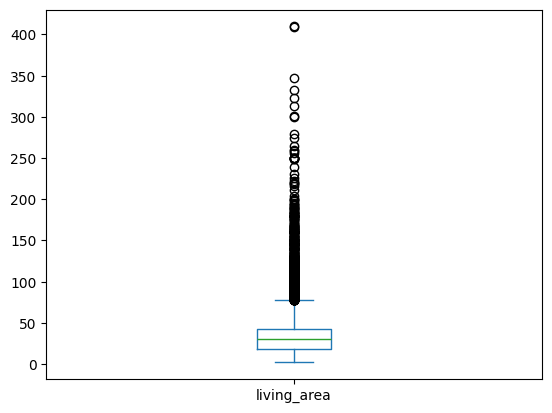

In [185]:
data.plot(y='living_area', kind='box')

Будем обрабатывать столбец вместе со столбцом со значениями площади кухни

<Axes: >

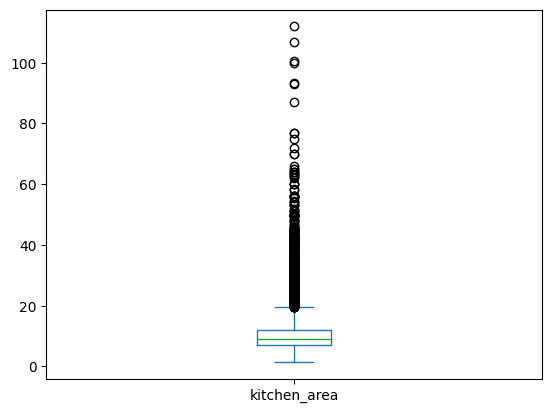

In [186]:
data.plot(y='kitchen_area', kind='box')

Проверяем пропуски

In [187]:
data['living_area'].isna().sum()

1901

In [188]:
data['kitchen_area'].isna().sum()

2275

Найдем долю жилой площади и площади кухни от общей

In [189]:
data['area_part'] = (data['living_area'] + data['kitchen_area']) / data['total_area']
data['living_area_part'] = data['living_area'] / data['total_area']
data['kitchen_area_part'] = data['kitchen_area'] / data['total_area']

Найдем неучтенные студии (с неизвестной площадью кухни)

Медианное значение жилой площади для студий

In [190]:
med_studio_area_part = (data.query('studio')['living_area'] / data.query('studio')['total_area']).median()
med_studio_area_part

0.6894049346879536

Верхняя граница выбросов площади для студий

In [191]:
data.query('studio')['total_area'].quantile(q=0.75) + \
1.5 *(data.query('studio')['total_area'].quantile(q=0.75) - data.query('studio')['total_area'].quantile(q=0.25))

36.5

Фильтрация неучтенных студиий

In [192]:
data.query('kitchen_area.isna() and living_area_part > 0.686 and not studio and total_area < 36.5')

total_images  last_price  total_area first_day_exposition  rooms  \
237               4  2438033.00       28.10           2016-11-23      1   
508               0  3375000.00       34.40           2017-03-28      0   
946               5  2200000.00       23.00           2016-09-27      0   
1280             10  2200000.00       23.00           2018-03-06      1   
1544              8  3300000.00       26.00           2018-03-15      1   
...             ...         ...         ...                  ...    ...   
21981             6  2000000.00       21.57           2018-04-19      1   
22007             9  5000000.00       28.30           2019-04-22      1   
22680             4  2100000.00       23.60           2016-02-25      1   
23191             3  1900000.00       18.90           2016-04-04      1   
23579             7  2350000.00       24.80           2018-06-07      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
237              2.65            24        20.75   1.00          NaN   False   
508              2.73            26        24.30  19.00          NaN   False   
946              2.70            27        18.00   7.00          NaN   False   
1280             2.70            24        17.00  21.00          NaN   False   
1544             2.65            16        20.00   6.00          NaN   False   
...               ...           ...          ...    ...          ...     ...   
21981            2.70            19        15.10  13.00          NaN   False   
22007            3.10            11        21.30   9.00          NaN   False   
22680            2.75            25        17.70  23.00          NaN   False   
23191            2.65            16        16.00  12.00          NaN   False   
23579            2.65            10        18.00   2.00          NaN   False   

       open_plan  kitchen_area  balcony      locality_name  airports_nearest  \
237        False           NaN     0.00    Санкт-Петербург          22041.00   
508         True           NaN     1.00  посёлок Парголово          53115.00   
946         True           NaN     2.00     посёлок Мурино          51553.00   
1280       False           NaN      NaN     посёлок Мурино          51553.00   
1544       False           NaN      NaN    Санкт-Петербург           8340.00   
...          ...           ...      ...                ...               ...   
21981      False           NaN      NaN     посёлок Мурино          51553.00   
22007      False           NaN      NaN    Санкт-Петербург          30824.00   
22680      False           NaN     0.00    деревня Кудрово               NaN   
23191      False           NaN     0.00              Тосно               NaN   
23579      False           NaN      NaN            Кудрово               NaN   

       city_centers_nearest  parks_around3000  parks_nearest  \
237                17369.00              0.00            NaN   
508                19292.00              0.00            NaN   
946                21888.00               NaN            NaN   
1280               21888.00               NaN            NaN   
1544               11992.00              2.00          20.00   
...                     ...               ...            ...   
21981              21888.00               NaN            NaN   
22007               6469.00              1.00         756.00   
22680                   NaN               NaN            NaN   
23191                   NaN               NaN            NaN   
23579                   NaN               NaN            NaN   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  \
237                1.00         374.00           251.00     санкт-петербург   
508                1.00         593.00           430.00           парголово   
946                 NaN            NaN           483.00              мурино   
1280                NaN            NaN            42.00              мурино   
1544               1

Заменяем количество комнат на 0 и studio на true

In [193]:
data.loc[
    (data['kitchen_area'].isna()) &
    (data['living_area_part'] > 0.686) &
    (data['studio'] == False) &
    (data['total_area'] < 36.5) &
    (data['rooms'] != 0),
    'rooms'
] = 0
data.loc[
    data['rooms'] == 0,
    'studio'
] = True


In [194]:
data.loc[
    data['studio'],
    'kitchen_area'
] = 0

In [195]:
data['kitchen_area'].isna().sum()

1982

Обновляем данные и строим диаграммы размаха для объектов-студий

In [196]:
data['area_part'] = (data['living_area'] + data['kitchen_area']) / data['total_area']
data['living_area_part'] = data['living_area'] / data['total_area']
data['kitchen_area_part'] = data['kitchen_area'] / data['total_area']

<Axes: >

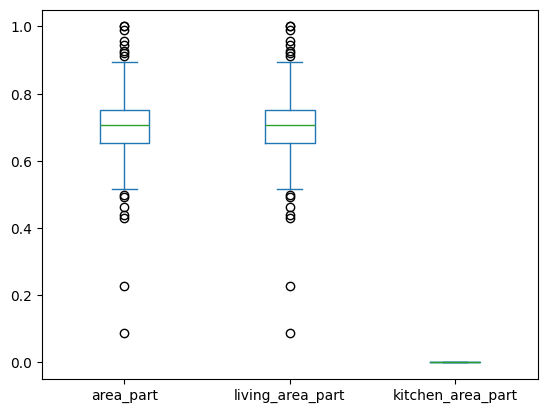

In [197]:
data[data['studio']].plot(y=['area_part', 'living_area_part', 'kitchen_area_part'], kind='box')

In [198]:
data[data['studio']].sort_values('area_part')

total_images  last_price  total_area first_day_exposition  rooms  \
21758             0  2330000.00       23.00           2018-01-01      0   
17582            11  2680000.00       22.00           2018-08-11      0   
839              14  1900000.00       35.00           2017-04-14      0   
1625              7  1980000.00       23.98           2018-02-01      0   
11051             2  2200000.00       26.00           2017-10-24      0   
...             ...         ...         ...                  ...    ...   
7818             11  3300000.00       27.30           2018-04-06      0   
8454              7  2250000.00       19.00           2019-03-12      0   
18028            11  3500000.00       31.00           2019-04-17      0   
19392             5 71000000.00      371.00           2018-07-26      0   
23554            15  3350000.00       26.00           2018-09-07      0   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
21758            2.74            24         2.00  22.00          NaN    True   
17582            2.69            25         5.00   8.00          NaN    True   
839              2.70             5        15.00   3.00        False    True   
1625             2.65             4        10.50   3.00          NaN    True   
11051            2.65            21        12.00  21.00          NaN    True   
...               ...           ...          ...    ...          ...     ...   
7818             2.65            20          NaN   9.00          NaN    True   
8454             3.00             6          NaN   2.00          NaN    True   
18028            2.70            25          NaN   2.00          NaN    True   
19392            3.57             7          NaN   6.00          NaN    True   
23554            2.75            19          NaN   8.00          NaN    True   

       open_plan  kitchen_area  balcony            locality_name  \
21758      False          0.00      NaN           посёлок Мурино   
17582      False          0.00     2.00          Санкт-Петербург   
839         True          0.00     1.00       поселок Новый Свет   
1625        True          0.00     1.00  поселок станции Корнево   
11051       True          0.00     2.00          деревня Кудрово   
...          ...           ...      ...                      ...   
7818        True          0.00     2.00          Санкт-Петербург   
8454       False          0.00      NaN          Санкт-Петербург   
18028      False          0.00      NaN          Санкт-Петербург   
19392       True          0.00      NaN          Санкт-Петербург   
23554      False          0.00      NaN          Санкт-Петербург   

       airports_nearest  city_centers_nearest  parks_around3000  \
21758          51553.00              21888.00               NaN   
17582          22735.00              11618.00              1.00   
839                 NaN                   NaN               NaN   
1625                NaN                   NaN               NaN   
11051               NaN                   NaN               NaN   
...                 ...                   ...               ...   
7818           15990.00              13853.00              0.00   
8454           12430.00               7316.00              1.00   
18028          21460.00              16788.00              0.00   
19392          25257.00               6060.00              1.00   
23554          18090.00              17092.00              0.00   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
21758            NaN               NaN            NaN            66.00   
17582         835.00              1.00         652.00            70.00   
839              NaN               NaN            NaN             7.00   
1625             NaN               NaN            NaN           120.00   
11051            NaN               NaN            NaN            35.00   
...              ...               ...            ...              ...   
7818 

Заменяем минимальные выбросы и отсутвующие значения на медианное значение отношения жилой площади к общей для студий

In [199]:
data.loc[
    data['studio']&((data['living_area'].isna())|(data['living_area_part'] < 0.5)),
    'living_area'
] = data['total_area'] * med_studio_area_part

Проанализируем выбросы

<Axes: >

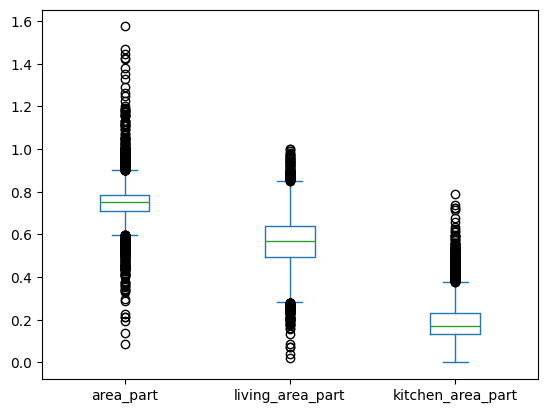

In [200]:
data.plot(y=['area_part', 'living_area_part', 'kitchen_area_part'], kind='box')

Находим границы выбросов

In [201]:
min_area_part = mini(data['cat_locality'].unique(), 'area_part')
min_area_part

0.5954536266275242

In [202]:
max_area_part = maxi(data['cat_locality'].unique(), 'area_part')
max_area_part

0.901101562568898

In [203]:
min_living_area_part = mini(data['cat_locality'].unique(), 'living_area_part')
min_living_area_part

0.28127072556041915

In [204]:
max_living_area_part = maxi(data['cat_locality'].unique(), 'living_area_part')
max_living_area_part

0.8518503780342221

In [205]:
min_kitchen_area_part = mini(data['cat_locality'].unique(), 'kitchen_area_part')
min_kitchen_area_part

-0.01564537157757498

In [206]:
max_kitchen_area_part = maxi(data['cat_locality'].unique(), 'kitchen_area_part')
max_kitchen_area_part

0.37861799217731423

In [207]:
data[data['area_part'] > max_area_part]

total_images  last_price  total_area first_day_exposition  rooms  \
41               16  7900000.00       74.00           2016-05-04      3   
171               6  3800000.00       49.00           2019-02-22      2   
184               7  2600000.00       30.20           2018-02-14      1   
220               8  3890000.00       37.00           2018-07-09      1   
319              19  4850000.00       59.70           2015-03-19      3   
...             ...         ...         ...                  ...    ...   
23297            10  1850000.00       48.20           2019-03-13      2   
23328            12  4299000.00       54.00           2016-11-25      2   
23477             3  1450000.00       72.00           2018-07-06      3   
23521            13  8500000.00       65.00           2018-11-01      2   
23680            14  5000000.00       59.00           2019-04-04      3   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
41               2.65            14        59.00   8.00        False   False   
171              2.50             9        38.00   8.00          NaN   False   
184              2.65             9        26.10   5.00          NaN   False   
220              2.50            25        28.00   6.00          NaN   False   
319              2.50             5        47.40   4.00          NaN   False   
...               ...           ...          ...    ...          ...     ...   
23297            2.55             5        42.20   2.00          NaN   False   
23328            2.50            14        40.00   8.00          NaN   False   
23477            3.00             2        58.00   2.00          NaN   False   
23521            3.10             4        44.00   2.00          NaN   False   
23680            2.50             5        52.00   1.00          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
41         False         12.00     5.00  Санкт-Петербург          37715.00   
171        False         10.00     1.00   посёлок Шушары          18471.00   
184        False          6.20      NaN  Санкт-Петербург          13952.00   
220        False          9.00      NaN  Санкт-Петербург          25408.00   
319        False          6.40     1.00  Санкт-Петербург          43095.00   
...          ...           ...      ...              ...               ...   
23297      False          6.00     1.00           Высоцк               NaN   
23328      False         10.00     0.00          Колпино          25612.00   
23477      False         12.00      NaN          Гатчина               NaN   
23521      False         15.30      NaN  Санкт-Петербург          22276.00   
23680      False          7.00      NaN  Санкт-Петербург          26835.00   

       city_centers_nearest  parks_around3000  parks_nearest  \
41                 12612.00              1.00         725.00   
171                24272.00              0.00            NaN   
184                15031.00              0.00            NaN   
220                16166.00              0.00            NaN   
319                15599.00              0.00            NaN   
...                     ...               ...            ...   
23297                   NaN               NaN            NaN   
23328              31399.00              0.00            NaN   
23477                   NaN               NaN            NaN   
23521               3996.00              1.00         627.00   
23680              11878.00              0.00            NaN   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  \
41                 1.00         759.00           179.00     санкт-петербург   
171                0.00            NaN            11.00              шушары   
184                1.00         824.00            12.00     санкт-петербург   
220                0.00            NaN            28.00     санкт-петербург   
319                0.00            NaN      

Создаем функцию для поиска находящихся рядом объектов

In [208]:
def near_area(category):
    med_area = data.query(
        'cat_locality.isin(@category) and @min_area_part < area_part < @max_area_part and not studio'
    ).pivot_table(
        index=['airports_nearest', 'city_centers_nearest', 'floors_total', 'rooms'],
        values=['living_area_part', 'kitchen_area_part'], aggfunc=['median', 'count']
    )
    med_area.columns = ['kitchen_area_part', 'living_area_part', 'count', 1]
    med_area = med_area[['living_area_part', 'kitchen_area_part', 'count']]
    return med_area

In [209]:
median_area = near_area(data['cat_locality'].unique())
median_area

living_area_part  \
airports_nearest city_centers_nearest floors_total rooms                     
0.00             22801.00             9            1                  0.57   
6450.00          17461.00             9            1                  0.40   
                                                   2                  0.48   
6914.00          21486.00             4            1                  0.52   
6949.00          13165.00             24           2                  0.54   
...                                                                    ...   
83758.00         64857.00             4            3                  0.69   
84006.00         65105.00             4            2                  0.63   
84665.00         65764.00             5            3                  0.63   
84853.00         65952.00             5            2                  0.59   
84869.00         65968.00             5            2                  0.60   

                                                          kitchen_area_part  \
airports_nearest city_centers_nearest floors_total rooms                      
0.00             22801.00             9            1                   0.17   
6450.00          17461.00             9            1                   0.23   
                                                   2                   0.27   
6914.00          21486.00             4            1                   0.21   
6949.00          13165.00             24           2                   0.14   
...                                                                     ...   
83758.00         64857.00             4            3                   0.10   
84006.00         65105.00             4            2                   0.11   
84665.00         65764.00             5            3                   0.12   
84853.00         65952.00             5            2                   0.14   
84869.00         65968.00             5            2                   0.12   

                                                          count  
airports_nearest city_centers_nearest floors_total rooms         
0.00             22801.00             9            1          1  
6450.00          17461.00             9            1          1  
                                                   2          1  
6914.00          21486.00             4            1          1  
6949.00          13165.00             24           2          1  
...                                                         ...  
83758.00         64857.00             4            3          1  
84006.00         65105.00             4            2          1  
84665.00         65764.00             5            3          1  
84853.00         65952.00             5            2          1  
84869.00         65968.00             5            2          1  

[12703 rows x 3 columns]

In [210]:
compare_area_max = data.query(
    'area_part > @max_area_part and not studio'
).join(
    median_area, on=['airports_nearest', 'city_centers_nearest', 'floors_total', 'rooms'], rsuffix='_median'
)[['living_area_part', 'living_area_part_median', 'kitchen_area_part', 'kitchen_area_part_median', 'count']]
compare_area_max.query('count.isna() == False').sort_values('living_area_part', ascending=False)

living_area_part  living_area_part_median  kitchen_area_part  \
15513              0.98                     0.41               0.28   
551                0.97                     0.43               0.29   
21676              0.91                     0.76               0.06   
10652              0.90                     0.42               0.26   
601                0.90                     0.60               0.13   
...                 ...                      ...                ...   
5736               0.45                     0.38               0.53   
21081              0.45                     0.55               0.48   
12344              0.40                     0.64               0.50   
4780               0.38                     0.40               0.58   
511                0.19                     0.42               0.72   

       kitchen_area_part_median  count  
15513                      0.31   3.00  
551                        0.29  17.00  
21676                      0.08   2.00  
10652                      0.23   4.00  
601                        0.16   1.00  
...                         ...    ...  
5736                       0.40   1.00  
21081                      0.15   1.00  
12344                      0.11   1.00  
4780                       0.29   1.00  
511                        0.27  23.00  

[101 rows x 5 columns]

Заменяем значения жилой площади и площади кухни

In [211]:
for i in compare_area_max.index:
    data.loc[i, 'living_area'] = compare_area_max.loc[i, 'living_area_part_median'] * data.loc[i, 'total_area']
    data.loc[i, 'kitchen_area'] = compare_area_max.loc[i, 'kitchen_area_part_median'] * data.loc[i, 'total_area']
    

In [212]:
data['area_part'] = (data['living_area'] + data['kitchen_area']) / data['total_area']
data['living_area_part'] = data['living_area'] / data['total_area']
data['kitchen_area_part'] = data['kitchen_area'] / data['total_area']


Тоже самое проделываем для минимальных значений

In [213]:
compare_area_min = data.query(
    'area_part < @min_area_part and not studio'
).join(
    median_area, on=['airports_nearest', 'city_centers_nearest', 'floors_total', 'rooms'], rsuffix='_median'
)[['living_area_part', 'living_area_part_median', 'kitchen_area_part', 'kitchen_area_part_median', 'count']]
compare_area_min.query('count.isna() == False').sort_values('living_area_part', ascending=False)

living_area_part  living_area_part_median  kitchen_area_part  \
22804              0.53                     0.53               0.05   
8038               0.50                     0.57               0.07   
19140              0.48                     0.56               0.11   
22347              0.47                     0.67               0.09   
1519               0.46                     0.50               0.10   
...                 ...                      ...                ...   
698                0.26                     0.33               0.32   
13942              0.24                     0.57               0.20   
51                 0.24                     0.71               0.31   
3242               0.07                     0.46               0.27   
23574              0.02                     0.56               0.12   

       kitchen_area_part_median  count  
22804                      0.09   2.00  
8038                       0.07   1.00  
19140                      0.15   1.00  
22347                      0.09   1.00  
1519                       0.11   1.00  
...                         ...    ...  
698                        0.28   4.00  
13942                      0.20   1.00  
51                         0.10   1.00  
3242                       0.28   1.00  
23574                      0.15   1.00  

[77 rows x 5 columns]

In [214]:
for i in compare_area_min.index:
    data.loc[i, 'living_area'] = compare_area_min.loc[i, 'living_area_part_median'] * data.loc[i, 'total_area']
    data.loc[i, 'kitchen_area'] = compare_area_min.loc[i, 'kitchen_area_part_median'] * data.loc[i, 'total_area']
    

Строим новые диаграммы размаха

In [215]:
data['area_part'] = (data['living_area'] + data['kitchen_area']) / data['total_area']
data['living_area_part'] = data['living_area'] / data['total_area']
data['kitchen_area_part'] = data['kitchen_area'] / data['total_area']


<Axes: >

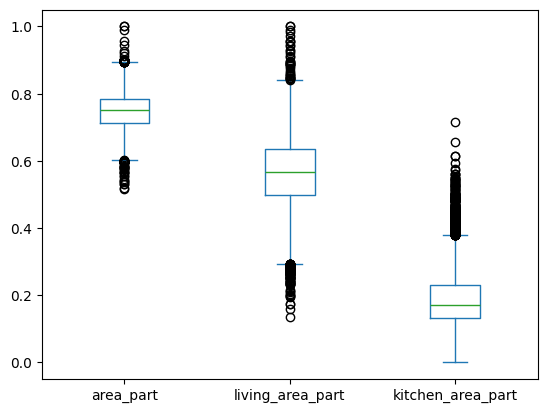

In [216]:
data.plot(y=['area_part', 'living_area_part', 'kitchen_area_part'], kind='box')

Те же действия проделываем над выбросами части жилой площади

In [217]:
compare_living_area_max = data.query(
    'living_area_part > @max_living_area_part and not studio'
).join(
    median_area, on=['airports_nearest', 'city_centers_nearest', 'floors_total', 'rooms'], rsuffix='_median'
)[['living_area_part', 'living_area_part_median', 'kitchen_area_part', 'kitchen_area_part_median', 'count']]
compare_living_area_max.sort_values('living_area_part', ascending=False)

living_area_part  living_area_part_median  kitchen_area_part  \
20256              0.98                      NaN                NaN   
4339               0.97                      NaN                NaN   
7857               0.96                      NaN                NaN   
19268              0.95                     0.42                NaN   
7415               0.94                     0.50                NaN   
16606              0.93                      NaN                NaN   
22095              0.91                      NaN                NaN   
424                0.90                      NaN                NaN   
6059               0.89                      NaN                NaN   
19372              0.89                      NaN                NaN   
3618               0.88                      NaN                NaN   
22907              0.88                      NaN                NaN   
10902              0.86                      NaN                NaN   

       kitchen_area_part_median  count  
20256                       NaN    NaN  
4339                        NaN    NaN  
7857                        NaN    NaN  
19268                      0.28  25.00  
7415                       0.17   3.00  
16606                       NaN    NaN  
22095                       NaN    NaN  
424                         NaN    NaN  
6059                        NaN    NaN  
19372                       NaN    NaN  
3618                        NaN    NaN  
22907                       NaN    NaN  
10902                       NaN    NaN

In [218]:
for i in compare_living_area_max.index:
    data.loc[i, 'living_area'] = compare_living_area_max.loc[i, 'living_area_part_median'] * data.loc[i, 'total_area']
    data.loc[i, 'kitchen_area'] = compare_living_area_max.loc[i, 'kitchen_area_part_median'] * data.loc[i, 'total_area']
    

In [219]:
compare_living_area_min = data.query(
    'living_area_part < @min_living_area_part and not studio'
).join(
    median_area, on=['airports_nearest', 'city_centers_nearest', 'floors_total', 'rooms'], rsuffix='_median'
)[['living_area_part', 'living_area_part_median', 'kitchen_area_part', 'kitchen_area_part_median', 'count']]
compare_living_area_min.sort_values('living_area_part', ascending=False)

living_area_part  living_area_part_median  kitchen_area_part  \
4457               0.28                     0.28               0.45   
10319              0.28                      NaN                NaN   
9657               0.28                     0.36               0.43   
13759              0.28                     0.28               0.40   
23388              0.28                     0.28               0.47   
...                 ...                      ...                ...   
16431              0.19                     0.19               0.55   
16034              0.17                     0.17               0.50   
1326               0.17                     0.39               0.62   
20994              0.16                     0.16               0.61   
2309               0.13                     0.13               0.66   

       kitchen_area_part_median  count  
4457                       0.45   1.00  
10319                       NaN    NaN  
9657                       0.30   7.00  
13759                      0.40   1.00  
23388                      0.47   2.00  
...                         ...    ...  
16431                      0.55   1.00  
16034                      0.50   1.00  
1326                       0.40   2.00  
20994                      0.61   1.00  
2309                       0.66   1.00  

[78 rows x 5 columns]

In [220]:
for i in compare_living_area_min.index:
    data.loc[i, 'living_area'] = compare_living_area_min.loc[i, 'living_area_part_median'] * data.loc[i, 'total_area']
    data.loc[i, 'kitchen_area'] = compare_living_area_min.loc[i, 'kitchen_area_part_median'] * data.loc[i, 'total_area']
    

Выбросы значений части площади кухни также заменяем медианными значениями находящихся рядом объектов

In [221]:
compare_kitchen_area_max = data.query(
    'kitchen_area_part > @max_kitchen_area_part and not studio'
).join(
    median_area, on=['airports_nearest', 'city_centers_nearest', 'floors_total', 'rooms'], rsuffix='_median'
)[['living_area_part', 'living_area_part_median', 'kitchen_area_part', 'kitchen_area_part_median', 'count']]
compare_kitchen_area_max.sort_values('living_area_part', ascending=False)

living_area_part  living_area_part_median  kitchen_area_part  \
9076               0.49                     0.51               0.40   
15475              0.49                      NaN               0.40   
656                0.49                     0.59               0.38   
14864              0.49                     0.49               0.40   
9298               0.48                     0.48               0.38   
...                 ...                      ...                ...   
17564               NaN                      NaN               0.43   
19382               NaN                      NaN               0.49   
20916               NaN                     0.53               0.38   
21016               NaN                      NaN               0.45   
22718               NaN                      NaN               0.38   

       kitchen_area_part_median  count  
9076                       0.30   2.00  
15475                       NaN    NaN  
656                        0.16   3.00  
14864                      0.40   1.00  
9298                       0.38   1.00  
...                         ...    ...  
17564                       NaN    NaN  
19382                       NaN    NaN  
20916                      0.26   1.00  
21016                       NaN    NaN  
22718                       NaN    NaN  

[334 rows x 5 columns]

In [222]:
for i in compare_kitchen_area_max.index:
    data.loc[i, 'living_area'] = compare_kitchen_area_max.loc[i, 'living_area_part_median'] * data.loc[i, 'total_area']
    data.loc[i, 'kitchen_area'] = compare_kitchen_area_max.loc[i, 'kitchen_area_part_median'] * data.loc[i, 'total_area']
    

Строим диаграмы размаха

In [223]:
data['area_part'] = (data['living_area'] + data['kitchen_area']) / data['total_area']
data['living_area_part'] = data['living_area'] / data['total_area']
data['kitchen_area_part'] = data['kitchen_area'] / data['total_area']


<Axes: >

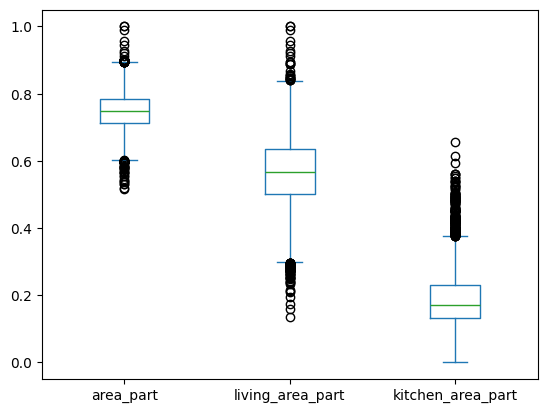

In [224]:
data.plot(y=['area_part', 'living_area_part', 'kitchen_area_part'], kind='box')

Значения обработаны. Теперь заполним отсутсвующие тем же способом

In [225]:
data['living_area'].isna().sum()

2561

In [226]:
data['kitchen_area'].isna().sum()

2657

In [227]:
compare_living_area_na = data.query(
    'living_area.isna()'
).join(
    median_area, on=['airports_nearest', 'city_centers_nearest', 'floors_total', 'rooms'], rsuffix='_median'
)[['living_area_part', 'living_area_part_median', 'kitchen_area_part', 'kitchen_area_part_median', 'count']]
compare_living_area_na.sort_values('living_area_part_median', ascending=False)

living_area_part  living_area_part_median  kitchen_area_part  \
11897               NaN                     0.77                NaN   
18450               NaN                     0.75               0.12   
17474               NaN                     0.74                NaN   
10379               NaN                     0.73                NaN   
1634                NaN                     0.73                NaN   
...                 ...                      ...                ...   
23642               NaN                      NaN                NaN   
23663               NaN                      NaN                NaN   
23670               NaN                      NaN                NaN   
23679               NaN                      NaN                NaN   
23680               NaN                      NaN                NaN   

       kitchen_area_part_median  count  
11897                      0.11   1.00  
18450                      0.13   1.00  
17474                      0.10   2.00  
10379                      0.17   1.00  
1634                       0.10   1.00  
...                         ...    ...  
23642                       NaN    NaN  
23663                       NaN    NaN  
23670                       NaN    NaN  
23679                       NaN    NaN  
23680                       NaN    NaN  

[2561 rows x 5 columns]

In [228]:
for i in compare_living_area_na.index:
    data.loc[i, 'living_area'] = compare_living_area_na.loc[i, 'living_area_part_median'] * data.loc[i, 'total_area']

In [229]:
data['living_area'].isna().sum()

2093

Оставшиеся заполняем медианным значением

In [230]:
data['living_area'] = data['living_area'].fillna(data['living_area_part'].median() * data['total_area'])

In [231]:
data['area_part'] = (data['living_area'] + data['kitchen_area']) / data['total_area']
data['living_area_part'] = data['living_area'] / data['total_area']
data['kitchen_area_part'] = data['kitchen_area'] / data['total_area']


In [232]:
data['living_area_part'].isna().sum()

0

Таким же способом заполняем отсутсвующие значения площади кухни

In [233]:
compare_kitchen_area_na = data.query(
    'kitchen_area.isna()'
).join(
    median_area, on=['airports_nearest', 'city_centers_nearest', 'floors_total', 'rooms'], rsuffix='_median'
)[['living_area_part', 'living_area_part_median', 'kitchen_area_part', 'kitchen_area_part_median', 'count']]
compare_kitchen_area_na.sort_values('living_area_part_median', ascending=False)

living_area_part  living_area_part_median  kitchen_area_part  \
11897              0.77                     0.77                NaN   
6194               0.74                     0.75                NaN   
17474              0.74                     0.74                NaN   
5779               0.74                     0.74                NaN   
20380              0.62                     0.73                NaN   
...                 ...                      ...                ...   
23663              0.57                      NaN                NaN   
23670              0.57                      NaN                NaN   
23679              0.57                      NaN                NaN   
23680              0.57                      NaN                NaN   
23696              0.52                      NaN                NaN   

       kitchen_area_part_median  count  
11897                      0.11   1.00  
6194                       0.09   1.00  
17474                      0.10   2.00  
5779                       0.11   1.00  
20380                      0.11   1.00  
...                         ...    ...  
23663                       NaN    NaN  
23670                       NaN    NaN  
23679                       NaN    NaN  
23680                       NaN    NaN  
23696                       NaN    NaN  

[2657 rows x 5 columns]

In [234]:
med_area_parts = (data['living_area_part'] + data['kitchen_area_part']).median()
med_area_parts

0.748792270531401

Нужно учесть то, что сумма частей жилой площади и площади кухни была меньше 1

In [235]:
for i in compare_kitchen_area_na.index:
    if (
        compare_kitchen_area_na.loc[i, 'living_area_part'] + compare_kitchen_area_na.loc[i, 'kitchen_area_part_median']
    ) < med_area_parts:
        data.loc[i, 'kitchen_area'] = compare_kitchen_area_na.loc[i, 'kitchen_area_part_median'] * data.loc[i, 'total_area']
    elif med_area_parts - data.loc[i, 'living_area_part'] > 0:
        data.loc[i, 'kitchen_area'] = (med_area_parts - data.loc[i, 'living_area_part']) * data.loc[i, 'total_area']
    else:
        data.loc[i, 'kitchen_area'] = data.loc[i, 'total_area'] - data.loc[i, 'living_area']
        

Строим диаграммы размаха обработанных данных

In [236]:
data['area_part'] = (data['living_area'] + data['kitchen_area']) / data['total_area']
data['living_area_part'] = data['living_area'] / data['total_area']
data['kitchen_area_part'] = data['kitchen_area'] / data['total_area']


<Axes: >

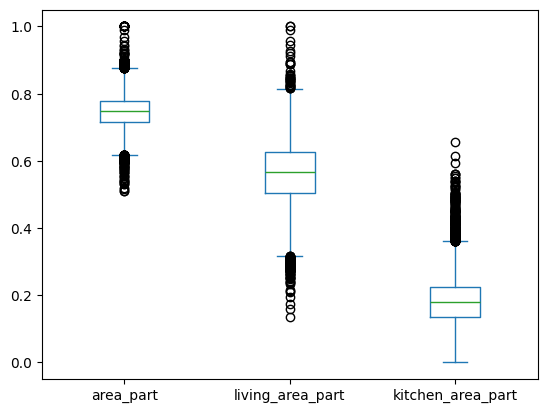

In [237]:
data.plot(y=['area_part', 'living_area_part', 'kitchen_area_part'], kind='box')

<Axes: >

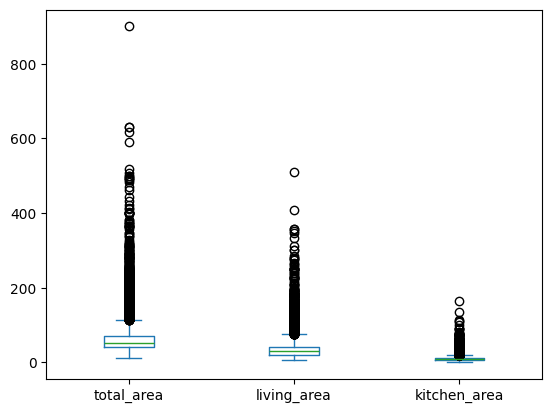

In [238]:
data.plot(y=['total_area', 'living_area', 'kitchen_area'], kind='box')

#### Столбец Floor

<Axes: >

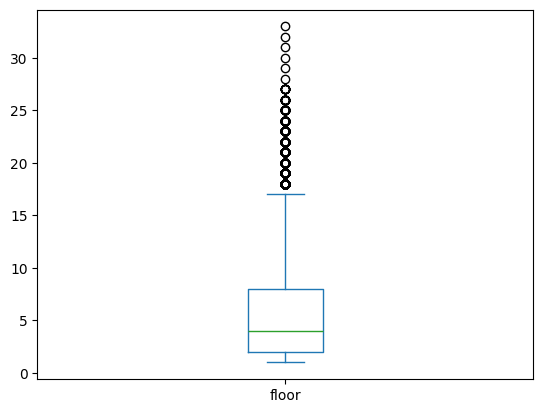

In [239]:
data.plot(y='floor', kind='box')

Возможные аномальные значения были устранены в ходе обработки столбца с количеством этажей

#### Столбец is_apartment

Проверяем уникальные значения в столбце

In [240]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Заменяем отсутсвующие знченния на False

In [241]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [242]:
data['is_apartment'].unique()

array([False,  True])

#### Столбцы studio, open_plan и kitchen_area

Столбцы studio, open_plan и kitchen_area были обработаны ранее

#### Столбец balcony

Строим гистограмму данных в столбце

<Axes: >

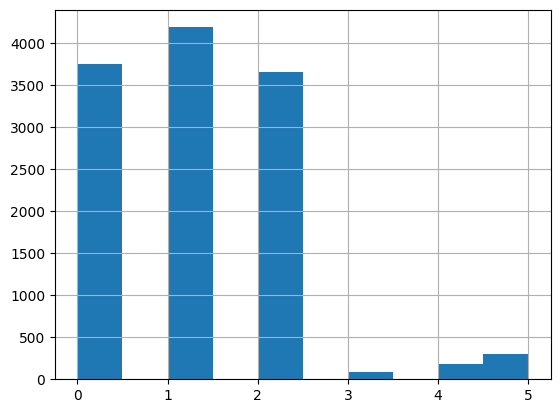

In [243]:
data['balcony'].hist()

Проверим объекты, где количество балконов больше количества комнат и кухни

In [244]:
data.query('balcony > rooms + 1')

total_images  last_price  total_area first_day_exposition  rooms  \
41               16  7900000.00       74.00           2016-05-04      3   
116              18 10999000.00       97.20           2017-11-13      3   
144               1  2450000.00       27.00           2017-03-30      0   
250              13  3200000.00       51.70           2019-01-22      2   
263              12 39900000.00      140.60           2016-11-19      2   
...             ...         ...         ...                  ...    ...   
23497            17  6150000.00       55.40           2019-04-22      2   
23526            14  5800000.00       60.69           2018-03-13      3   
23549             5 19600000.00      184.00           2016-04-21      3   
23592            10  1450000.00       29.00           2017-11-11      0   
23637             8  2350000.00       26.00           2018-06-26      0   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
41               2.65            14        42.00   8.00         False   False   
116              2.50            16        55.17  16.00         False   False   
144              2.74            24        15.50   2.00         False    True   
250              2.65            16        29.20   5.00         False   False   
263              3.50             8        39.80   7.00         False   False   
...               ...           ...          ...    ...           ...     ...   
23497            2.80            20        29.40  16.00         False   False   
23526            2.50             9        39.70   2.00         False   False   
23549            3.00            19        98.12  19.00         False   False   
23592            2.80             9        18.00   8.00         False    True   
23637            2.65            25        17.00   4.00         False    True   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
41         False         13.41     5.00  Санкт-Петербург          37715.00   
116        False         18.30     5.00  Санкт-Петербург          19426.00   
144        False          0.00     2.00   посёлок Мурино          51553.00   
250        False          7.70     4.00       Всеволожск               NaN   
263        False         49.20     4.00  Санкт-Петербург          32537.00   
...          ...           ...      ...              ...               ...   
23497      False          9.60     4.00  Санкт-Петербург          16285.00   
23526      False          6.20     5.00  Санкт-Петербург          51239.00   
23549      False         32.34     5.00  Санкт-Петербург          18995.00   
23592       True          0.00     2.00       Никольское               NaN   
23637      False          0.00     2.00    посёлок Бугры               NaN   

       city_centers_nearest  parks_around3000  parks_nearest  \
41                 12612.00              1.00         725.00   
116                21138.00              0.00            NaN   
144                21888.00               NaN            NaN   
250                     NaN               NaN            NaN   
263                 6589.00              0.00            NaN   
...                     ...               ...            ...   
23497              13873.00              0.00            NaN   
23526              15954.00              0.00            NaN   
23549               4837.00              0.00            NaN   
23592                   NaN               NaN            NaN   
23637                   NaN               NaN            NaN   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  \
41                 1.00         759.00           179.00     санкт-петербург   
116                2.00         390.00           394.00     санкт-петербург   
144                 NaN            NaN           181.00              мурино   
250                 NaN            NaN            21.00          всеволожск   
263                3.00         

Исправляем

In [245]:
data.loc[
    data['balcony'] > (data['rooms'] + 1),
    'balcony'
] = data.loc[
    data['balcony'] > (data['rooms'] + 1),
    'rooms'
] + 1

In [246]:
data['balcony'].isna().sum()

11511

Отсутствующие значения заполняем 0

In [247]:
data['balcony'] = data['balcony'].fillna(0)

#### Столбцы airports_nearest, city_centers_nearest

Столбцы airports_nearest, city_centers_nearest не нуждаются в обработке. Добавим в таблицу расстояние в км до центра города и аэропорта

In [248]:
data['airports_nearest_km'] = (data['airports_nearest'] / 1000)
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000)

In [249]:
data.loc[
    data['airports_nearest_km'].isna() == False, 'airports_nearest_km'
] = data.loc[
    data['airports_nearest_km'].isna() == False, 'airports_nearest_km'
].astype(int)

In [250]:
data.loc[
    data['city_centers_nearest_km'].isna() == False, 'city_centers_nearest_km'
] = data.loc[
    data['city_centers_nearest_km'].isna() == False, 'city_centers_nearest_km'
].astype(int)

В столбцах ponds_around3000 и parks_around3000, заполним значения 0, если отсутсвуют значения в столбцах ponds_nearest и parks_nearest, соответственно

In [251]:
data.loc[data['ponds_nearest'].isna(), 'ponds_around3000'] = 0
data.loc[data['parks_nearest'].isna(), 'parks_around3000'] = 0

#### Столбец days_exposition

В этом столбце много отсутствующих значений, попробуем понять что значит пропущенное значение. Посмотрим на количество пропусков по годам

In [252]:
data.query('days_exposition.isna()').pivot_table(index='year', values='day_of_week', aggfunc='count')

day_of_week
year             
2014           18
2015           70
2016           67
2017          271
2018          958
2019         1796

In [253]:
data.pivot_table(index='year', values='day_of_week', aggfunc='count')

day_of_week
year             
2014          137
2015         1191
2016         2781
2017         8185
2018         8509
2019         2879

Судя по этим данным, отсутвующее значение в данном столбце означает, что объект не был снят с продажи на момент выгрузки данных

#### Дубликаты

При исследовании данных были обнаружены дубликаты. Попробуем их обработать. Будем искать дубликаты по следующим параметрам: Цена квадратного метра, расстояние до центра, расстояние до аэропорта, количество этажей, этаж, количество комнат, год и месяц публикации

Категория центр СПб

In [254]:
data[
    (data['cat_locality'] == 'Центр СПб')&
    (data[data['cat_locality'] == 'Центр СПб'][['price_m2', 'floors_total', 'floor', 'rooms', 'year', 'city_centers_nearest_km', 'airports_nearest_km']].duplicated(keep=False))
].sort_values('price_m2')

total_images  last_price  total_area first_day_exposition  rooms  \
20208             4  3999000.00       47.10           2018-06-28      2   
22432             4  3999000.00       47.10           2018-06-15      2   
4859             16 28000000.00       33.00           2019-04-29      1   
17172            14 28000000.00       33.00           2019-04-30      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
20208            3.00             4        31.00   2.00         False   False   
22432            3.10             4        31.00   2.00         False   False   
4859             3.50             5        18.73   2.00         False   False   
17172            3.50             5        18.73   2.00         False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
20208      False          6.00     0.00  Санкт-Петербург          21540.00   
22432      False          6.00     0.00  Санкт-Петербург          21417.00   
4859       False          5.98     0.00  Санкт-Петербург          23447.00   
17172      False          5.98     0.00  Санкт-Петербург          23403.00   

       city_centers_nearest  parks_around3000  parks_nearest  \
20208               3659.00              0.00            NaN   
22432               3848.00              0.00            NaN   
4859                1376.00              3.00         344.00   
17172               1462.00              3.00         342.00   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  \
20208              3.00         330.00            71.00     санкт-петербург   
22432              2.00         229.00            57.00     санкт-петербург   
4859               3.00         119.00              NaN     санкт-петербург   
17172              3.00          27.00              NaN     санкт-петербург   

      cat_locality  price_m2  year  month  day_of_week  area_part  \
20208    Центр СПб  84904.46  2018      6            3       0.79   
22432    Центр СПб  84904.46  2018      6            4       0.79   
4859     Центр СПб 848484.85  2019      4            0       0.75   
17172    Центр СПб 848484.85  2019      4            1       0.75   

       living_area_part  kitchen_area_part  airports_nearest_km  \
20208              0.66               0.13                21.00   
22432              0.66               0.13                21.00   
4859               0.57               0.18                23.00   
17172              0.57               0.18                23.00   

       city_centers_nearest_km  
20208                     3.00  
22432                     3.00  
4859                      1.00  
17172                     1.00

Удаляем объект 22432, так как дней публикации объявления меньше, чем у объекта 20208, остальные значения полностью совпадают, а дата публикации разнится на 13 дней. Удаляем объект 17172, все значения совпадают, день публикации отличается на 1

In [255]:
data = data.drop(22432)
data = data.drop(17172)

Категория СПб

In [256]:
data[
    (data['cat_locality'] == 'СПб')&
    (data[data['cat_locality'] == 'СПб'][['price_m2', 'floors_total', 'floor', 'rooms', 'year', 'city_centers_nearest_km', 'airports_nearest_km']].duplicated(keep=False))
].sort_values('price_m2')

total_images  last_price  total_area first_day_exposition  rooms  \
10505             0  3500000.00       45.60           2017-11-13      2   
20611             9  3500000.00       45.60           2017-10-13      2   
4907              2  5250000.00       50.60           2018-08-14      2   
16940             3  5250000.00       50.60           2018-08-27      2   
2621              4  7305000.00       63.69           2018-08-10      2   
5551              6  7305000.00       63.69           2018-06-19      2   
4878              6  6903805.00       57.70           2019-03-19      1   
16002             6  6209835.00       51.90           2019-03-19      1   
1114              0  4800000.00       40.00           2018-10-13      1   
17542             9  4800000.00       40.00           2018-10-29      1   
7520              5  7090000.00       56.13           2018-10-26      2   
12023             4  7090000.00       56.13           2018-10-06      2   
4579             20  8500000.00       64.50           2019-02-22      2   
18417            20  8500000.00       64.50           2019-02-11      2   
11597             8 37000000.00      123.00           2017-08-17      3   
21084             3 37000000.00      123.00           2017-11-18      3   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
10505            2.65             5        28.50   3.00         False   False   
20611            2.65             5        28.50   3.00         False   False   
4907             2.65            25        28.72   3.00         False   False   
16940            2.65            25        28.72   3.00         False   False   
2621             2.65            24        36.15  24.00         False   False   
5551             2.82            24        36.15  24.00         False   False   
4878             3.00             4        24.98   3.00         False   False   
16002            3.00             4        22.47   3.00         False   False   
1114             2.70            16        20.00  15.00         False   False   
17542            2.50            16        20.00  15.00         False   False   
7520             2.65            25        29.34  19.00         False   False   
12023            2.65            25        31.86  19.00         False   False   
4579             2.65            19        34.80  18.00         False   False   
18417            2.65            19        34.80  18.00         False   False   
11597            3.00             7        64.10   5.00         False   False   
21084            3.00             7        64.10   5.00         False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
10505      False          6.70     0.00  Санкт-Петербург          23322.00   
20611      False          6.70     0.00  Санкт-Петербург          23180.00   
4907       False         10.00     0.00  Санкт-Петербург          23768.00   
16940      False         10.00     0.00  Санкт-Петербург          23654.00   
2621       False         10.56     2.00  Санкт-Петербург          43422.00   
5551       False         10.56     1.00  Санкт-Петербург          43256.00   
4878       False         16.01     2.00  Санкт-Петербург          44870.00   
16002      False         14.65     2.00  Санкт-Петербург          44870.00   
1114       False          9.00     2.00  Санкт-Петербург          30571.00   
17542      False          9.00     0.00  Санкт-Петербург          30593.00   
7520       False         11.55     1.00  Санкт-Петербург           7026.00   
12023      False         11.55     1.00  Санкт-Петербург           7114.00   
4579       False         10.40     0.00  Санкт-Петербург          30153.00   
18417      False         10.40     0.00  Санкт-Петербург          30230.00   
11597      False         15.60     4.00  Санкт-Петербург          32953.00   
21084      False         15.60     0.00  Санкт-Петербург          32953.00   

       city_centers_neares

Удаляем объект 20611, срок публикации короче, дата публикации раньше.

Удаляем объект 4907, дата публикации раньше, остальные значения идентичны. 

Удаляем объект 2621, включает в себя срок публикации объявления 5551

Удаляем объект 1114, дней публикации меньше, остальные значения идентичны. 

Удаляем объект 7520, включает в себя срок публикации объявления 12023

Удаляем объект 4579, включает в себя срок публикации объявления 18417

Удаляем объект 11597, срок публикации короче, дата публикации раньше.



In [257]:
data = data.drop([20611, 4907, 2621, 1114, 7520, 4579, 11597])

Категория города в СПб

In [258]:
data[
    (data['cat_locality'] == 'города в СПб')&
    (data[data['cat_locality'] == 'города в СПб'][['price_m2', 'floors_total', 'floor', 'rooms', 'year', 'city_centers_nearest_km', 'airports_nearest_km']].duplicated(keep=False))
].sort_values('price_m2')

total_images  last_price  total_area first_day_exposition  rooms  \
4822             10  3100000.00       30.00           2018-09-18      1   
18725             5  3100000.00       30.00           2018-09-22      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
4822             2.50             4        16.00   1.00         False   False   
18725            2.60             4        16.50   1.00         False   False   

       open_plan  kitchen_area  balcony locality_name  airports_nearest  \
4822       False          5.70     0.00        Пушкин          14624.00   
18725      False          5.50     0.00        Пушкин          14758.00   

       city_centers_nearest  parks_around3000  parks_nearest  \
4822               26778.00              0.00            NaN   
18725              26911.00              1.00         678.00   

       ponds_around3000  ponds_nearest  days_exposition locality_name_short  \
4822               0.00            NaN            15.00              пушкин   
18725              0.00            NaN              NaN              пушкин   

       cat_locality  price_m2  year  month  day_of_week  area_part  \
4822   города в СПб 103333.33  2018      9            1       0.72   
18725  города в СПб 103333.33  2018      9            5       0.73   

       living_area_part  kitchen_area_part  airports_nearest_km  \
4822               0.53               0.19                14.00   
18725              0.55               0.18                14.00   

       city_centers_nearest_km  
4822                     26.00  
18725                    26.00

Удаляем объект 4822, срок публикации короче, дата публикации раньше.

In [259]:
data = data.drop(4822)

In [260]:
not_spb = ['Агломерация', 'Райцентр ЛО', 'ЛО']

In [261]:
data[
    data[['price_m2', 'floors_total', 'floor', 'rooms', 'year', 'locality_name_short']].duplicated(keep=False)
].query('cat_locality.isin(@not_spb)').sort_values('price_m2')


total_images  last_price  total_area first_day_exposition  rooms  \
7836              5  1900000.00       60.00           2017-05-30      3   
23276             5  1900000.00       60.00           2017-11-07      3   
7772              2  1650000.00       33.00           2018-01-15      1   
16649             6  2400000.00       48.00           2018-02-21      1   
16714            15  1950000.00       33.70           2018-06-11      1   
22696            15  1950000.00       33.70           2018-04-13      1   
9661              1  2533531.00       42.50           2016-09-08      1   
9886              1  2533531.00       42.50           2016-11-25      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
7836             2.55             5        38.00   2.00         False   False   
23276            2.55             5        44.00   2.00         False   False   
7772             2.50             9        18.73   1.00         False   False   
16649            2.50             9        27.24   1.00         False   False   
16714            2.60             7        18.00   6.00         False   False   
22696            2.60             7        18.00   6.00         False   False   
9661             2.56            18        19.80   7.00         False   False   
9886             2.56            18        19.80   7.00         False   False   

       open_plan  kitchen_area  balcony        locality_name  \
7836       False          8.00     0.00               Волхов   
23276      False          7.00     0.00               Волхов   
7772       False          5.98     0.00             Коммунар   
16649      False          8.70     0.00             Коммунар   
16714      False          8.00     0.00  деревня Разметелево   
22696      False          8.00     0.00  деревня Разметелево   
9661       False         12.02     0.00           Никольское   
9886       False         12.02     0.00           Никольское   

       airports_nearest  city_centers_nearest  parks_around3000  \
7836                NaN                   NaN              0.00   
23276               NaN                   NaN              0.00   
7772                NaN                   NaN              0.00   
16649               NaN                   NaN              0.00   
16714               NaN                   NaN              0.00   
22696               NaN                   NaN              0.00   
9661                NaN                   NaN              0.00   
9886                NaN                   NaN              0.00   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
7836             NaN              0.00            NaN            45.00   
23276            NaN              0.00            NaN            34.00   
7772             NaN              0.00            NaN            45.00   
16649            NaN              0.00            NaN           271.00   
16714            NaN              0.00            NaN           131.00   
22696            NaN              0.00            NaN           193.00   
9661             NaN              0.00            NaN           627.00   
9886             NaN              0.00            NaN           549.00   

      locality_name_short cat_locality  price_m2  year  month  day_of_week  \
7836               волхов  Райцентр ЛО  31666.67  2017      5            1   
23276              волхов  Райцентр ЛО  31666.67  2017     11            1   
7772             коммунар  Агломерация  50000.00  2018      1            0   
16649            коммунар  Агломерация  50000.00  2018      2            2   
16714         разметелево  Агломерация  57863.50  2018      6            0   
22696         разметелево  Агломерация  57863.50  2018      4            4   
9661           никольское  Агломерация  59612.49  2016      9            3   
9886           никольское  Агломерация  59612.49  2016     11            4   

       area_part  living_area_part  kitchen_area_p

Удаляем объекты 16714 и 9886, являются дубликатами и включают в себя период экспозиции объявления

In [262]:
data = data.drop([16714, 9886])

### Добавление в таблицу новых столбцов

Добавляем в таблицу тип этажа квартиры

In [263]:
data.loc[data['floor'] == 1, 'floor_type'] = 'first'
data.loc[data['floor'] ==  data['floors_total'], 'floor_type'] = 'last'
data['floor_type'] = data['floor_type'].fillna('other')

### Проведение исследовательского анализа данных

Создаем матрицу диаграмм рассеяния для изучаемых столбцов

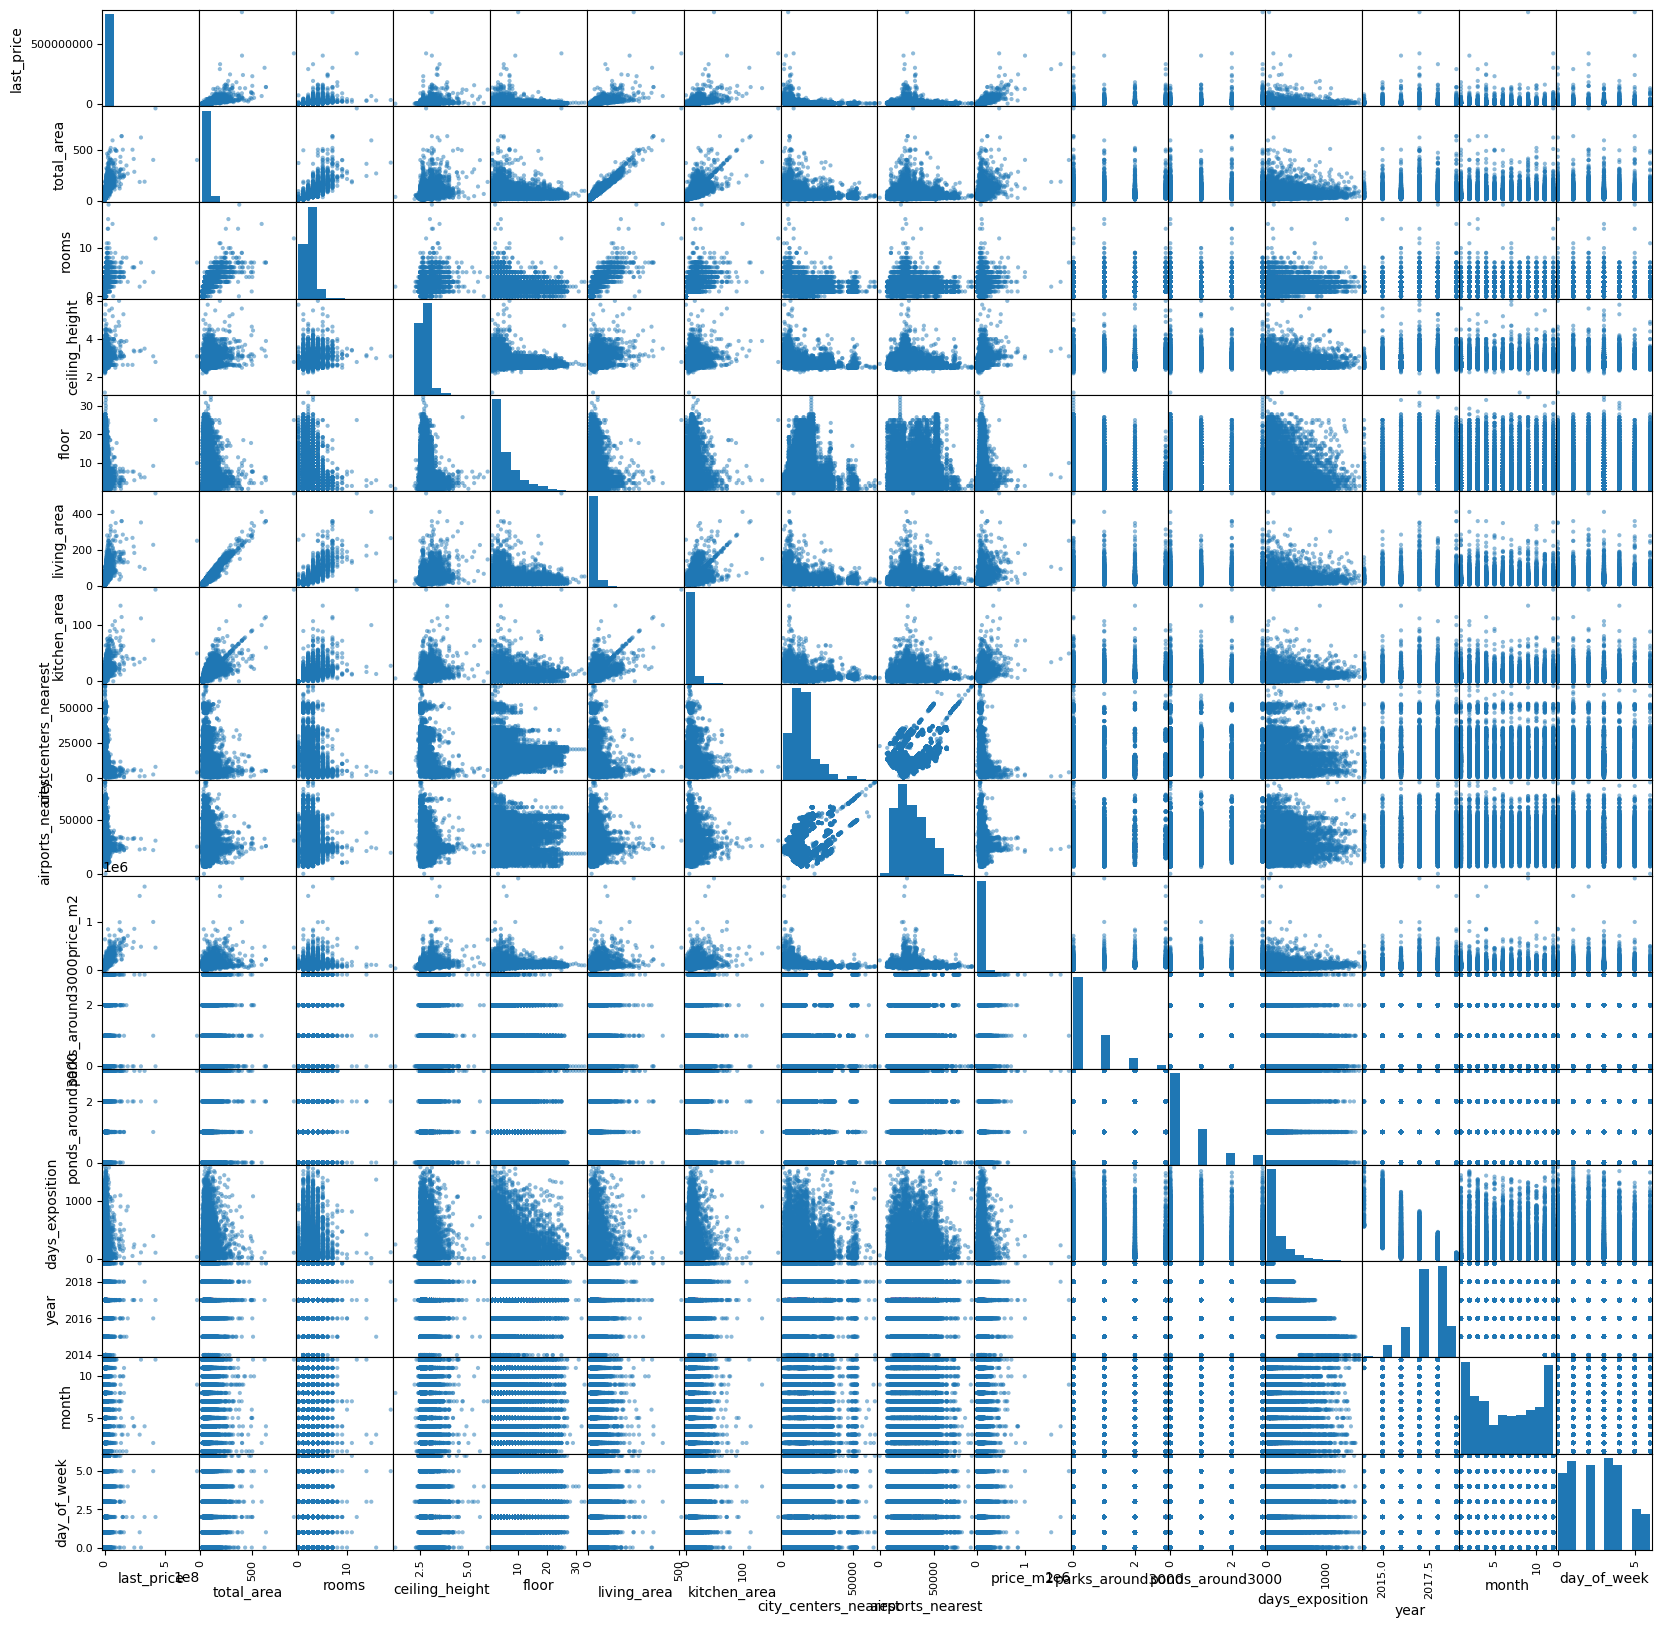

In [264]:
pd.plotting.scatter_matrix(data[[
    'last_price', 
    'total_area', 
    'rooms', 
    'ceiling_height', 
    'floor', 
    'living_area', 
    'kitchen_area', 
    'city_centers_nearest', 
    'airports_nearest', 
    'price_m2',
    'parks_around3000',
    'ponds_around3000',
    'days_exposition',
    'year',
    'month',
    'day_of_week'
]], figsize=(20, 20));

#### Общая площадь

<Axes: >

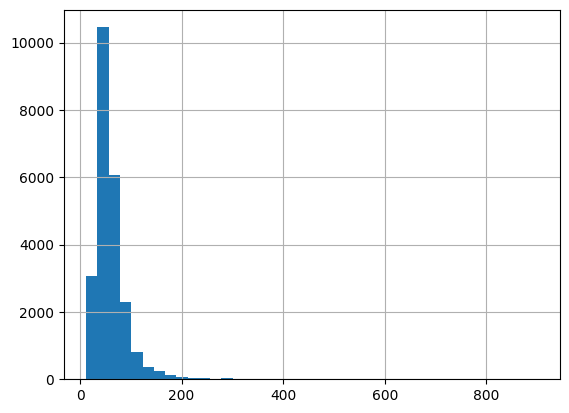

In [265]:
data['total_area'].hist(bins=40)

Ниже выведены статистические данные по столбцу с общей площадью

In [266]:
data['total_area'].describe()

count   23670.00
mean       60.34
std        35.66
min        12.00
25%        40.00
50%        52.00
75%        69.80
max       900.00
Name: total_area, dtype: float64

За счет объектов с большими площадями, которых немного, медиана смещена в левую сторону.

Изменение средней площади в зависимости от категории

<Axes: xlabel='cat_locality'>

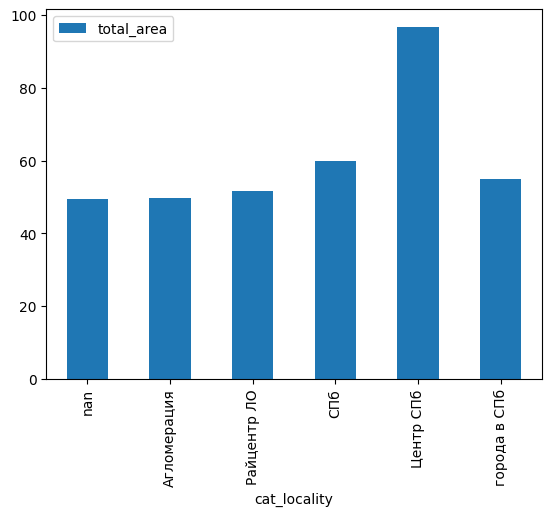

In [267]:
data.pivot_table(index='cat_locality', values='total_area').plot(kind='bar')

Построим гистограммы по категориям

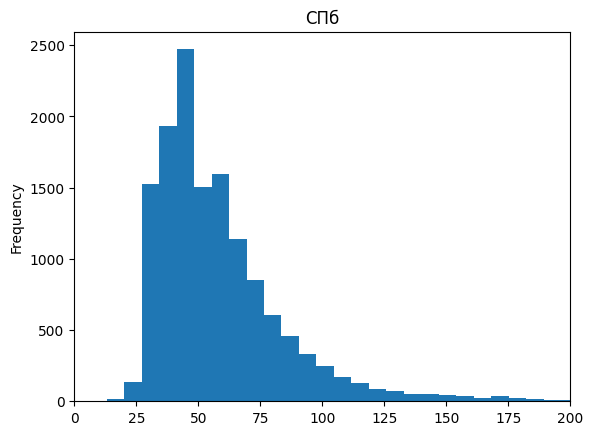

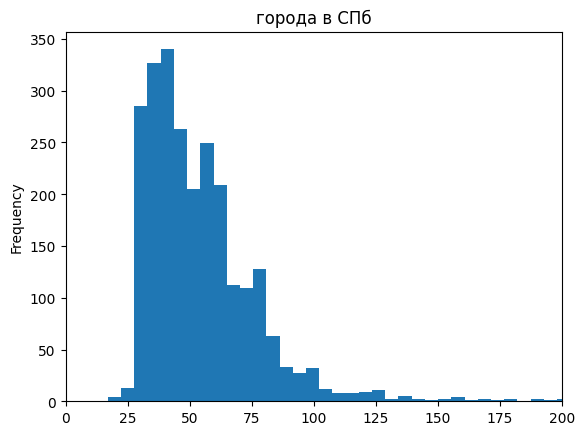

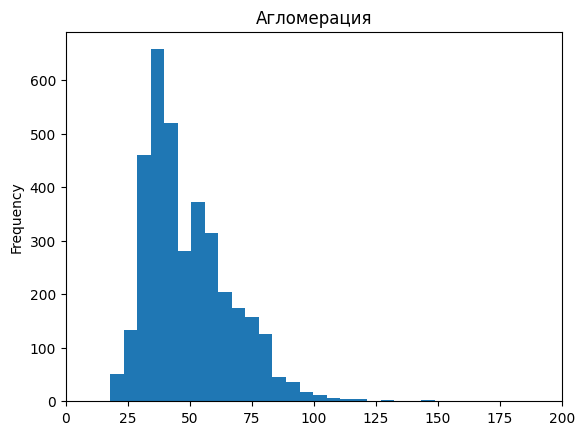

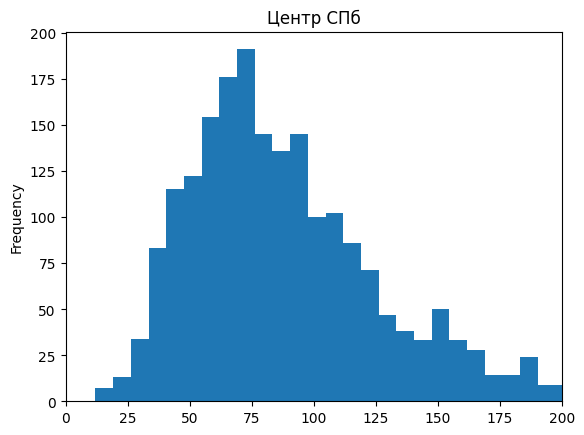

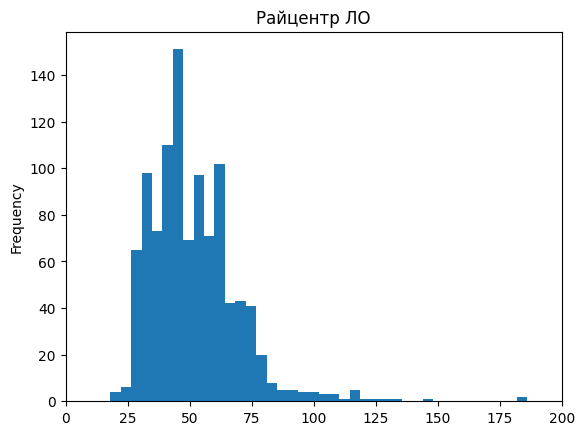

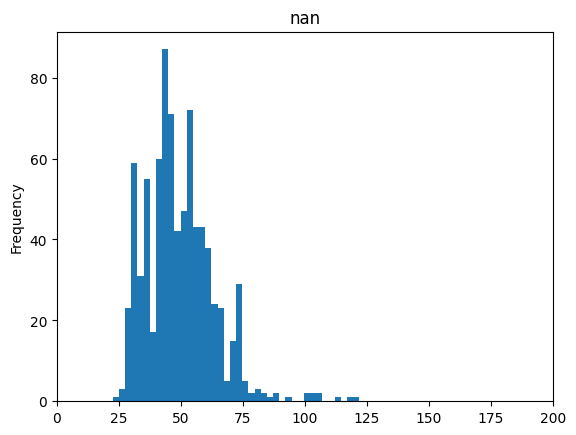

In [268]:
cat_loc_names = data['cat_locality'].unique()
for i in cat_loc_names:
    data.query('cat_locality == @i and total_area < 300')['total_area'].plot.hist(bins=40, xlim=(0, 200), title = i)
    plt.show()

Судя по данным гистограммам данные во всех категориях, кроме центра СПб рапсределены похожим образом

По диаграммам рассеяния можно увидеть следующие зависимости:

   Явные: зависимость цены от площади (прямая), жилой площади от общей (прямая), количества комнат от площади (прямая)
    
    
   Также прослеживаются следующие зависимости: у объектов с большой площадью высота потолков в среднем меньше, чем у объектов с меньшими площадями; объекты с большой площадью чаще расположены в домах с небольшим количеством этажей; также есть зависимость площади кухни от общей площади; объекты с большой площадью чаще расположены ближе к центру, объекты с большой площадью быстрее продаются (длительность экспозиции объявления меньше); наблюдается рост количества объявлений о продаже объектов с большими площадями с 2014 по 2019 год

<Axes: xlabel='total_area', ylabel='[year]'>

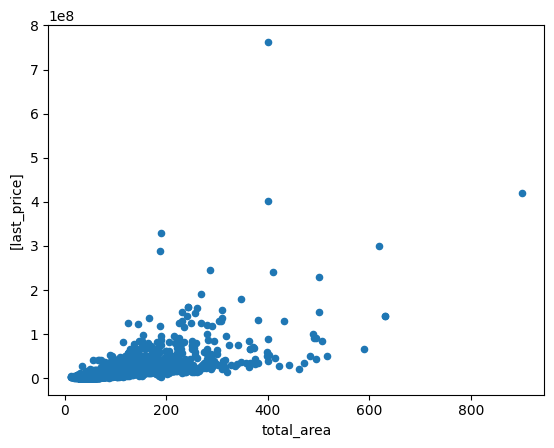

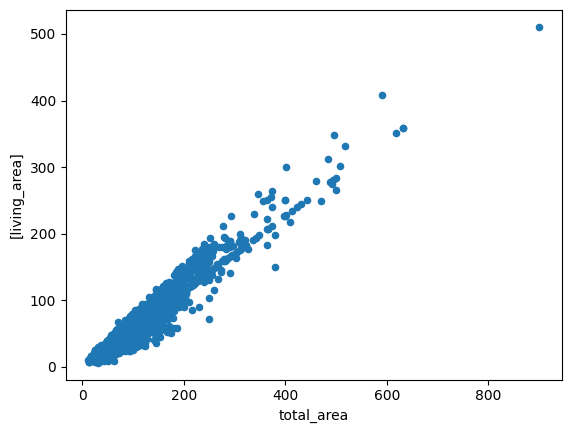

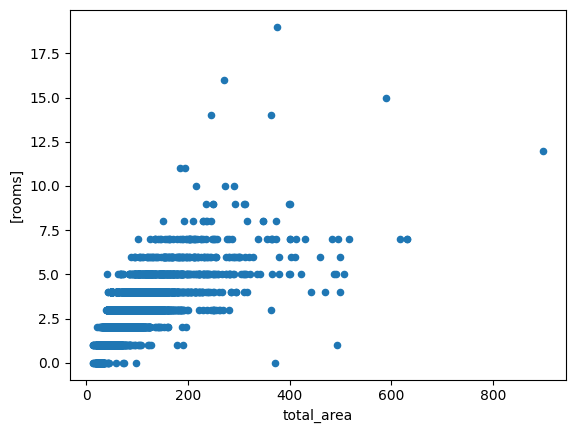

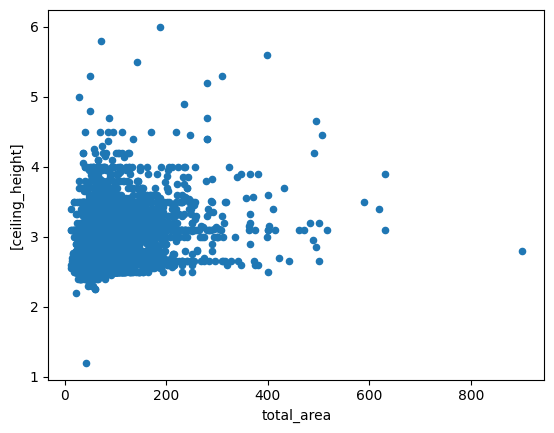

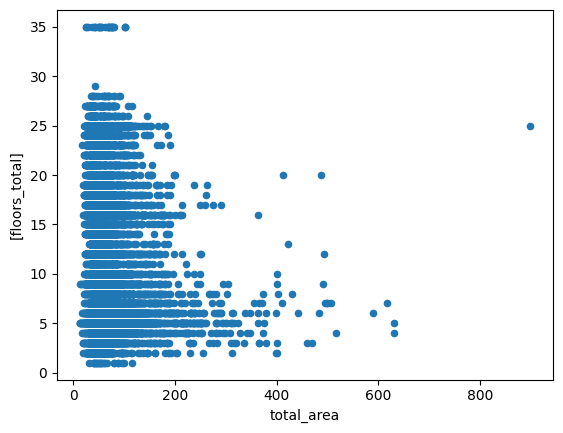

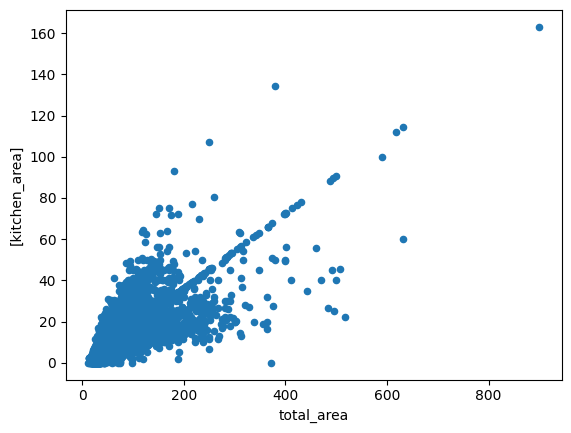

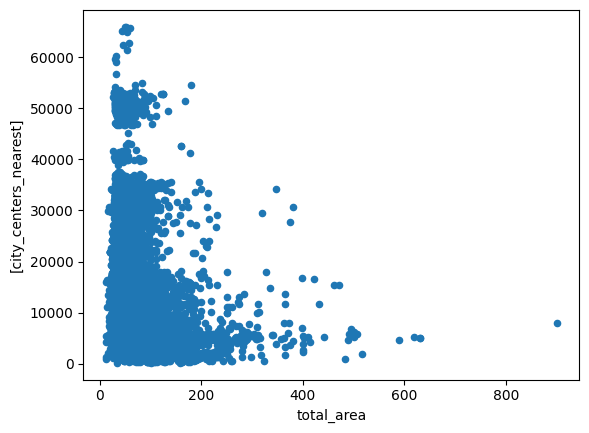

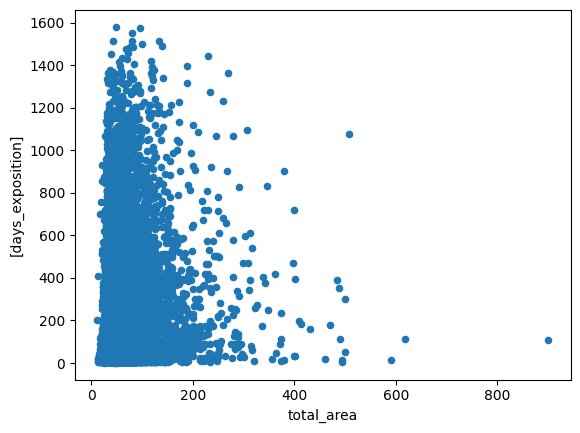

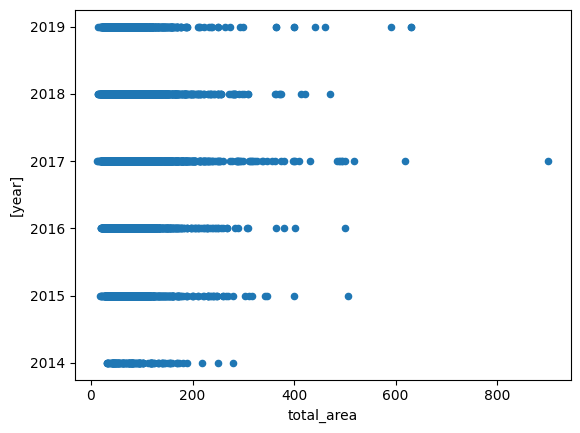

In [269]:
data.plot(kind='scatter', x='total_area', y=['last_price'])
data.plot(kind='scatter', x='total_area', y=['living_area'])
data.plot(kind='scatter', x='total_area', y=['rooms'])
data.plot(kind='scatter', x='total_area', y=['ceiling_height'])
data.plot(kind='scatter', x='total_area', y=['floors_total'])
data.plot(kind='scatter', x='total_area', y=['kitchen_area'])
data.plot(kind='scatter', x='total_area', y=['city_centers_nearest'])
data.plot(kind='scatter', x='total_area', y=['days_exposition'])
data.plot(kind='scatter', x='total_area', y=['year'])

#### Жилая площадь

In [270]:
data['living_area'].describe()

count   23670.00
mean       34.60
std        22.58
min         6.00
25%        19.00
50%        30.00
75%        42.00
max       510.81
Name: living_area, dtype: float64

Сравним распределения жилой площади и общей на гистограмме

<Axes: ylabel='Frequency'>

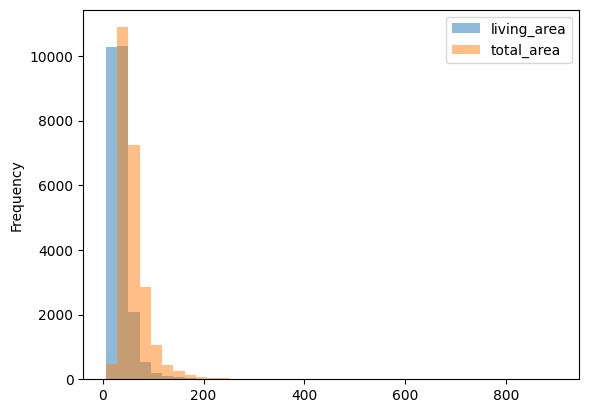

In [271]:
data[['living_area', 'total_area']].plot.hist(bins=40, alpha=0.5)

Гистограмма жилой площади смещена влево относительно общей при этом значения распределены похожим образом. На диаграммах рассеяния видны те же зависимости, наблюдаемые в исследовании столбца с общей площадью

#### Площадь кухни

In [272]:
data['kitchen_area'].describe()

count   23670.00
mean       10.43
std         6.28
min         0.00
25%         7.00
50%         9.00
75%        12.00
max       163.10
Name: kitchen_area, dtype: float64

<Axes: ylabel='Frequency'>

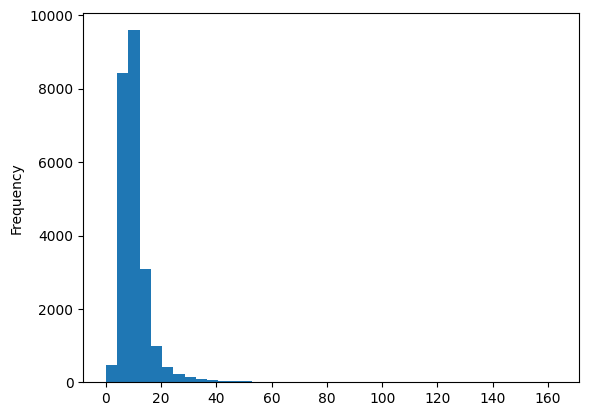

In [273]:
data['kitchen_area'].plot.hist(bins=40)

Площади кухни распределены таким же образом как и общие и жилые, но имеются объекты с нулевой площадью кухни.

<Axes: xlabel='total_area', ylabel='[living_area]'>

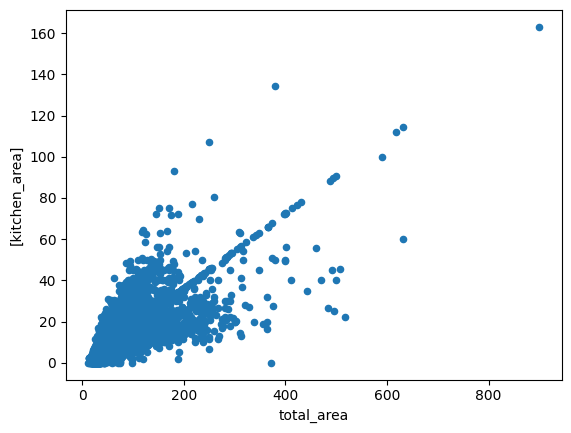

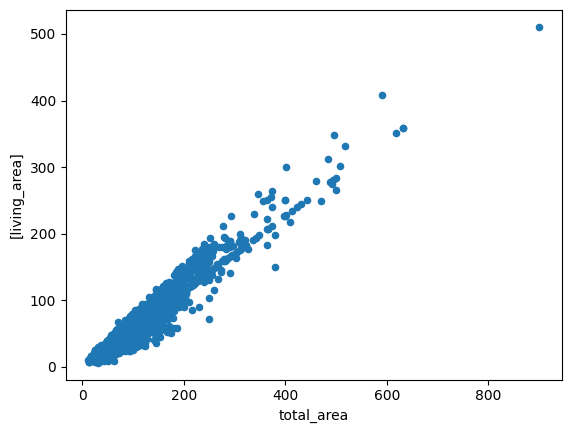

In [274]:
data.plot(kind='scatter', x='total_area', y=['kitchen_area'])
data.plot(kind='scatter', x='total_area', y=['living_area'])

При этом площадь кухни не всегда зависит от общей площади также как жилые площади. В объектах с большой площадью может быть относительно маленькая кухня, и наоборот

#### Цена объекта

In [275]:
data['last_price'].describe()

count       23670.00
mean      6542524.49
std      10890118.26
min        430000.00
25%       3409250.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

<Axes: >

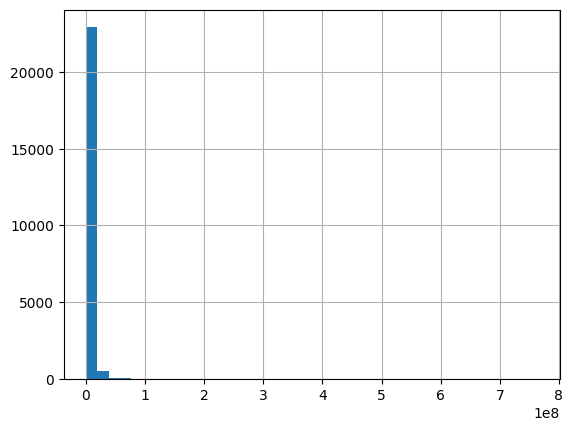

In [276]:
data['last_price'].hist(bins=40)

Из-за малого количества объектов с большими ценами (элитное жилье), нужно смотреть на распределение на отрезке близком к нулю. Также как и в случае с исследованием площадей, посторим гистограммы для каждой категории

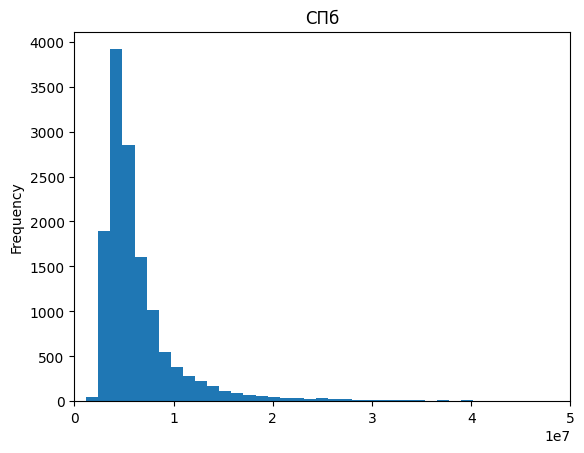

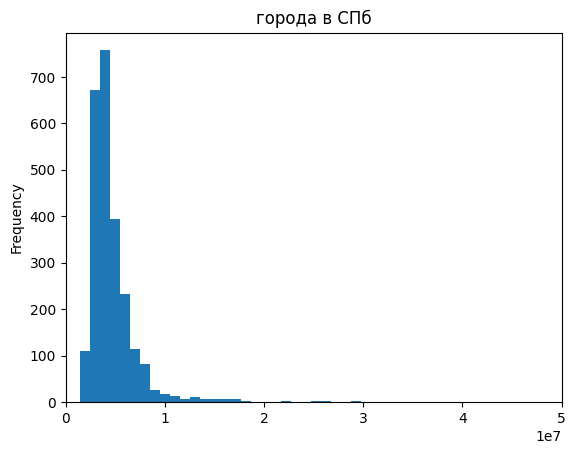

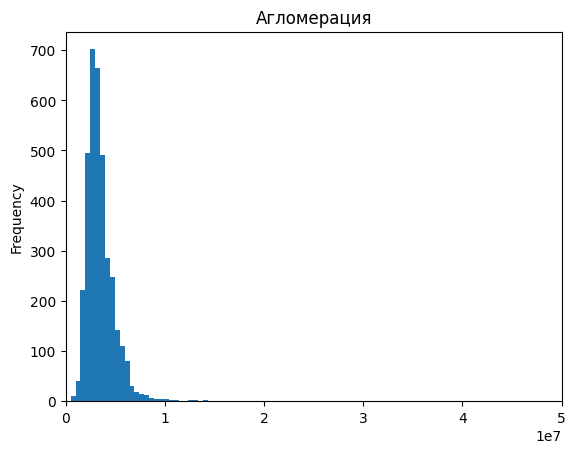

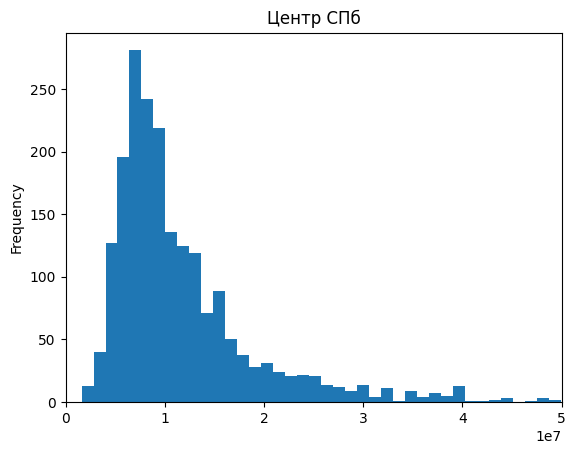

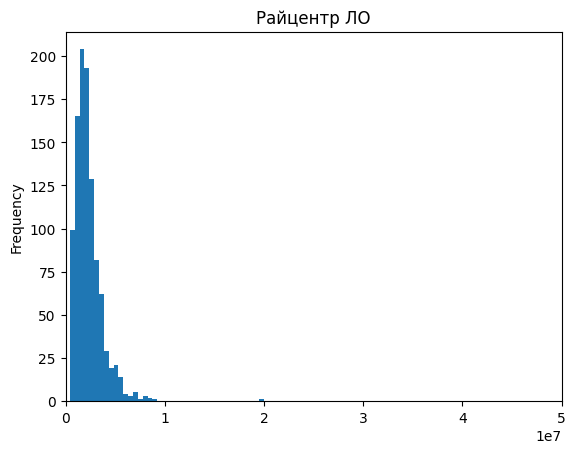

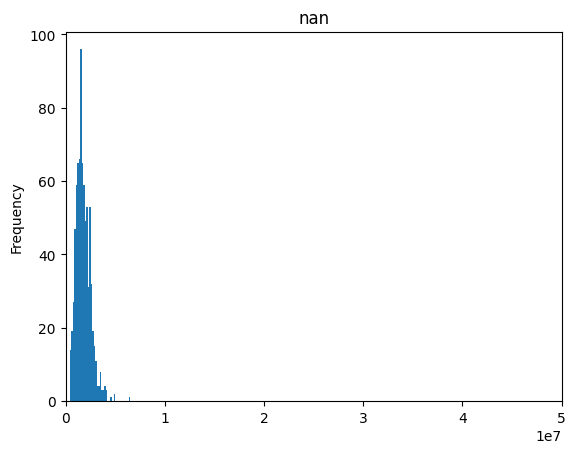

In [277]:
cat_loc_names = data['cat_locality'].unique()
for i in cat_loc_names:
    data.query('cat_locality == @i and last_price < 50000000')['last_price'].plot.hist(bins=40, xlim=(0,50000000), title = i)
    plt.show()

Распределения похожи на распределения площадей по категориям. В центре СПб медиана и распределение в целом расположены правее, а в Ленинградской области левее. Цены на квартиры в центре города выше, чем дальше расположен объект от центра, тем меньше его цена

<Axes: xlabel='cat_locality'>

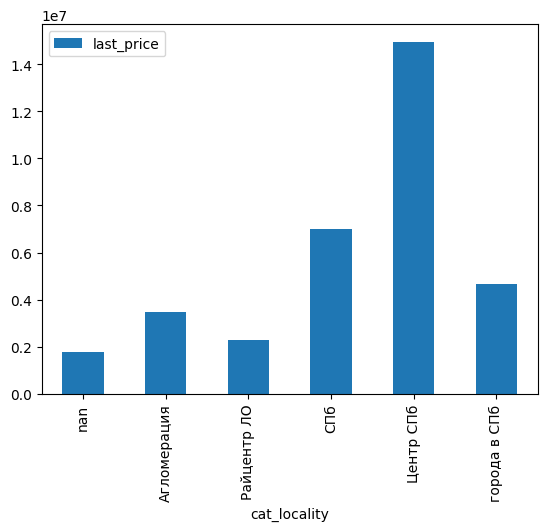

In [278]:
data.pivot_table(index='cat_locality', values='last_price').plot(kind='bar')

По диаграммам рассеяния видны те же завимсимости что и для общей площади. Есть более явная зависимость цены от количества комнат

<Axes: xlabel='last_price', ylabel='[rooms]'>

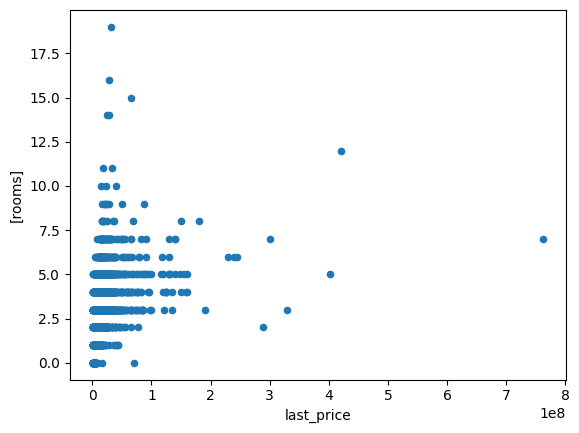

In [279]:
data.plot(kind='scatter', x='last_price', y=['rooms'])

#### Количество комнат

In [280]:
data['rooms'].unique().max()

19

<Axes: ylabel='Frequency'>

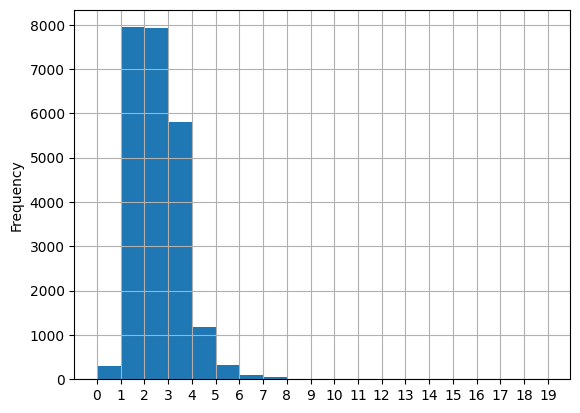

In [281]:
data['rooms'].plot(kind='hist', bins=data['rooms'].unique().max(), xticks=range(data['rooms'].unique().max()+1), grid=True)

Среди объектов преобладают квартиры с 1, 2 и 3 комнатами. Проверим зависимость от категории

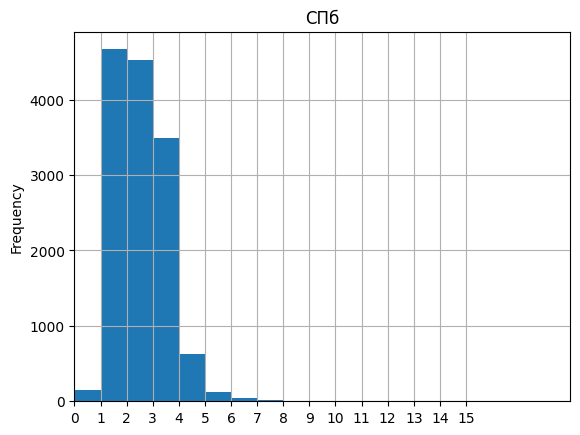

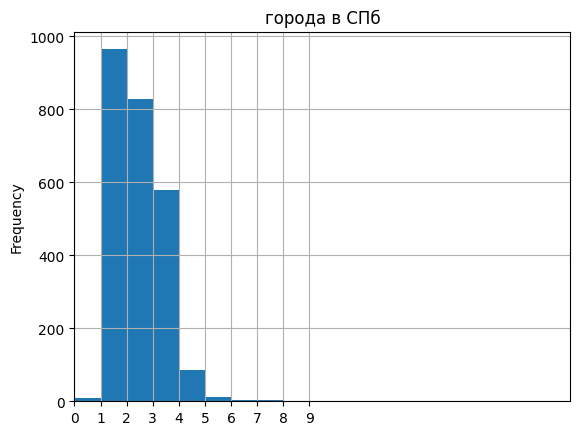

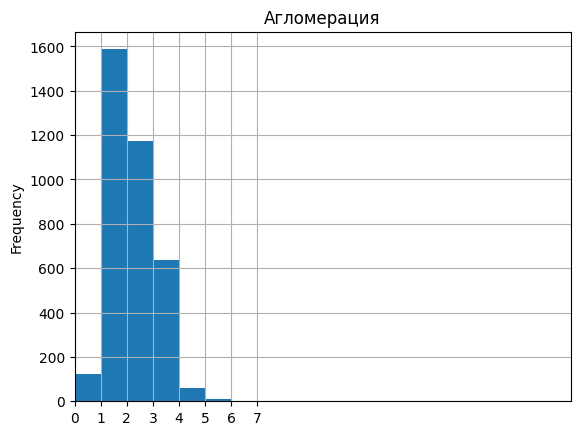

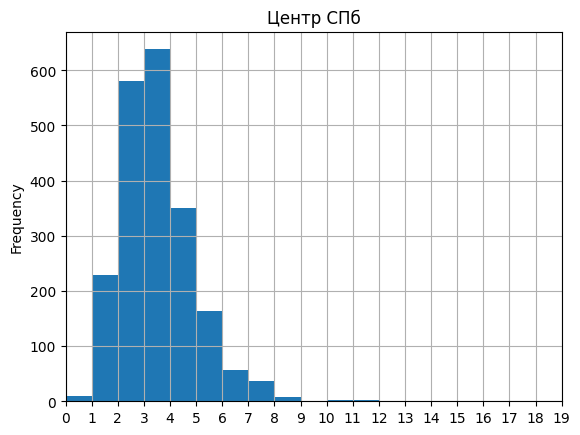

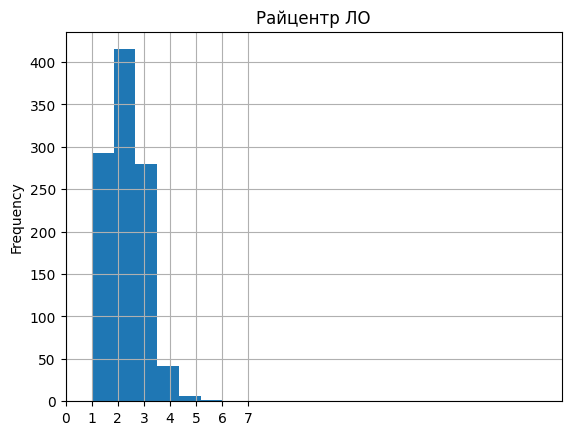

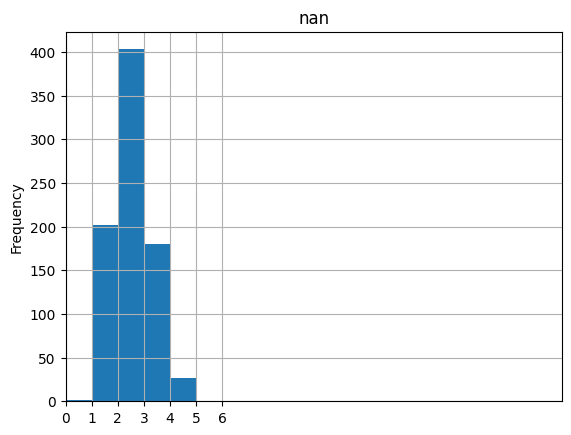

In [282]:
for i in cat_loc_names:
    data.query('cat_locality == @i')['rooms'].plot.hist(
        bins=data.query('cat_locality == @i')['rooms'].unique().max(),
        xlim=(0,19),
        xticks=range(data.query('cat_locality == @i')['rooms'].unique().max()+2),
        title = i,
        grid=True
    )
    plt.show()

В центре СПб, а также в ЛО значительно меньше однокомнатных квартир, но в центре СПб также сосредоточены многокомнатные квартиры с количеством комнат больше 3. Это же можно наблюдать на диаграмме рассеяния

<Axes: xlabel='city_centers_nearest_km'>

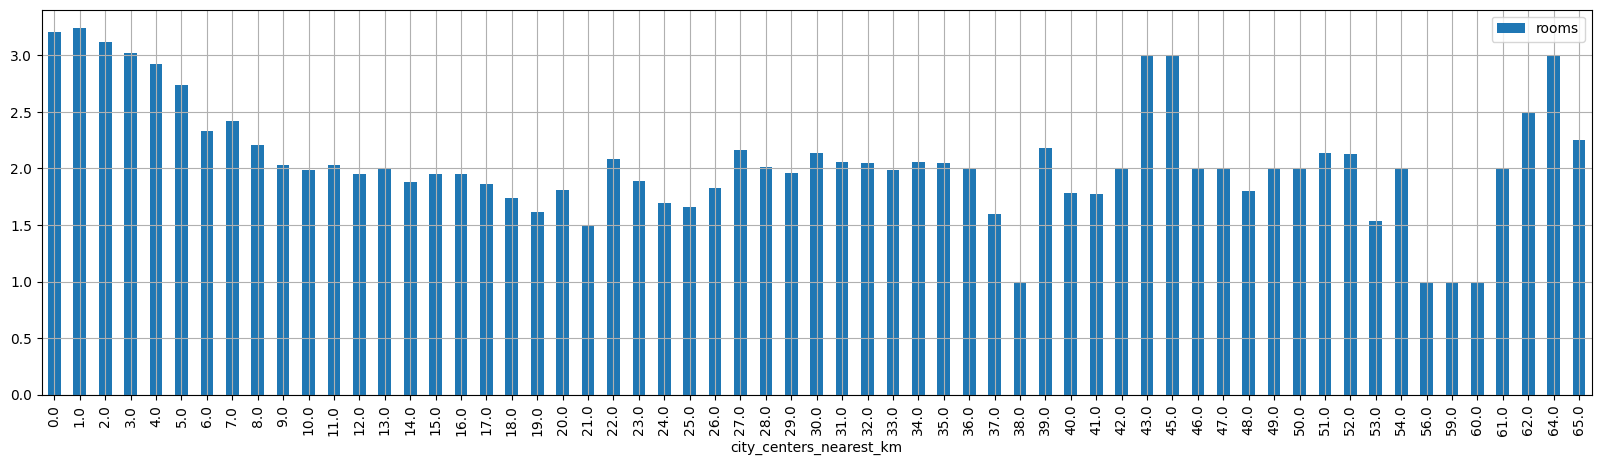

In [283]:
data.pivot_table(index='city_centers_nearest_km', values='rooms').plot(kind='bar', figsize=(20,5), grid=True)

Также видно, что студий вне радиуса 30 км нет, также на гистограммах выше они практически отсутсвуют в ЛО, а значит все студии находятся в границах Санкт-Петербурга

#### Высота потолков

<Axes: >

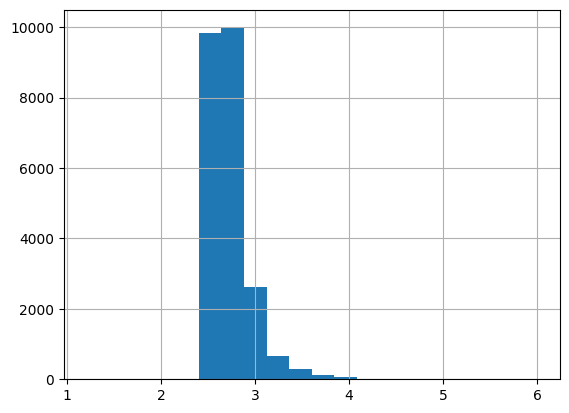

In [284]:
data['ceiling_height'].hist(bins=20)

In [285]:
data['ceiling_height'].describe()

count   23670.00
mean        2.71
std         0.24
min         1.20
25%         2.55
50%         2.65
75%         2.75
max         6.00
Name: ceiling_height, dtype: float64

Высота потолков чаще всего составляет 2,5-2,7 м. Судя по диаграммам рассеяния высота потолков выше при меньших расстояниях до центра. Построим гистограмму значений высот потолков для центра СПб

<Axes: >

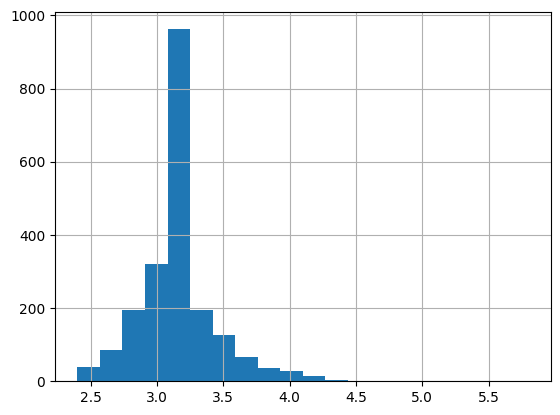

In [286]:
data.query('cat_locality == "Центр СПб"')['ceiling_height'].hist(bins=20)

Здесь высота потолков обычно составляет 3,2 м

#### Этаж квартиры

In [287]:
data['floor'] = data['floor'].astype(int)

<Axes: ylabel='Frequency'>

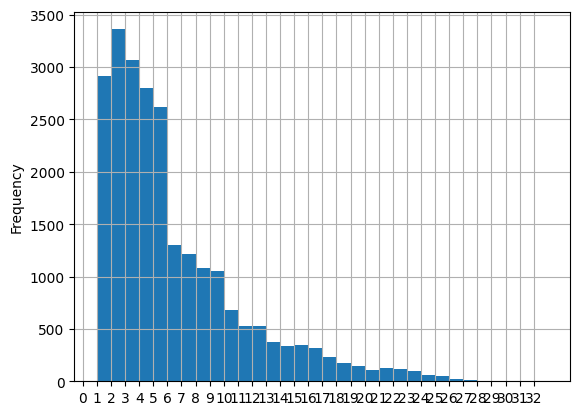

In [288]:
data['floor'].plot(kind='hist', bins=data['floor'].unique().max()-1, xticks=range(data['floor'].unique().max()), grid=True)

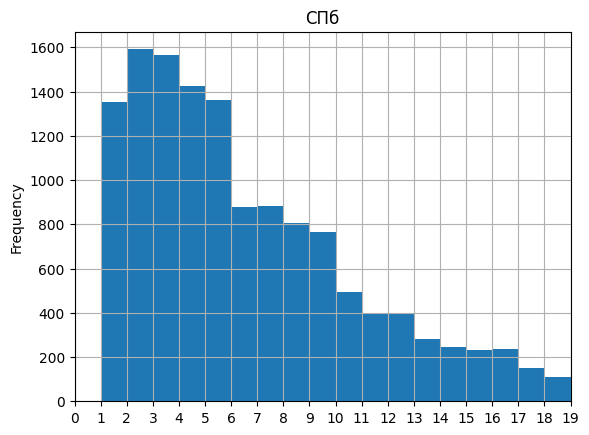

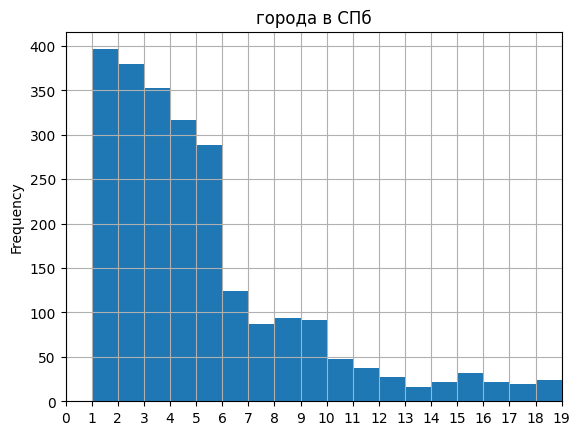

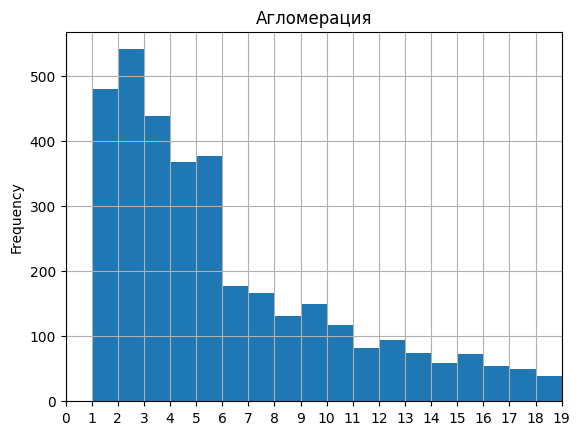

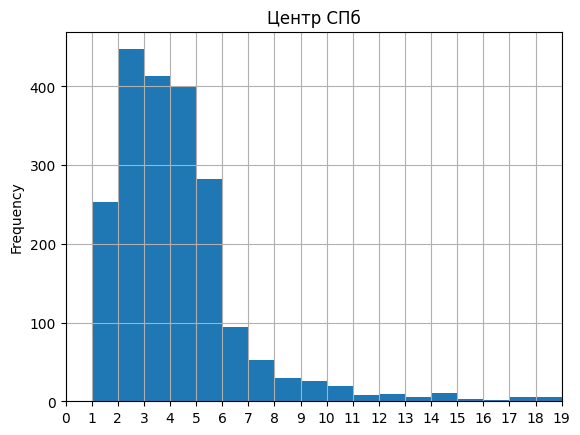

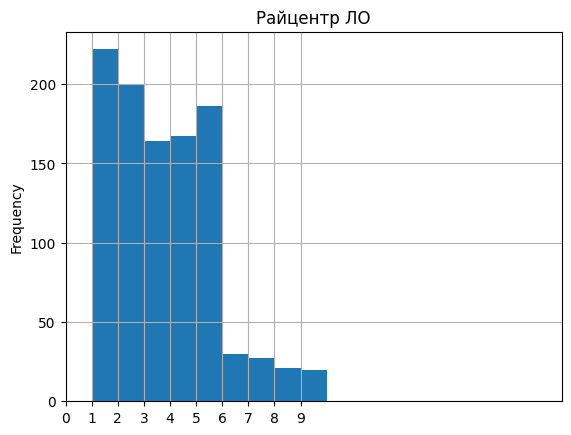

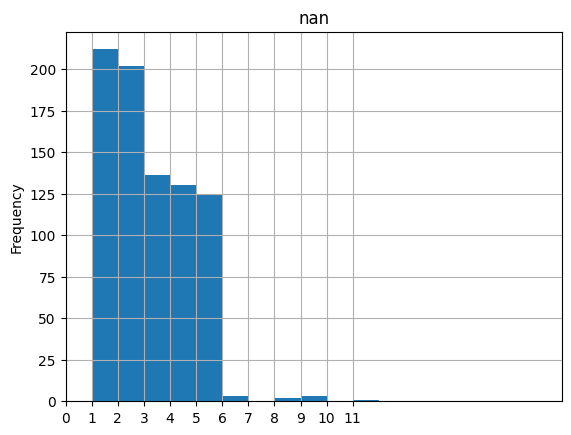

In [289]:
for i in cat_loc_names:
    data.query('cat_locality == @i')['floor'].plot.hist(
        bins=data.query('cat_locality == @i')['floor'].unique().max()-1,
        xlim=(0,19),
        xticks=range(data.query('cat_locality == @i')['floor'].unique().max()),
        title = i,
        grid=True
    )
    plt.show()

Из-за большего количества низкоэтажных зданий в центре СПб наблюдается меньшее количество объектов на этажах больше 5. Такая же этажность зданий наблюдается в ЛО

Проверим в какой категории тип этажа влияет на цену:

<Axes: xlabel='cat_locality'>

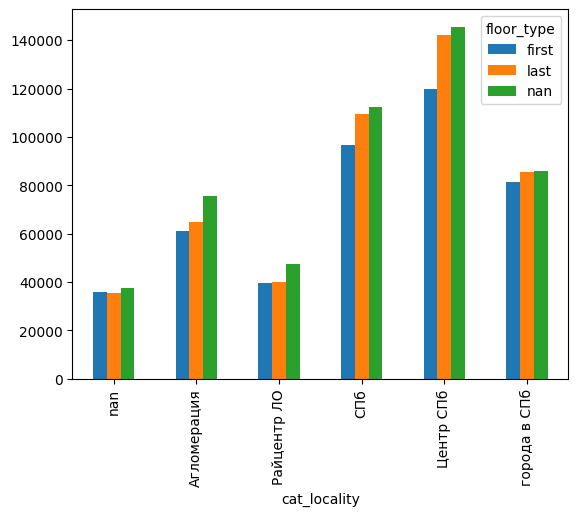

In [290]:
data.pivot_table(
    index='cat_locality', columns='floor_type', values='price_m2'
).plot(kind='bar')

В Ленинградской области и в городах подчиненных СПб этаж не влияет на цену. В центре СПб и СПб у объектов на 1 этаже цена значительгно ниже. В райцентрах ЛО и агломерации СПб также ниже цена у объектов на последних этажах.

#### Общее количество этажей в доме

<Axes: ylabel='Frequency'>

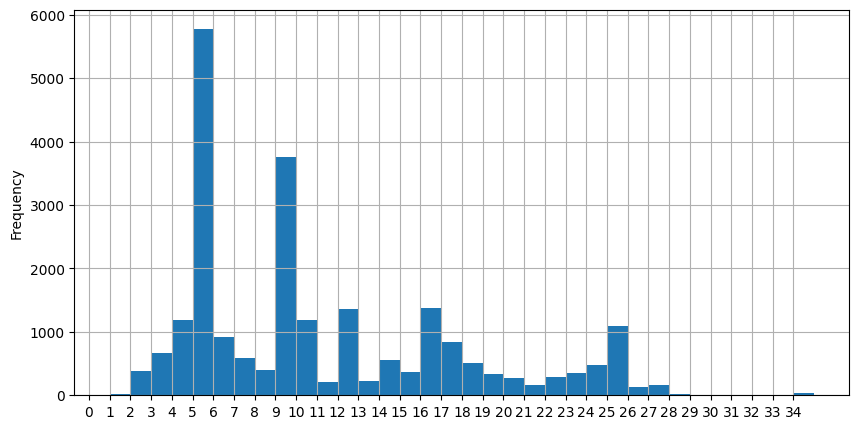

In [291]:
data['floors_total'].plot(
    kind='hist', 
    bins=data['floors_total'].unique().max()-1, 
    xticks=range(data['floors_total'].unique().max()), 
    grid=True,
    figsize=(10,5)
)

На графике видно, что больше всего зданий с 5 и 9 этажами. Посмотрим на распределения по категориям

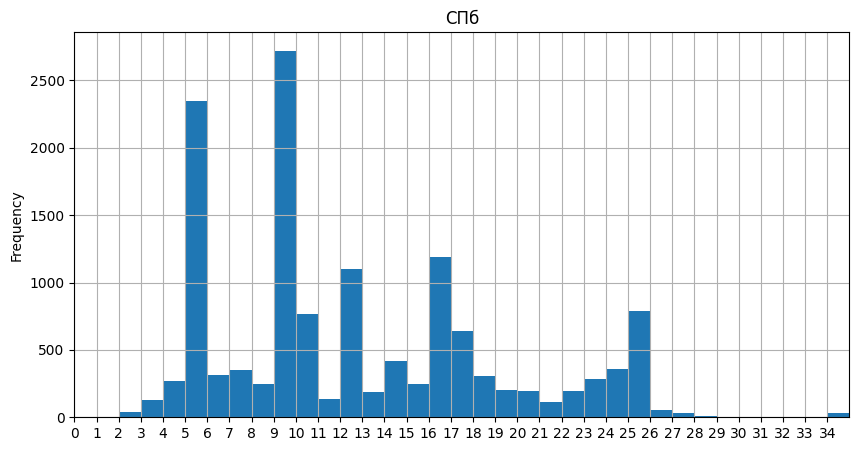

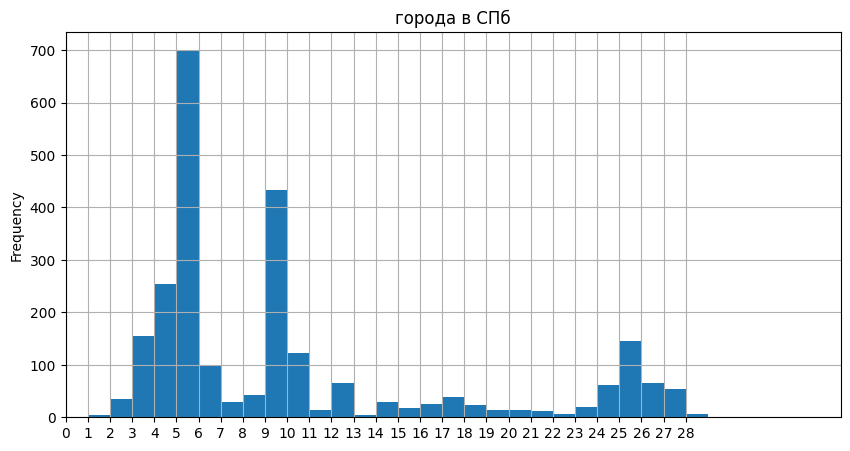

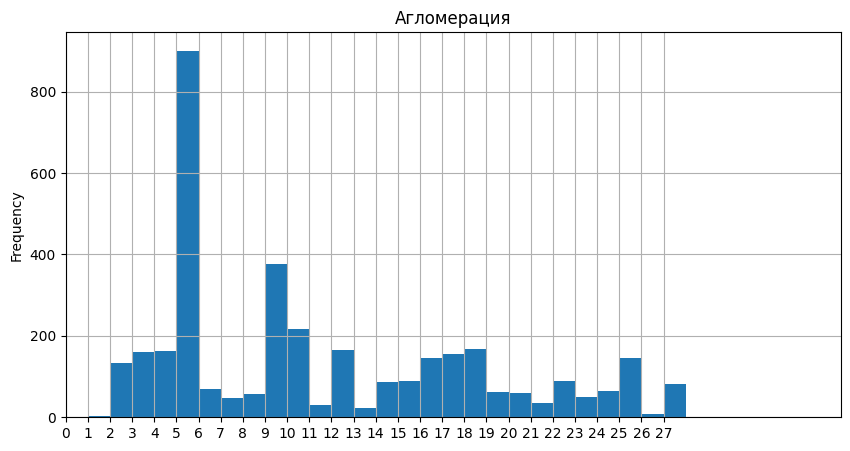

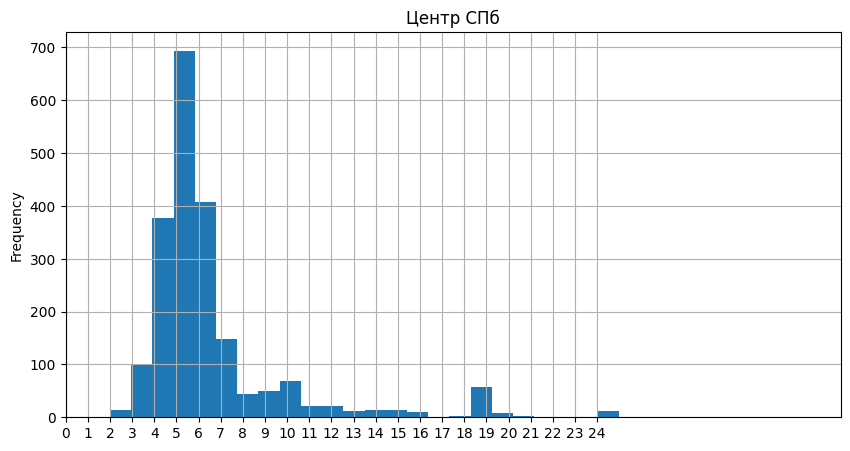

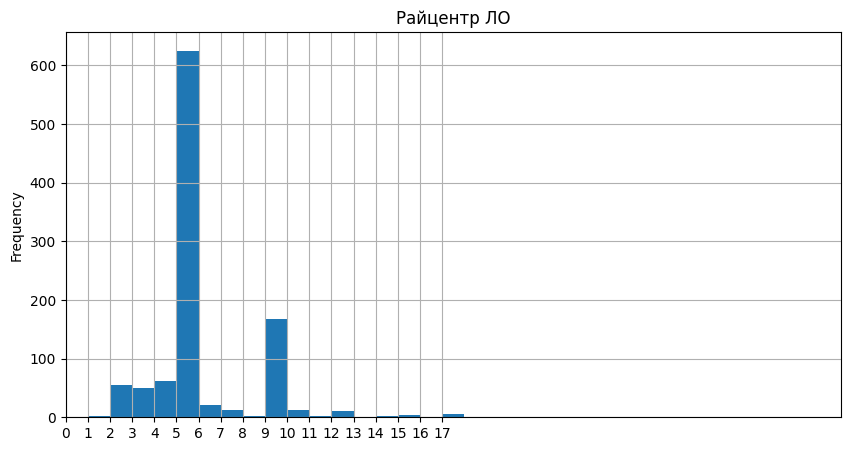

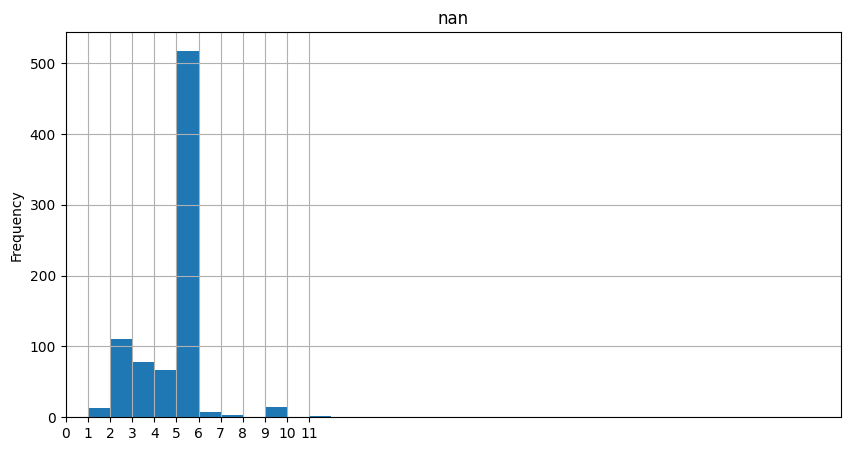

In [292]:
for i in cat_loc_names:
    data.query('cat_locality == @i')['floors_total'].plot.hist(
        bins=data.query('cat_locality == @i')['floors_total'].unique().max()-1,
        xlim=(0,35),
        xticks=range(data.query('cat_locality == @i')['floors_total'].unique().max()),
        title = i,
        grid=True,
        figsize=(10,5)
    )
    plt.show()

В СПб самые распространенные этажности: 5, 9, 10, 12, 16, 25

В городах, подчиненных СПб: 5, 9, 25

В агломерации СПб: 5, 9, а также 15-20.

В центре СПб: 4, 5, 6

В городах ЛО: 5, 9

В ЛО: 5

В СПб присутсвуют все самые распространенные этажности, в центре Петербурга преобладает малоэтажная застройка, в городах, подчиненных СПб и агломерации СПб больше многоэтажных зданий, а в ЛО пятиэтажек


#### Расстояния до центра, аэропорта и других объектов

<Axes: ylabel='Frequency'>

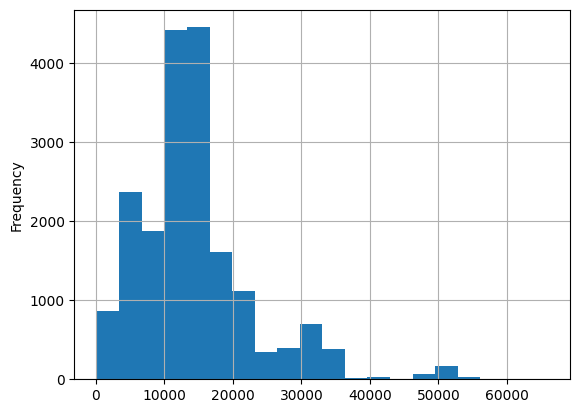

In [293]:
data['city_centers_nearest'].plot(kind='hist', bins=20, grid=True)

Наибольшее количество объектов расположено между 10 и 20 км от центра

<Axes: xlabel='city_centers_nearest_km'>

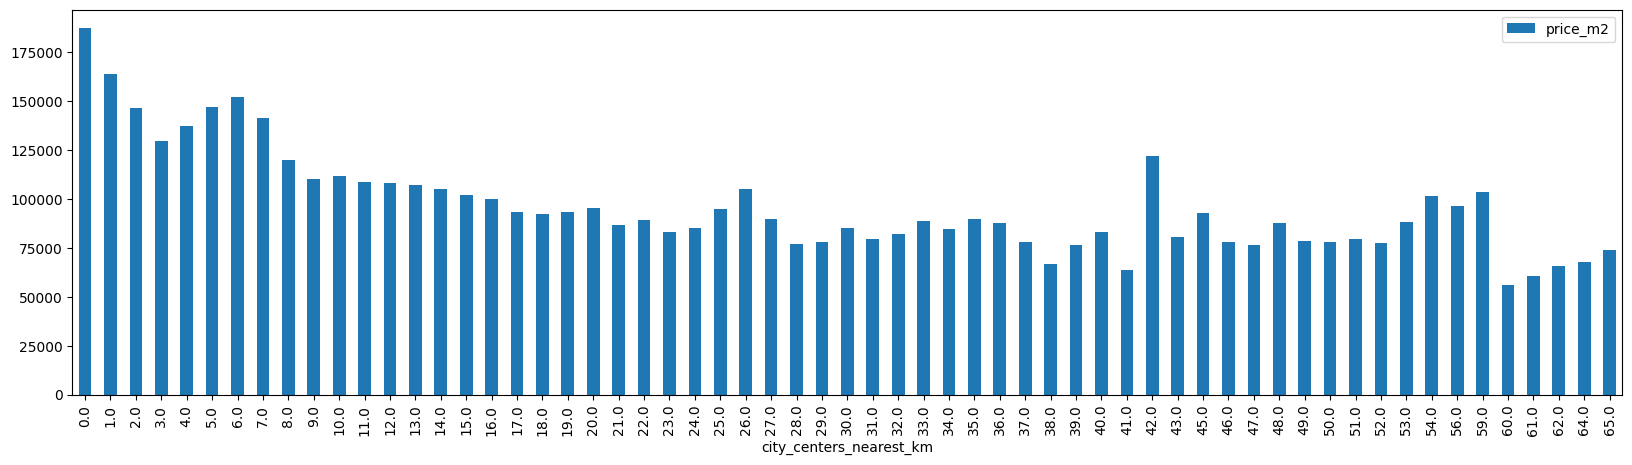

In [294]:
data.pivot_table(index='city_centers_nearest_km', values='price_m2').plot(kind='bar', figsize=(20,5))

Цена квадратного метра уменьшается с расстоянием от центра

<Axes: xlabel='airports_nearest_km'>

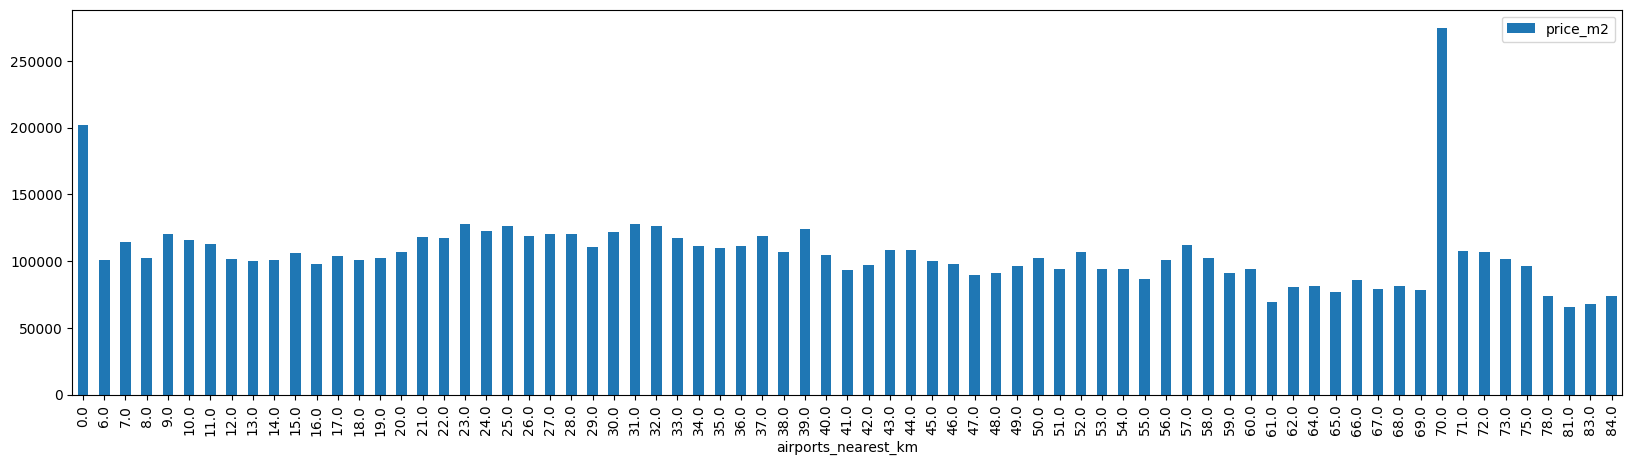

In [295]:
data.pivot_table(index='airports_nearest_km', values='price_m2').plot(kind='bar', figsize=(20,5))

При этом расстояние до аэропорта не так сильно влияет на цену квадратного метра

<Axes: ylabel='Frequency'>

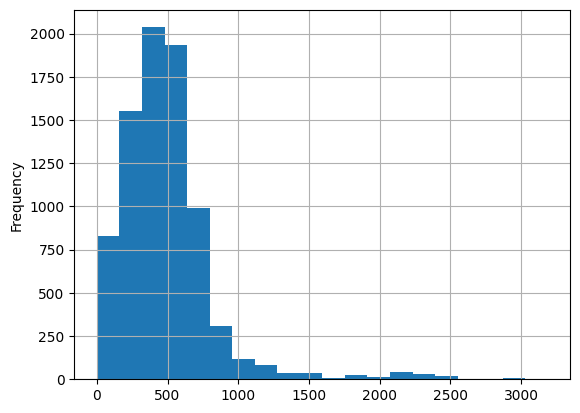

In [296]:
data['parks_nearest'].plot(kind='hist', bins=20, grid=True)

В основном объекты расположены на расстоянии 500 м до парка. Проверим, как количество находящихся рядом парков влияет на цену квадратного метра

<Axes: xlabel='cat_locality'>

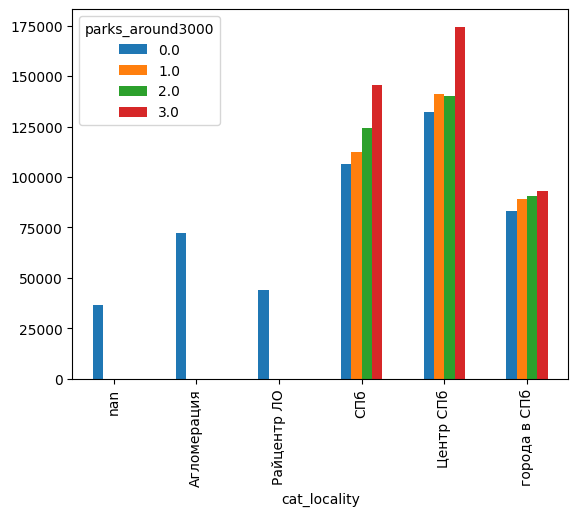

In [297]:
data.pivot_table(
    index='cat_locality', columns='parks_around3000', values='price_m2'
).plot(kind='bar')

Данные по количеству парков есть только для СПб, при этом в центре города сильно влияет на цену расположение у 3 парков, а в городах, подчиненных СПб цена в зависимости от наличия парка и их количества меняется мало

<Axes: xlabel='city_centers_nearest_km'>

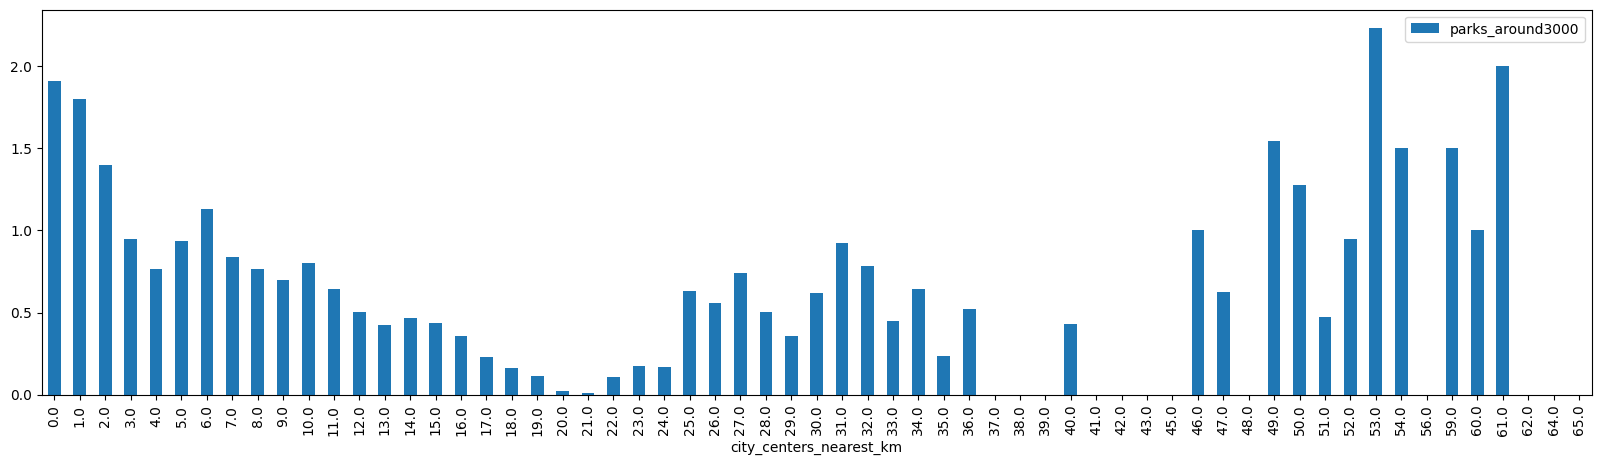

In [298]:
data.pivot_table(
    index='city_centers_nearest_km', values='parks_around3000'
).plot(kind='bar', figsize=(20,5))

При этом больше парков расположено в центре и на окраине, а значит в городах, подчиненных СПб

#### День и месяц публикации

<Axes: ylabel='Frequency'>

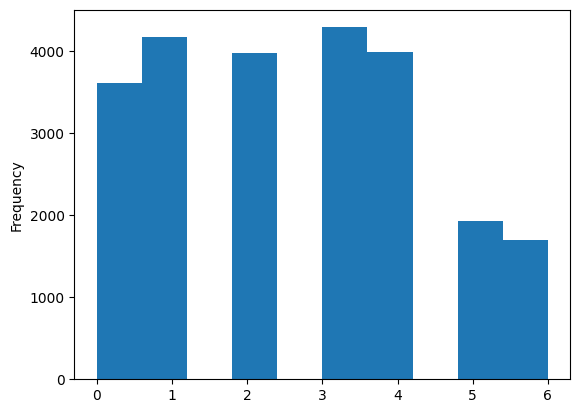

In [299]:
data['day_of_week'].plot(kind='hist')

Публикаций по субботам и воскресеньям в два раза меньше, объявления размещают также риэлторы, у которых выходные в данные дни

<Axes: >

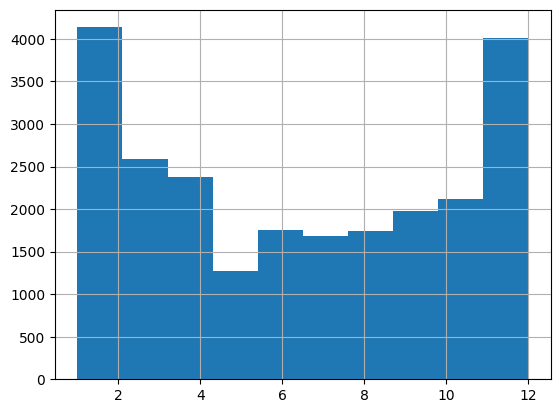

In [300]:
data['month'].hist()

По данной гистограмме видно, что объявления размещаются чаще всего в декабре и январе

Посмотрим, как быстро продаются квартиры

<Axes: >

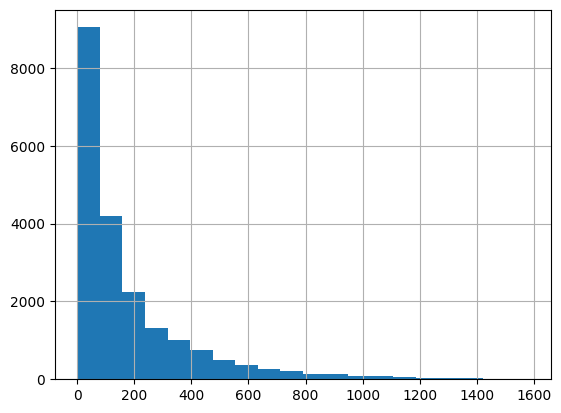

In [301]:
data['days_exposition'].hist(bins=20)

In [302]:
data['days_exposition'].describe()

count   20491.00
mean      181.02
std       219.81
min         1.00
25%        45.00
50%        95.00
75%       232.00
max      1580.00
Name: days_exposition, dtype: float64

В среднем квартира продается за 181 день, при этом медиана данного показателя 95 дней, что говорит о том, что есть квартиры, которые продаются очень долго.

<Axes: >

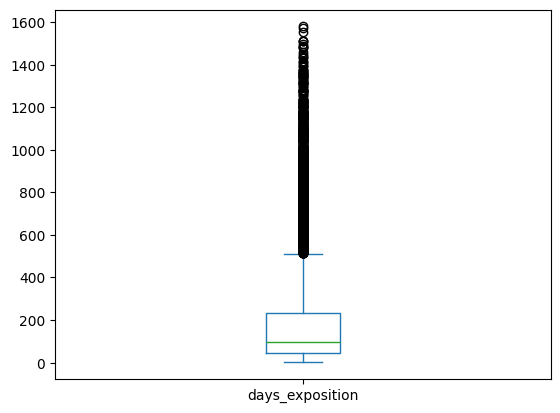

In [303]:
data['days_exposition'].plot(kind='box')

Посчитаем границу выбросов

In [304]:
maxi(data['cat_locality'].unique(), 'days_exposition')

512.5

Можно сказать, что быстрой будет считаться продажа меньше чем за 45 дней (25% квантиль), долгой - больше чем за 232 дня (75% квантиль). 

Объекты, которые продавались больше 512 дней - выбросы для данного распределения


Строим графики зависимости цены от известных нам параметров объектов

<Axes: xlabel='total_area', ylabel='[last_price]'>

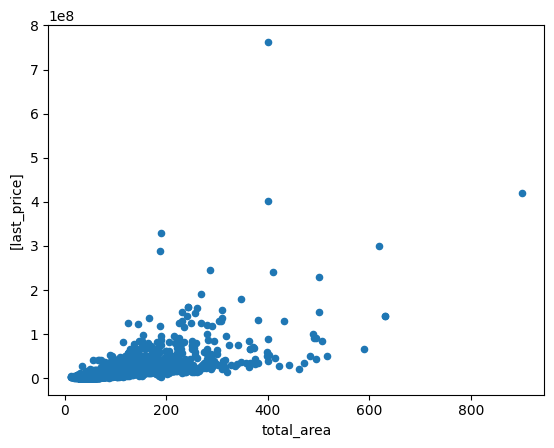

In [305]:
data.plot(kind='scatter', x='total_area', y=['last_price'])

<Axes: xlabel='living_area', ylabel='[last_price]'>

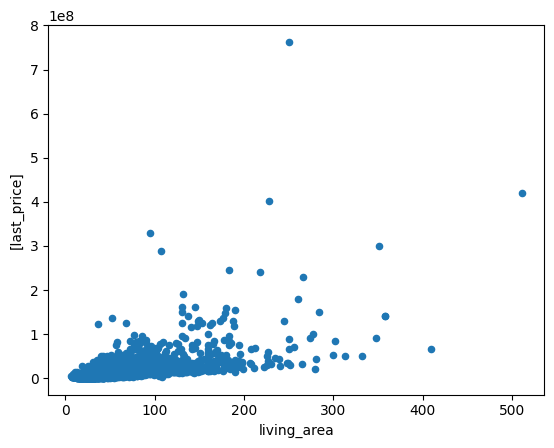

In [306]:
data.plot(kind='scatter', x='living_area', y=['last_price'])

<Axes: xlabel='kitchen_area', ylabel='[last_price]'>

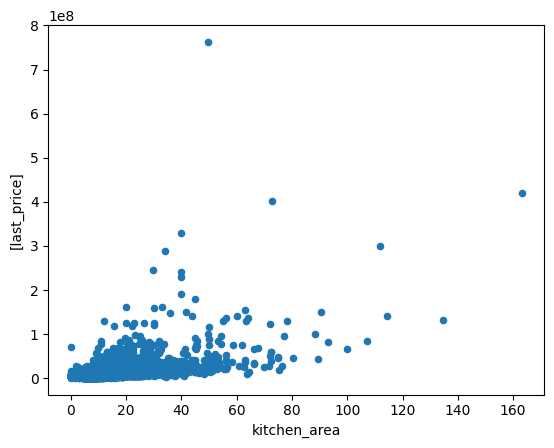

In [307]:
data.plot(kind='scatter', x='kitchen_area', y=['last_price'])

<Axes: xlabel='rooms', ylabel='[last_price]'>

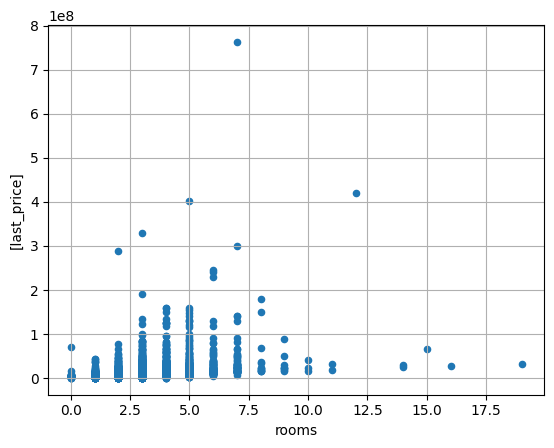

In [308]:
data.plot(kind='scatter', x='rooms', y=['last_price'], grid=True)

<Axes: xlabel='floor_type'>

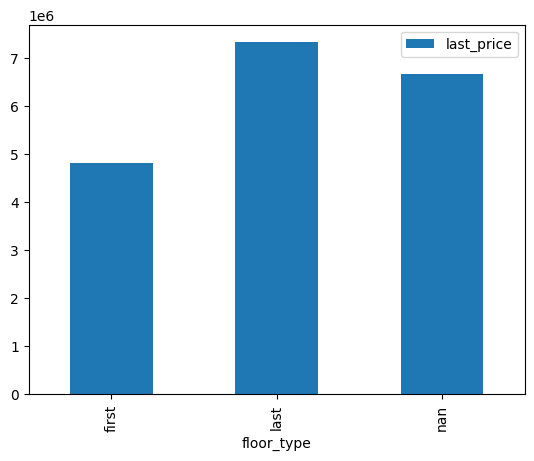

In [309]:
data.pivot_table(index='floor_type', values='last_price').plot(kind='bar')

<Axes: xlabel='month'>

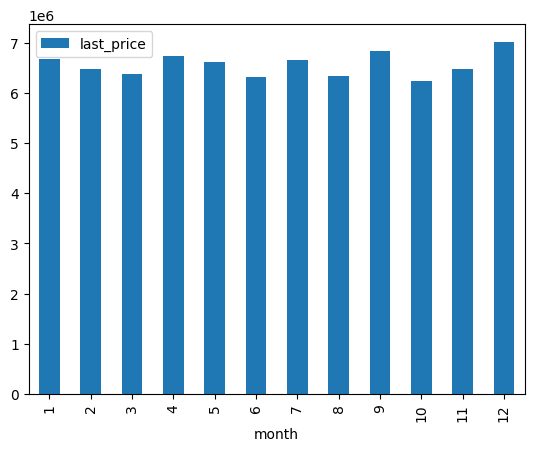

In [310]:
data.pivot_table(index='month', values='last_price').plot(kind='bar')

<Axes: xlabel='day_of_week'>

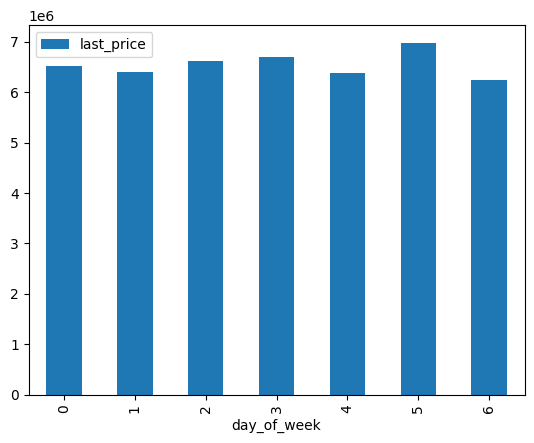

In [311]:
data.pivot_table(index='day_of_week', values='last_price').plot(kind='bar')

Из построенных выше графиков можно сделать вывод о том, что из данных параметров большее влияние на цену оказывают общая и жилая площади и этаж.

Проверим это, найдя коэффициенты корреляции

In [312]:
data.corr(numeric_only=True)['last_price'].sort_values()

city_centers_nearest      -0.21
city_centers_nearest_km   -0.21
ponds_nearest             -0.08
kitchen_area_part         -0.06
area_part                 -0.04
airports_nearest_km       -0.04
airports_nearest          -0.04
year                      -0.04
studio                    -0.03
parks_nearest             -0.02
open_plan                 -0.01
floors_total              -0.01
day_of_week                0.00
month                      0.00
balcony                    0.01
living_area_part           0.02
is_apartment               0.03
floor                      0.03
days_exposition            0.08
total_images               0.10
parks_around3000           0.20
ponds_around3000           0.21
ceiling_height             0.34
rooms                      0.36
kitchen_area               0.55
living_area                0.60
total_area                 0.65
price_m2                   0.74
last_price                 1.00
Name: last_price, dtype: float64

Предположения, сделанное исходя из анализа графиков оправ

Находим цены квадратного метра в населенных пунктах с наибольшим количеством объявлений

In [313]:
locality_price = data.pivot_table(index='locality_name_short', values='price_m2', aggfunc=['mean', 'count'])
locality_price.columns = ['mean', 'count']
locality_price.sort_values('count', ascending=False).head(10)

mean  count
locality_name_short                 
санкт-петербург     114755.15  15746
мурино               86087.51    590
кудрово              95324.93    472
шушары               78677.36    440
всеволожск           68654.47    398
пушкин              103125.26    368
колпино              75424.58    338
парголово            90175.91    327
гатчина              68935.19    306
выборг               58141.91    237

Населенный пункт с самой низкой ценой квадратного метра

In [314]:
locality_price.sort_values('mean').head(1)

mean  count
locality_name_short                
старополье          11206.22      3

Населенный пункт с самой высокой ценой квадратного метра

In [315]:
locality_price.sort_values('mean').tail(1)

mean  count
locality_name_short                 
зеленогорск         115122.80     24

In [316]:
price_km = data.query('locality_name_short == "санкт-петербург"').pivot_table(index='city_centers_nearest_km', values='price_m2', aggfunc=['mean', 'count'])
price_km.columns = ['mean', 'count']
price_km

mean  count
city_centers_nearest_km                 
0.00                    187324.13     86
1.00                    163612.13    241
2.00                    146662.86    307
3.00                    129454.20    529
4.00                    137148.29    916
5.00                    147202.73    768
6.00                    152206.33    468
7.00                    141399.73    407
8.00                    119667.65    675
9.00                    110048.50    693
10.00                   111698.44    912
11.00                   108809.05   1474
12.00                   108286.80   1516
13.00                   107245.48   1400
14.00                   104986.48   1512
15.00                   101901.43   1372
16.00                   100106.60   1107
17.00                    93938.46    542
18.00                    94831.95    174
19.00                    95434.38     82
20.00                   107046.17     84
21.00                    91492.69    195
22.00                    89060.27    138
23.00                    91319.84     31
24.00                    82440.34     22
25.00                    90965.49     74
26.00                    75171.91      3
27.00                   132115.71      2
28.00                    81840.64     10
29.00                    62482.40      3
31.00                    64030.11      2
41.00                    96029.99      1

<Axes: xlabel='city_centers_nearest_km'>

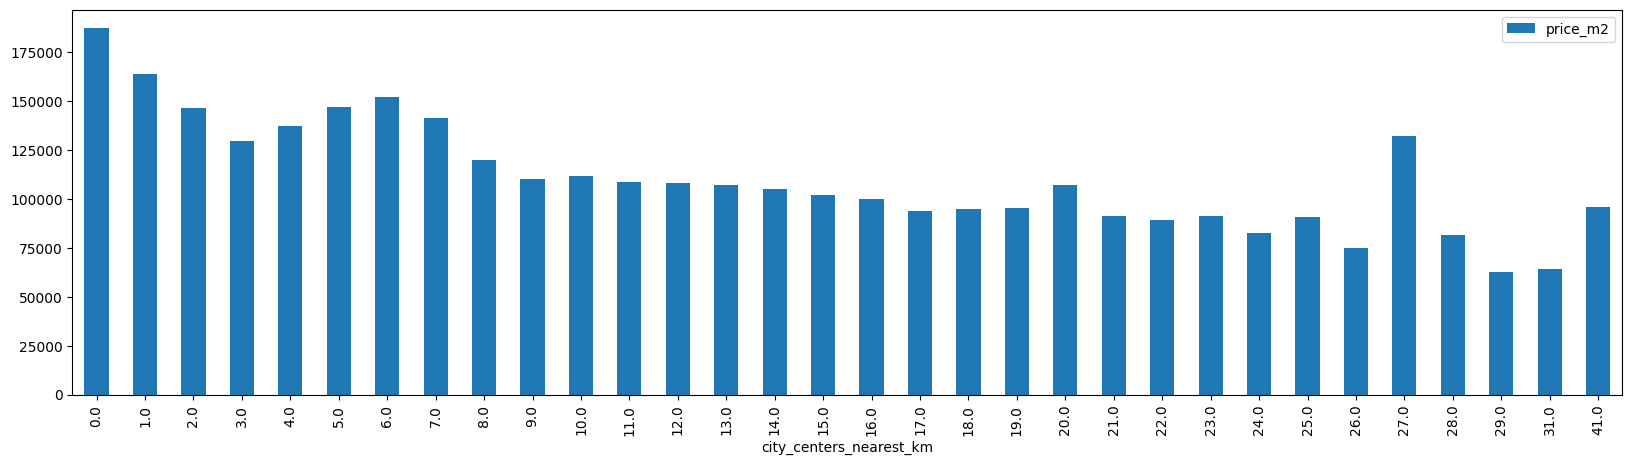

In [317]:
data.query('locality_name_short == "санкт-петербург"').pivot_table(index='city_centers_nearest_km', values='price_m2').plot(kind='bar', figsize=(20,5))

Как и было показано выше в Санкт-Петербурге цена квадратного метра уменьшается с увелничением расстояния от центра города, при этом средняя цена квадратного 

<Axes: xlabel='city_centers_nearest_km'>

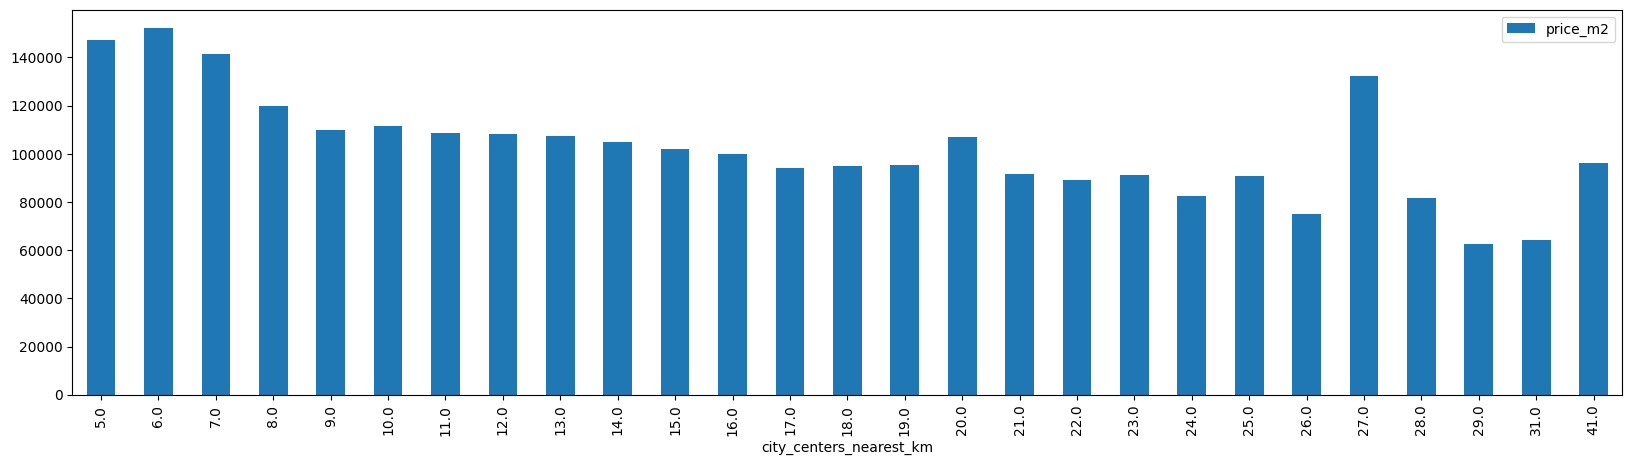

In [318]:
data.query('cat_locality == "СПб"').pivot_table(index='city_centers_nearest_km', values='price_m2').plot(kind='bar', figsize=(20,5))

При этом между радиусами в 5 и 6 километров цены немного растут, прежде чем снова снижатся с каждым километром, это говорит о наличии новой элитной недвижимости в этом поясе

### Общий вывод

В ходе исследования объявлений о продаже квартир в СПб и ЛО были обработаны данные с параметрами объектов недвижимости: устранены пропуски в данных и аномалии возникшие по причине неверного или неполного предоставления данных теми, кто размещал объявления о продаже. Были изучены все параметры объектов, найдены зависимости между параметрами.

Выяснилось что такие параметры как расстояние до центра города, наличие парков рядом с объектами, тип этажа влияет на цену квадратного метра. Найдены средние цены квадратного метра для каждого километра от центра города, а также локации вокруг Петербурга, где больше всего размещается объявлений о продаже и посчитаны цены квадратного метра в них